In [2]:
import sys
import os.path as op
from glob import glob
import shutil
import warnings
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

import statsmodels.api as sm
import nibabel as nib

pd.options.display.max_rows = 100
pd.options.display.max_columns = 999
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse

sys.path.append("/Users/dschonhaut/code/style")
from colors import get_colors
co, palettes = get_colors()

sys.path.append("/Users/dschonhaut/code")
from general.array import array_operations as aop
from general.basic.helper_funcs import *
from general.basic.str_methods import *
import general.nifti.nifti_ops as nops
import general.nifti.nifti_plotting as niiplot

%matplotlib inline
mpl.rcParams['font.sans-serif'] = "Helvetica"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams["grid.linewidth"] = 0.1
mpl.rcParams["grid.alpha"] = 0.75
mpl.rcParams["lines.linewidth"] = 1
mpl.rcParams["lines.markersize"] = 3
mpl.rcParams["xtick.labelsize"] = 15
mpl.rcParams["ytick.labelsize"] = 15
mpl.rcParams["grid.linewidth"] = 0.1
mpl.rcParams["grid.alpha"] = 0.75
mpl.rcParams["lines.linewidth"] = 1
mpl.rcParams["lines.markersize"] = 3
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
mpl.rcParams["xtick.major.width"] = 0.8
mpl.rcParams["ytick.major.width"] = 0.8
colors = [
    "2E45B8",
    "F97A1F",
    "3EBCD2",
    "FF4983",
    "1DC9A4",
    "B38FE7",
    "F9C31F",
    "E3120B",
]
mpl.rcParams["axes.prop_cycle"] = mpl.cycler("color", colors)
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.formatter.offset_threshold"] = 2
mpl.rcParams["axes.labelsize"] = 14
mpl.rcParams["axes.labelpad"] = 8
mpl.rcParams["axes.titlesize"] = 16
mpl.rcParams["axes.grid"] = False
mpl.rcParams["axes.axisbelow"] = True
mpl.rcParams["legend.loc"] = "upper right"
mpl.rcParams["legend.fontsize"] = 14
mpl.rcParams["legend.frameon"] = False
mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["figure.titlesize"] = 16
mpl.rcParams["figure.figsize"] = (10, 4)
mpl.rcParams["figure.subplot.wspace"] = 0.25
mpl.rcParams["figure.subplot.hspace"] = 0.25
mpl.rcParams["savefig.format"] = "pdf"
mpl.rcParams["pdf.fonttype"] = 42
font = {"tick": 6, "label": 7, "title": 8}
colws = {1: 2.05, 2: 3.125, 3: 6.45}

In [3]:
sns.color_palette(co.values)

[(0.8392156862745098, 0.8588235294117647, 0.9607843137254902),
 (0.1803921568627451, 0.27058823529411763, 0.7215686274509804),
 (0.0784313725490196, 0.12156862745098039, 0.3215686274509804),
 (0.43529411764705883, 0.8941176470588236, 0.984313725490196),
 (0.24313725490196078, 0.7372549019607844, 0.8235294117647058),
 (0.0, 0.37254901960784315, 0.45098039215686275),
 (0.8235294117647058, 0.9764705882352941, 0.9411764705882353),
 (0.11372549019607843, 0.788235294117647, 0.6431372549019608),
 (0.054901960784313725, 0.39215686274509803, 0.3215686274509804),
 (0.9882352941176471, 0.8705882352941177, 0.5137254901960784),
 (0.9764705882352941, 0.7647058823529411, 0.12156862745098039),
 (0.8117647058823529, 0.6392156862745098, 0.0),
 (0.9882352941176471, 0.7098039215686275, 0.5137254901960784),
 (0.9764705882352941, 0.47843137254901963, 0.12156862745098039),
 (0.7803921568627451, 0.32941176470588235, 0.0),
 (1.0, 0.6392156862745098, 0.6235294117647059),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.5254901960784314, 0.07450980392156863, 0.12549019607843137),
 (1.0, 0.6431372549019608, 0.7607843137254902),
 (1.0, 0.28627450980392155, 0.5137254901960784),
 (0.6588235294117647, 0.0, 0.3333333333333333),
 (0.9019607843137255, 0.8313725490196079, 0.9803921568627451),
 (0.7019607843137254, 0.5607843137254902, 0.9058823529411765),
 (0.49019607843137253, 0.3333333333333333, 0.7803921568627451),
 (1.0, 1.0, 1.0),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.34901960784313724, 0.34901960784313724, 0.34901960784313724),
 (0.2, 0.2, 0.2),
 (0.10196078431372549, 0.10196078431372549, 0.10196078431372549),
 (0.0, 0.0, 0.0),
 (0.1803921568627451, 0.27058823529411763, 0.7215686274509804),
 (0.24313725490196078, 0.7372549019607844, 0.8235294117647058),
 (0.11372549019607843, 0.788235294117647, 0.6431372549019608),
 (0.9764705882352941, 0.7647058823529411, 0.12156862745098039),
 (0.9764705882352941, 0.47843137254901963, 0.12156862745098039),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (1.0, 0.28627450980392155, 0.5137254901960784),
 (0.7019607843137254, 0.5607843137254902, 0.9058823529411765),
 (0.8392156862745098, 0.8588235294117647, 0.9607843137254902),
 (0.1803921568627451, 0.27058823529411763, 0.7215686274509804),
 (0.0784313725490196, 0.12156862745098039, 0.3215686274509804),
 (0.43529411764705883, 0.8941176470588236, 0.984313725490196),
 (0.24313725490196078, 0.7372549019607844, 0.8235294117647058),
 (0.0, 0.37254901960784315, 0.45098039215686275),
 (0.8235294117647058, 0.9764705882352941, 0.9411764705882353),
 (0.11372549019607843, 0.788235294117647, 0.6431372549019608),
 (0.054901960784313725, 0.39215686274509803, 0.3215686274509804),
 (0.9882352941176471, 0.8705882352941177, 0.5137254901960784),
 (0.9764705882352941, 0.7647058823529411, 0.12156862745098039),
 (0.8117647058823529, 0.6392156862745098, 0.0),
 (0.9882352941176471, 0.7098039215686275, 0.5137254901960784),
 (0.9764705882352941, 0.47843137254901963, 0.12156862745098039),
 (0.7803921568627451, 0.32941176470588235, 0.0),
 (1.0, 0.6392156862745098, 0.6235294117647059),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.5254901960784314, 0.07450980392156863, 0.12549019607843137),
 (1.0, 0.6431372549019608, 0.7607843137254902),
 (1.0, 0.28627450980392155, 0.5137254901960784),
 (0.6588235294117647, 0.0, 0.3333333333333333),
 (0.9019607843137255, 0.8313725490196079, 0.9803921568627451),
 (0.7019607843137254, 0.5607843137254902, 0.9058823529411765),
 (0.49019607843137253, 0.3333333333333333, 0.7803921568627451),
 (1.0, 1.0, 1.0),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.34901960784313724, 0.34901960784313724, 0.34901960784313724),
 (

In [ ]:
from importlib import reload
import colors

reload(colors)
from colors import get_colors

co, palettes = get_colors()
# import general.basic.helper_funcs
# reload(general.basic.helper_funcs)
# from general.basic.helper_funcs import *

# Format ROIs

In [18]:
def fmt_date(year, month, day):
    """Format date from numeric year, month, day and return the date."""
    try:
        outdate = datetime.date(
            year=int(float(year)), month=int(float(month)), day=int(float(day))
        )
        return outdate
    except ValueError:
        return None


def fmt_datetime(string, fmt="%Y-%m-%d %H:%M:%S.%f"):
    """Format a datetime string and return the date."""
    try:
        outdate = datetime.datetime.strptime(string, fmt).date()
        return outdate
    except ValueError:
        return None


def baseline_date(df, date_col, subj):
    """Return the baseline date for a given subject.

    df must have columns 'subj' and 'visit', and the baseline visit must
    be coded as 1.
    """
    assert np.min(df["visit"]) == 1
    return df.loc[(df["subj"] == subj) & (df["visit"] == 1), date_col].iloc[0]


def date_diff(date1, date2, abs=False):
    """Return date2 - date1 in years."""
    try:
        diff = (date2 - date1).days / 365.25
        if abs:
            return np.abs(diff)
        else:
            return diff
    except TypeError:
        return None


def _quartiles(x):
    return quartiles(x, decimals=0)


def map_fsroi(hem, fsroi):
    """Map fsrois label to suvr and vol cols in the ready_dataset df."""
    suvr_suffix = "_MRIBASED_SUVR"
    vol_suffix = "_ClustSize"

    if fsroi.lower() == "amygdala":
        if hem.lower() == "l":
            hemout = "Left"
        elif hem.lower() == "r":
            hemout = "Right"
        else:
            raise ValueError(f"hemisphere must be 'L' or 'R', not {hem}")
        roiout = "Amygdala"
        hemroiout = f"{hemout}_{roiout}"
    else:
        if hem.lower() == "l":
            hemout = "lh"
        elif hem.lower() == "r":
            hemout = "rh"
        else:
            raise ValueError(f"hemisphere must be 'L' or 'R', not {hem}")
        roiout = fsroi
        hemroiout = f"ctx_{hemout}_{roiout}"

    suvr_col = f"{hemroiout}{suvr_suffix}"
    vol_col = f"{hemroiout}{vol_suffix}"
    return suvr_col, vol_col


def weighted_suvr(values, mean_cols, vol_cols):
    """Calculate weighted mean SUVR and sum volume across regions.

    The regions contained in `mean_cols` and `vol_cols` are assumed to
    match each other in order, i.e., the first region in `mean_cols`
    corresponds to the first region in `vol_cols`. These regions are
    aggregated into a single, larger region for which the weighted mean
    SUVR and sum volume is calculated for each row of `values`.

    Parameters
    ----------
    values : pd.DataFrame
        Dataframe whose rows comprise individual PET scans and whose
        columns include regional mean ROIs and corresponding regional
        volumes.
    mean_cols : list of str
        List of columns with mean SUVR values.
    vol_cols : list of str
        List of columns with corresponding volume values.

    Returns
    -------
    means : list of float
        List of weighted mean SUVR values for each row in `values`.
    volumes : list of float
        List of sum of volumes for each row in `values`.
    """
    means, volumes = zip(
        *values.apply(
            lambda x: (
                np.average(x[mean_cols], weights=x[vol_cols]),
                np.sum(x[vol_cols]),
            ),
            axis=1,
        )
    )
    return means, volumes

In [8]:
# Import the data.
proj_dir = op.join(op.expanduser("~"), "box/projects/leads_tau_spread")
proc_date = "2023-09-15"
cl_thresh = 25
antiamy_subjs = [
    "LDS0360378",
    "LDS9410139",
    "LDS9410287",
    "LDS9410376",
    "LDS9410396",
    "LDS9410450",
    "LDS9410459",
]

# ------------------------------------
# Get paths to relevant directories.
ssheet_dir = op.join(proj_dir, "data", "ssheets")
loni_dir = op.join(ssheet_dir, "loni", f"download_{proc_date}")
fig_dir = op.join(proj_dir, "figs")

# Load fsrois.
fsrois = pd.read_csv(op.join(ssheet_dir, "fsrois.csv"))
fsrois["leads_suvr"], fsrois["leads_vol"] = zip(
    *fsrois.apply(lambda x: map_fsroi(x["hem"], x["fsroi"]), axis=1)
)

print(f"fsrois: {fsrois.shape}")

fsrois: (70, 20)


In [13]:
# Load LONI CSVs.
dfs = {}
dfs["demo"] = pd.read_csv(
    glob_sort_mtime(op.join(loni_dir, "LEADS_PTDEMOG*.csv"))[0]
)  # subject_code, site_code, ptgender, ptdob, pteducat, ptethcat, ptraccat, ptwork
dfs["apoe"] = pd.read_csv(
    glob_sort_mtime(op.join(loni_dir, "Biospecimen_Analysis_Results*.csv"))[0]
)  # SUBJECT_CODE, TESTNAME, TESTVALUE
dfs["cdr"] = pd.read_csv(
    glob_sort_mtime(op.join(loni_dir, "Clinical_Dementia_Rating*.csv"))[0]
)  # LEADS_ID, CDRSUM, CDRGLOB
dfs["mmse"] = pd.read_csv(
    glob_sort_mtime(op.join(loni_dir, "LEADS_MMSE*.csv"))[0]
)  # subject_code, mmscore
dfs["ppa"] = pd.read_csv(
    glob_sort_mtime(op.join(loni_dir, "LEADS_PPADX*.csv"))[0]
)  # subject_code, ppa
dfs["pca"] = pd.read_csv(
    glob_sort_mtime(op.join(loni_dir, "LEADS_PCADX*.csv"))[0]
)  # subject_code, pca
dfs["nacc"] = pd.read_csv(
    glob_sort_mtime(op.join(loni_dir, "NACC_UDS*.csv"))[0]
)  # LEADS_ID, Data dictionary: https://files.alz.washington.edu/documentation/uds3-rdd.pdf
dfs["fbb"] = pd.read_csv(
    glob_sort_mtime(op.join(ssheet_dir, "FBB_PETCore_Analysis_*.csv"))[0]
)  # ID, FBBPET_Date, MRIBASED_Composite_Centiloids
dfs["ftp"] = pd.read_csv(
    glob_sort_mtime(op.join(ssheet_dir, "FTP_PETCore_Analysis_*.csv"))[0]
)  # ID, FTPPET_Date, CohortAssgn

# Print the shape of each df.
print(f"fsrois: {fsrois.shape}")
for k, v in dfs.items():
    print(f"{k}: {v.shape}")

# Format the input dataframes before merging the desired columns.

# Format subject demographic data.
demo_map = {
    "subject_code": "subj",
    "site_code": "site",
    "ptgender": "sex",
    "ptdob": "dob",
    "pteducat": "educ",
    "ptethcat": "ethnicity",
    "ptraccat": "race",
    "ptwork": "profession",
}
assert np.all(np.isin(list(demo_map.keys()), dfs["demo"].columns))
dfs["demo"].rename(columns=demo_map, inplace=True)
dfs["demo"]["subj"] = dfs["demo"]["subj"].apply(lambda x: str(x).upper())
assert dfs["demo"].shape[0] == dfs["demo"]["subj"].nunique()
dfs["demo"]["dob"] = dfs["demo"]["dob"].apply(lambda x: fmt_date(*x.split("-")))
dfs["demo"]["sex"] = dfs["demo"]["sex"].apply(lambda x: "m" if x == 1 else "f")
dfs["demo"]["profession"] = dfs["demo"]["profession"].apply(
    lambda x: str(x).lower() if isinstance(x, str) else np.nan
)

dfs["demo"]["visit"] = 1
demo_cols = [
    "subj",
    "visit",
    "site",
    "sex",
    "dob",
    "educ",
    "ethnicity",
    "race",
    "profession",
]
dfs["demo"] = dfs["demo"][demo_cols]

# Format APOE data.
apoe_map = {"SUBJECT_CODE": "subj", "TESTVALUE": "apoe_genotype"}
assert np.all(np.isin(list(apoe_map.keys()), dfs["apoe"].columns))
dfs["apoe"].rename(columns=apoe_map, inplace=True)
dfs["apoe"] = dfs["apoe"].query("TESTNAME=='APOE Genotype'")
dfs["apoe"]["subj"] = dfs["apoe"]["subj"].apply(lambda x: str(x).upper())
assert np.all(
    dfs["apoe"].groupby("subj")["apoe_genotype"].apply(lambda x: len(x.unique())) == 1
)
dfs["apoe"] = dfs["apoe"].drop_duplicates(subset=["subj"])
dfs["apoe"] = dfs["apoe"][list(apoe_map.values())]
dfs["apoe"]["apoe4_alleles"] = dfs["apoe"]["apoe_genotype"].apply(
    lambda x: str(x).count("E4")
)
dfs["apoe"]["apoe2_alleles"] = dfs["apoe"]["apoe_genotype"].apply(
    lambda x: str(x).count("E2")
)
dfs["apoe"]["visit"] = 1
apoe_cols = ["subj", "visit", "apoe_genotype", "apoe4_alleles", "apoe2_alleles"]
dfs["apoe"] = dfs["apoe"][apoe_cols]

# Format CDR data.
cdr_map = {
    "LEADS_ID": "subj",
    "CDRGLOB": "cdr",
    "CDRSUM": "cdr_sb",
}
assert np.all(np.isin(list(cdr_map.keys()), dfs["cdr"].columns))
dfs["cdr"].rename(columns=cdr_map, inplace=True)
dfs["cdr"]["subj"] = dfs["cdr"]["subj"].apply(lambda x: str(x).upper())
dfs["cdr"].insert(
    3,
    "cdr_date",
    dfs["cdr"].apply(
        lambda x: fmt_date(x["C2VISITYR"], x["C2VISITMO"], x["C2VISITDAY"]), axis=1
    ),
)
dfs["cdr"] = (
    dfs["cdr"].dropna(subset=["cdr_date", "cdr", "cdr_sb"]).reset_index(drop=True)
)
dfs["cdr"].insert(
    4,
    "visit",
    dfs["cdr"].sort_values("cdr_date", ascending=True).groupby("subj").cumcount() + 1,
)
dfs["cdr"].insert(
    5, "cdr_visits", dfs["cdr"]["subj"].apply(lambda x: np.sum(dfs["cdr"]["subj"] == x))
)
dfs["cdr"].insert(
    6,
    "cdr_yrs_from_bl",
    dfs["cdr"].apply(
        lambda x: date_diff(
            baseline_date(dfs["cdr"], "cdr_date", x["subj"]), x["cdr_date"]
        ),
        axis=1,
    ),
)
cdr_cols = [
    "subj",
    "visit",
    "cdr_date",
    "cdr_visits",
    "cdr_yrs_from_bl",
    "cdr",
    "cdr_sb",
]
dfs["cdr"] = dfs["cdr"][cdr_cols]

# Format MMSE data.
mmse_map = {"subject_code": "subj", "mmscore": "mmse"}
assert np.all(np.isin(list(mmse_map.keys()), dfs["mmse"].columns))
dfs["mmse"].rename(columns=mmse_map, inplace=True)
dfs["mmse"]["subj"] = dfs["mmse"]["subj"].apply(lambda x: str(x).upper())
dfs["mmse"].insert(3, "mmse_date", dfs["mmse"]["update_stamp"].apply(fmt_datetime))
dfs["mmse"] = dfs["mmse"].dropna(subset=["mmse_date", "mmse"]).reset_index(drop=True)
dfs["mmse"].insert(
    4,
    "visit",
    dfs["mmse"].sort_values("mmse_date", ascending=True).groupby("subj").cumcount() + 1,
)
dfs["mmse"].insert(
    5,
    "mmse_visits",
    dfs["mmse"]["subj"].apply(lambda x: np.sum(dfs["mmse"]["subj"] == x)),
)
dfs["mmse"].insert(
    6,
    "mmse_yrs_from_bl",
    dfs["mmse"].apply(
        lambda x: date_diff(
            baseline_date(dfs["mmse"], "mmse_date", x["subj"]), x["mmse_date"]
        ),
        axis=1,
    ),
)
mmse_cols = ["subj", "visit", "mmse_date", "mmse_visits", "mmse_yrs_from_bl", "mmse"]
dfs["mmse"] = dfs["mmse"][mmse_cols]

# Format PPA data.
ppa_map = {"subject_code": "subj"}
assert np.all(np.isin(list(ppa_map.keys()), dfs["ppa"].columns))
dfs["ppa"].rename(columns=ppa_map, inplace=True)
dfs["ppa"]["subj"] = dfs["ppa"]["subj"].apply(lambda x: str(x).upper())
dfs["ppa"]["ppa_date"] = dfs["ppa"]["update_stamp"].apply(fmt_datetime)
dfs["ppa"] = (
    dfs["ppa"]
    .query("(event_code=='sc')")
    .dropna(subset=["ppa_date", "ppa"])
    .reset_index(drop=True)
)
assert dfs["ppa"].shape[0] == dfs["ppa"]["subj"].nunique()
dfs["ppa"]["visit"] = 1
ppa_cols = ["subj", "visit", "ppa_date", "ppa"]
dfs["ppa"] = dfs["ppa"][ppa_cols]

# Format PCA data.
pca_map = {"subject_code": "subj"}
assert np.all(np.isin(list(pca_map.keys()), dfs["pca"].columns))
dfs["pca"].rename(columns=pca_map, inplace=True)
dfs["pca"]["subj"] = dfs["pca"]["subj"].apply(lambda x: str(x).upper())
dfs["pca"]["pca_date"] = dfs["pca"]["update_stamp"].apply(fmt_datetime)
dfs["pca"] = (
    dfs["pca"]
    .query("(event_code=='sc')")
    .dropna(subset=["pca_date", "pca"])
    .reset_index(drop=True)
)
assert dfs["pca"].shape[0] == dfs["pca"]["subj"].nunique()
dfs["pca"]["visit"] = 1
pca_cols = ["subj", "visit", "pca_date", "pca"]
dfs["pca"] = dfs["pca"][pca_cols]

# Format NACC data.
nacc_map = {
    "LEADS_ID": "subj",
    "DEMENTED": "dementia",
    "DECCLCOG": "cog_sym",
    "DECAGE": "cog_sym_age",
    "DECCLBE": "beh_sym",
    "BEAGE": "beh_sym_age",
    "MOCATOTS": "moca",
    "NACCGDS": "gds",
    "NACCFAM": "fam_hist",
    "TBI": "tbi",
    "SMOKYRS": "years_smoked",
    "HRATE": "heart_rate",
    "NACCBMI": "bmi",
    "BPSYS": "bp_sys",
    "BPDIAS": "bp_dias",
}
assert np.all(np.isin(list(nacc_map.keys()), dfs["nacc"].columns))
dfs["nacc"].rename(columns=nacc_map, inplace=True)
dfs["nacc"]["subj"] = dfs["nacc"]["subj"].apply(lambda x: str(x).upper())
dfs["nacc"].insert(
    3,
    "nacc_date",
    dfs["nacc"].apply(
        lambda x: fmt_date(x["VISITYR"], x["VISITMO"], x["VISITDAY"]), axis=1
    ),
)
dfs["nacc"].insert(
    2,
    "visit",
    dfs["nacc"].sort_values("nacc_date", ascending=True).groupby("subj").cumcount() + 1,
)
dfs["nacc"].insert(
    3,
    "nacc_yrs_from_bl",
    dfs["nacc"].apply(
        lambda x: date_diff(
            baseline_date(dfs["nacc"], "nacc_date", x["subj"]), x["nacc_date"]
        ),
        axis=1,
    ),
)
dfs["nacc"].insert(
    5,
    "nacc_visits",
    dfs["nacc"]["subj"].apply(lambda x: np.sum(dfs["nacc"]["subj"] == x)),
)
dfs["nacc"].loc[dfs["nacc"]["cog_sym"] == -4, "cog_sym"] = None
dfs["nacc"].loc[
    np.isin(dfs["nacc"]["cog_sym_age"], [-4, 888, 999]), "cog_sym_age"
] = None
dfs["nacc"]["cog_pri_sym"] = None
cog_pri_map = {
    1: "memory",
    2: "orientn",
    3: "exec_attn",
    4: "language",
    5: "visuospat",
    6: "exec_attn",
}
for k, v in cog_pri_map.items():
    dfs["nacc"].loc[dfs["nacc"]["NACCCOGF"] == k, "cog_pri_sym"] = v
dfs["nacc"].loc[dfs["nacc"]["beh_sym"] == -4, "beh_sym"] = None
dfs["nacc"].loc[
    np.isin(dfs["nacc"]["beh_sym_age"], [-4, 888, 999]), "beh_sym_age"
] = None
dfs["nacc"]["beh_pri_sym"] = None
beh_pri_map = {
    1: "apathy_wd",
    2: "depression",
    3: "psychosis",
    4: "disinhib",
    5: "irritability",
    6: "agitation",
    7: "personality",
    8: "rem_sleep_bd",
    9: "anxiety",
}
for k, v in beh_pri_map.items():
    dfs["nacc"].loc[dfs["nacc"]["NACCBEHF"] == k, "beh_pri_sym"] = v
dfs["nacc"].loc[np.isin(dfs["nacc"]["moca"], [-4, 88]), "moca"] = None
dfs["nacc"].loc[np.isin(dfs["nacc"]["gds"], [-4, 88]), "gds"] = None
dfs["nacc"].loc[np.isin(dfs["nacc"]["fam_hist"], [-4, 9]), "fam_hist"] = None
dfs["nacc"].loc[np.isin(dfs["nacc"]["tbi"], [-4, 9]), "tbi"] = None
dfs["nacc"]["tbi_year"] = None
idx = dfs["nacc"]["TBIYEAR"][
    np.isin(dfs["nacc"]["TBIYEAR"], np.arange(1900, datetime.datetime.today().year + 1))
].index.tolist()
dfs["nacc"].loc[idx, "tbi_year"] = dfs["nacc"].loc[idx, "TBIYEAR"]
dfs["nacc"].loc[
    np.isin(dfs["nacc"]["years_smoked"], [-4, 88, 99]), "years_smoked"
] = None
dfs["nacc"].loc[np.isin(dfs["nacc"]["heart_rate"], [-4, 888]), "heart_rate"] = None
dfs["nacc"].loc[np.isin(dfs["nacc"]["bmi"], [-4, 888.8]), "bmi"] = None
dfs["nacc"].loc[np.isin(dfs["nacc"]["bp_sys"], [-4, 777, 888]), "bp_sys"] = None
dfs["nacc"].loc[np.isin(dfs["nacc"]["bp_dias"], [-4, 777, 888]), "bp_dias"] = None
dfs["nacc"]["hypertension"] = None
dfs["nacc"].loc[dfs["nacc"]["HYPERTEN"] == 0, "hyperten"] = 0
dfs["nacc"].loc[dfs["nacc"]["HYPERTEN"] == 1, "hyperten"] = 1
dfs["nacc"]["hypercho"] = None
dfs["nacc"].loc[dfs["nacc"]["HYPERCHO"] == 0, "hypercho"] = 0
dfs["nacc"].loc[dfs["nacc"]["HYPERCHO"] == 1, "hypercho"] = 1
dfs["nacc"]["diabetes"] = None
dfs["nacc"].loc[dfs["nacc"]["DIABETES"] == 0, "diabetes"] = 0
dfs["nacc"].loc[dfs["nacc"]["DIABETES"] == 1, "diabetes"] = 1
nacc_cols = [
    "subj",
    "visit",
    "nacc_date",
    "nacc_visits",
    "nacc_yrs_from_bl",
    "dementia",
    "cog_sym",
    "cog_sym_age",
    "cog_pri_sym",
    "beh_sym",
    "beh_sym_age",
    "beh_pri_sym",
    "moca",
    "gds",
    "fam_hist",
    "tbi",
    "tbi_year",
    "years_smoked",
    "heart_rate",
    "bmi",
    "bp_sys",
    "bp_dias",
    "hyperten",
    "hypercho",
    "diabetes",
]
dfs["nacc"] = dfs["nacc"][nacc_cols]

# Format fbb data.
fbb_map = {
    "ID": "subj",
    "ImageID": "fbb_image_id",
    "MRIBASED_Composite_Centiloids": "fbb_cl",
}
assert np.all(np.isin(list(fbb_map.keys()), dfs["fbb"].columns))
dfs["fbb"].rename(columns=fbb_map, inplace=True)
dfs["fbb"]["subj"] = dfs["fbb"]["subj"].apply(lambda x: str(x).upper())
dfs["fbb"].insert(
    2, "fbb_date", dfs["fbb"]["FBBPET_Date"].apply(lambda x: fmt_date(*x.split("-")))
)
assert dfs["fbb"].shape[0] == dfs["fbb"].drop_duplicates(["subj", "fbb_date"]).shape[0]
dfs["fbb"].insert(
    3,
    "visit",
    dfs["fbb"].sort_values("fbb_date", ascending=True).groupby("subj").cumcount() + 1,
)
dfs["fbb"].insert(
    4, "fbb_visits", dfs["fbb"]["subj"].apply(lambda x: np.sum(dfs["fbb"]["subj"] == x))
)
dfs["fbb"].insert(
    5,
    "fbb_yrs_from_bl",
    dfs["fbb"].apply(
        lambda x: date_diff(
            baseline_date(dfs["fbb"], "fbb_date", x["subj"]), x["fbb_date"]
        ),
        axis=1,
    ),
)
dfs["fbb"]["fbb_pos"] = dfs["fbb"]["fbb_cl"].apply(
    lambda x: x > cl_thresh if np.isfinite(x) else None
)
fbb_cols = [
    "subj",
    "visit",
    "fbb_date",
    "fbb_visits",
    "fbb_yrs_from_bl",
    "fbb_image_id",
    "fbb_cl",
    "fbb_pos",
]
dfs["fbb"] = dfs["fbb"][fbb_cols]

# Format tau data.
ftp_map = {
    "ID": "subj",
    "CohortAssgn": "dx",
    "FTPPET_Date": "FTPPET_Date",
    "ImageID": "ftp_image_id",
}
assert np.all(np.isin(list(ftp_map.keys()), dfs["ftp"].columns))
ftp_cols_other = ["subj", "visit"] + [
    x for x in dfs["ftp"].columns if x not in ftp_map.keys()
]
dfs["ftp"].rename(columns=ftp_map, inplace=True)
dfs["ftp"]["subj"] = dfs["ftp"]["subj"].apply(lambda x: str(x).upper())
dfs["ftp"].insert(
    2, "ftp_date", dfs["ftp"]["FTPPET_Date"].apply(lambda x: fmt_date(*x.split("-")))
)
assert dfs["ftp"].shape[0] == dfs["ftp"].drop_duplicates(["subj", "ftp_date"]).shape[0]
dfs["ftp"].insert(
    3,
    "visit",
    dfs["ftp"].sort_values("ftp_date", ascending=True).groupby("subj").cumcount() + 1,
)
dfs["ftp"].insert(
    4, "ftp_visits", dfs["ftp"]["subj"].apply(lambda x: np.sum(dfs["ftp"]["subj"] == x))
)
dfs["ftp"].insert(
    5,
    "ftp_yrs_from_bl",
    dfs["ftp"].apply(
        lambda x: date_diff(
            baseline_date(dfs["ftp"], "ftp_date", x["subj"]), x["ftp_date"]
        ),
        axis=1,
    ),
)
dfs["ftp"]["anti_amy"] = dfs["ftp"]["subj"].apply(
    lambda x: 1 if np.isin(x, antiamy_subjs) else 0
)
ftp_cols = [
    "subj",
    "visit",
    "dx",
    "ftp_date",
    "ftp_visits",
    "ftp_yrs_from_bl",
    "ftp_image_id",
    "anti_amy",
]
dfs["ftp_values"] = dfs["ftp"][ftp_cols_other].copy()
dfs["ftp"] = dfs["ftp"][ftp_cols]

# Print the shape of each df.
print(f"fsrois: {fsrois.shape}")
for k, v in dfs.items():
    print(f"{k}: {v.shape}")

# Merge the tau-PET dataframe with baseline data from the other dataframes.
merge_order = ["demo", "apoe", "fbb", "mmse", "cdr", "ppa", "pca", "nacc"]
tau_all = dfs["ftp"].copy()
for k in merge_order:
    _df = dfs[k].query("(visit==1)").copy().drop(columns=["visit"])
    tau_all = tau_all.merge(_df, on=["subj"], how="left")
tau_all = tau_all.merge(dfs["ftp_values"], on=["subj", "visit"], how="left")

# ------------------------------------
# Derive columns from dataframe convergence.

# Calculate subject age at FTP scan.
tau_all.insert(
    tau_all.columns.tolist().index("dob") + 1,
    "age_at_ftp",
    tau_all.apply(lambda x: date_diff(x["dob"], x["ftp_date"]), axis=1),
)

# Calculate years from cog symptom onset to FTP scan.
tau_all.insert(
    tau_all.columns.tolist().index("cog_sym_age") + 1,
    "yrs_onset_to_ftp",
    tau_all.apply(lambda x: x["age_at_ftp"] - x["cog_sym_age"], axis=1),
)

# Keep only the selected diagnoses.
keep_dx = ["CN", "EOAD"]
tau_all = tau_all.loc[np.isin(tau_all["dx"], keep_dx)].reset_index(drop=True)

# Drop amyloid-positive controls.
tau_all = tau_all.loc[
    ~((tau_all["dx"] == "CN") & (tau_all["fbb_pos"] == 1))
].reset_index(drop=True)

# Drop patients taking anti-amyloid medications.
tau_all = tau_all.loc[tau_all["anti_amy"] == 0].reset_index(drop=True)

print(f"tau_all: {tau_all.shape}")

fsrois: (70, 20)
demo: (664, 15)
apoe: (457, 6)
cdr: (982, 16)
mmse: (632, 55)
ppa: (950, 34)
pca: (950, 56)
nacc: (306, 1016)
fbb: (852, 254)
ftp: (827, 247)
fsrois: (70, 20)
demo: (664, 9)
apoe: (445, 5)
cdr: (943, 7)
mmse: (623, 6)
ppa: (519, 4)
pca: (520, 4)
nacc: (306, 25)
fbb: (852, 8)
ftp: (827, 8)
ftp_values: (827, 245)
tau_all: (681, 305)


In [18]:
# For each tau scan, calculate weighted means for each ROI in selected parcellations.
# Aggregate this information into a stacked dataframe.
keep_demo = [
    "subj",
    "visit",
    "dx",
    "ftp_date",
    "ftp_visits",
    "ftp_yrs_from_bl",
    "site",
    "age_at_ftp",
    "sex",
    "educ",
    "apoe4_alleles",
    "fbb_cl",
    "mmse",
    "cdr_sb",
]
keep_parc = ["roi24", "hemroi48", "braak", "meta_temporal", "lobe6", "hem", "global"]
save_output = False
overwrite = False

# ----------------------------------------------------------------------
tau_all_agg = []
for parc in keep_parc:
    # Get the full ROI name.
    full_col = f"{parc}_full"
    if full_col in fsrois:
        roi_full = (
            fsrois.drop_duplicates(subset=parc)[[parc, full_col]]
            .set_index(parc)[full_col]
            .to_dict()
        )
    else:
        roi_full = {
            roi: roi for roi in fsrois.drop_duplicates(subset=parc)[parc].tolist()
        }

    # Get the ROI order.
    order_col = f"{parc}_order"
    if order_col in fsrois:
        roi_order = (
            fsrois.drop_duplicates(subset=parc)[[parc, order_col]]
            .set_index(parc)[order_col]
            .to_dict()
        )
    else:
        roi_order = {
            roi: pos + 1
            for pos, roi in enumerate(
                fsrois.drop_duplicates(subset=parc)[parc].tolist()
            )
        }

    # Group by col and get unique values of leads_suvr and leads_vol.
    parc_rois = (
        fsrois.groupby(parc)
        .agg(
            {
                "leads_suvr": lambda x: list(x.unique()),
                "leads_vol": lambda x: list(x.unique()),
            }
        )
        .reset_index()
    )

    # Find the sum volume and weighted mean across PET scans for each roi in the parcellation.
    for idx, roi_row in parc_rois.iterrows():
        roi = roi_row[parc]
        suvr_cols = roi_row["leads_suvr"]
        vol_cols = roi_row["leads_vol"]
        _tau_rois_agg = tau_all[keep_demo].copy()
        _tau_rois_agg["parc"] = parc
        _tau_rois_agg["roi"] = roi
        _tau_rois_agg["roi_full"] = roi_full[roi]
        _tau_rois_agg["roi_order"] = roi_order[roi]
        _tau_rois_agg["suvr"], _tau_rois_agg["vol"] = weighted_suvr(
            tau_all, suvr_cols, vol_cols
        )
        tau_all_agg.append(_tau_rois_agg)

# Concatenate the aggregated tau dataframes.
tau_all_agg = pd.concat(tau_all_agg, ignore_index=True)

# Rename columns.
rename_cols = {"fbb_cl": "fbb_cl_bl", "mmse": "mmse_bl", "cdr_sb": "cdr_sb_bl"}
tau_all_agg.rename(columns=rename_cols, inplace=True)

# Save the aggregated tau data.
if save_output:
    today = datetime.date.today().strftime("%Y-%m-%d")
    outfile = op.join(ssheet_dir, f"tau-rois-agg_{today}.csv")
    if overwrite or not op.exists(outfile):
        tau_all_agg.to_csv(outfile, index=False)
        print(f"Saved {outfile}")

print(f"tau_all_agg: {tau_all_agg.shape}")

Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/ssheets/tau-rois-agg_2023-09-17.csv
tau_all_agg: (59928, 20)


In [19]:
# Create the longitudinal EOAD dataframe.
save_output = False
overwrite = False

# ----------------------------------------------------------------------
idx_cols = ["subj", "parc", "roi"]
val_cols = {"age_at_ftp": "age_at_ftp_bl", "suvr": "suvr_bl", "vol": "vol_bl"}
tau_eoad = (
    tau_all_agg.query("(dx=='EOAD')")
    .set_index(idx_cols)
    .merge(
        tau_all_agg.query("(dx=='EOAD') & (visit==1)")
        .set_index(idx_cols)
        .rename(columns=val_cols)[list(val_cols.values())],
        left_index=True,
        right_index=True,
        how="left",
    )
    .reset_index()
)
tau_eoad["chg_suvr"] = tau_eoad["suvr"] - tau_eoad["suvr_bl"]
tau_eoad["chg_vol"] = tau_eoad["vol"] - tau_eoad["vol_bl"]

# Save the dataframe.
if save_output:
    today = datetime.date.today().strftime("%Y-%m-%d")
    outfile = op.join(ssheet_dir, f"tau-rois-agg_eoad-long_{today}.csv")
    if overwrite or not op.exists(outfile):
        tau_eoad.to_csv(outfile, index=False)
        print(f"Saved {outfile}")

print(f"tau_eoad: {tau_eoad.shape}")
display(tau_all_agg.groupby(["dx", "visit"]).agg({"subj": "nunique"}))

Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/ssheets/tau-rois-agg_eoad-long_2023-09-17.csv
tau_eoad: (52536, 25)


subj
dx   visit      
CN   1        84
EOAD 1       354
     2       167
     3        59
     4        17

In [9]:
# Import the formatted ROI dataframes
tau_all_agg = pd.read_csv(op.join(ssheet_dir, "tau-rois-agg_2023-09-17.csv"))
tau_eoad = pd.read_csv(op.join(ssheet_dir, "tau-rois-agg_eoad-long_2023-09-17.csv"))

print(f"tau_all_agg: {tau_all_agg.shape}")
print(f"tau_eoad: {tau_eoad.shape}")

tau_all_agg: (59928, 20)
tau_eoad: (52536, 25)


In [6]:
def _compute_change(df):
    bl_suvr = df.query("(visit==1)")["suvr"].iloc[0]
    # chg_suvr = np.mean(np.diff(df.sort_values("ftp_yrs_from_bl")["suvr"].values))
    chg_suvr = np.mean(
        df.query("(visit>1)")["chg_suvr"].values
        / df.query("(visit>1)")["ftp_yrs_from_bl"].values
    )
    return bl_suvr, chg_suvr

In [34]:
qry = "(parc=='meta_temporal') & (roi=='1') & (ftp_visits>1) & (apoe4_alleles>=0) & (cdr_sb_bl>=0)"
qry = "(parc=='meta_temporal') & (roi=='1') & (ftp_visits>1)"
print(
    "ROI = Meta Temporal",
    "No. subjects  : {}".format(tau_eoad.query(qry)["subj"].nunique()),
    "Baseline SUVR : {:.3f} ± {:.3f}".format(
        np.mean(tau_eoad.query(qry).query("(visit==1)")["suvr_bl"].values),
        np.std(tau_eoad.query(qry).query("(visit==1)")["suvr_bl"].values),
    ),
    "SUVR Δ/year   : {:.3f} ± {:.3f}".format(
        np.mean(
            tau_eoad.query(qry).query("(visit>1)")["chg_suvr"].values
            / tau_eoad.query(qry).query("(visit>1)")["ftp_yrs_from_bl"].values
        ),
        np.std(
            tau_eoad.query(qry).query("(visit>1)")["chg_suvr"].values
            / tau_eoad.query(qry).query("(visit>1)")["ftp_yrs_from_bl"].values
        ),
    ),
    sep="\n",
)

ROI = Meta Temporal
No. subjects  : 167
Baseline SUVR : 2.101 ± 0.469
SUVR Δ/year   : 0.086 ± 0.124


In [33]:
qry = "(parc=='meta_temporal') & (roi=='1') & (ftp_visits>1) & (apoe4_alleles>=0) & (cdr_sb_bl>=0)"
qry = "(parc=='meta_temporal') & (roi=='1') & (ftp_visits>1)"
# for grp, df in tau_eoad.query(qry).groupby(["subj", "parc", "roi"]):
#     break
df = (
    tau_eoad.query(qry)
    .groupby(["subj", "parc", "roi"])
    .apply(_compute_change)
    .reset_index()
)
df["bl_suvr"] = df[0].apply(lambda x: x[0])
df["chg_suvr"] = df[0].apply(lambda x: x[1])
df.drop(columns=0, inplace=True)
df = df.sort_values(["parc", "roi", "bl_suvr"])
df

,subj,parc,roi,bl_suvr,chg_suvr
123,LDS0990430,meta_temporal,1,1.077802,0.051679
130,LDS1770181,meta_temporal,1,1.089955,0.026613
165,LDS9410149,meta_temporal,1,1.141804,0.035091
101,LDS0730044,meta_temporal,1,1.150932,-0.036528
103,LDS0730103,meta_temporal,1,1.210057,0.013279
...,...,...,...,...,...
98,LDS0370497,meta_temporal,1,2.868273,0.015768
16,LDS0100464,meta_temporal,1,3.049936,-0.192738
77,LDS0370221,meta_temporal,1,3.053513,0.039322
144,LDS1770413,meta_temporal,1,3.472473,-0.361361


Text(0.5, 1.0, 'Meta Temporal ROI')

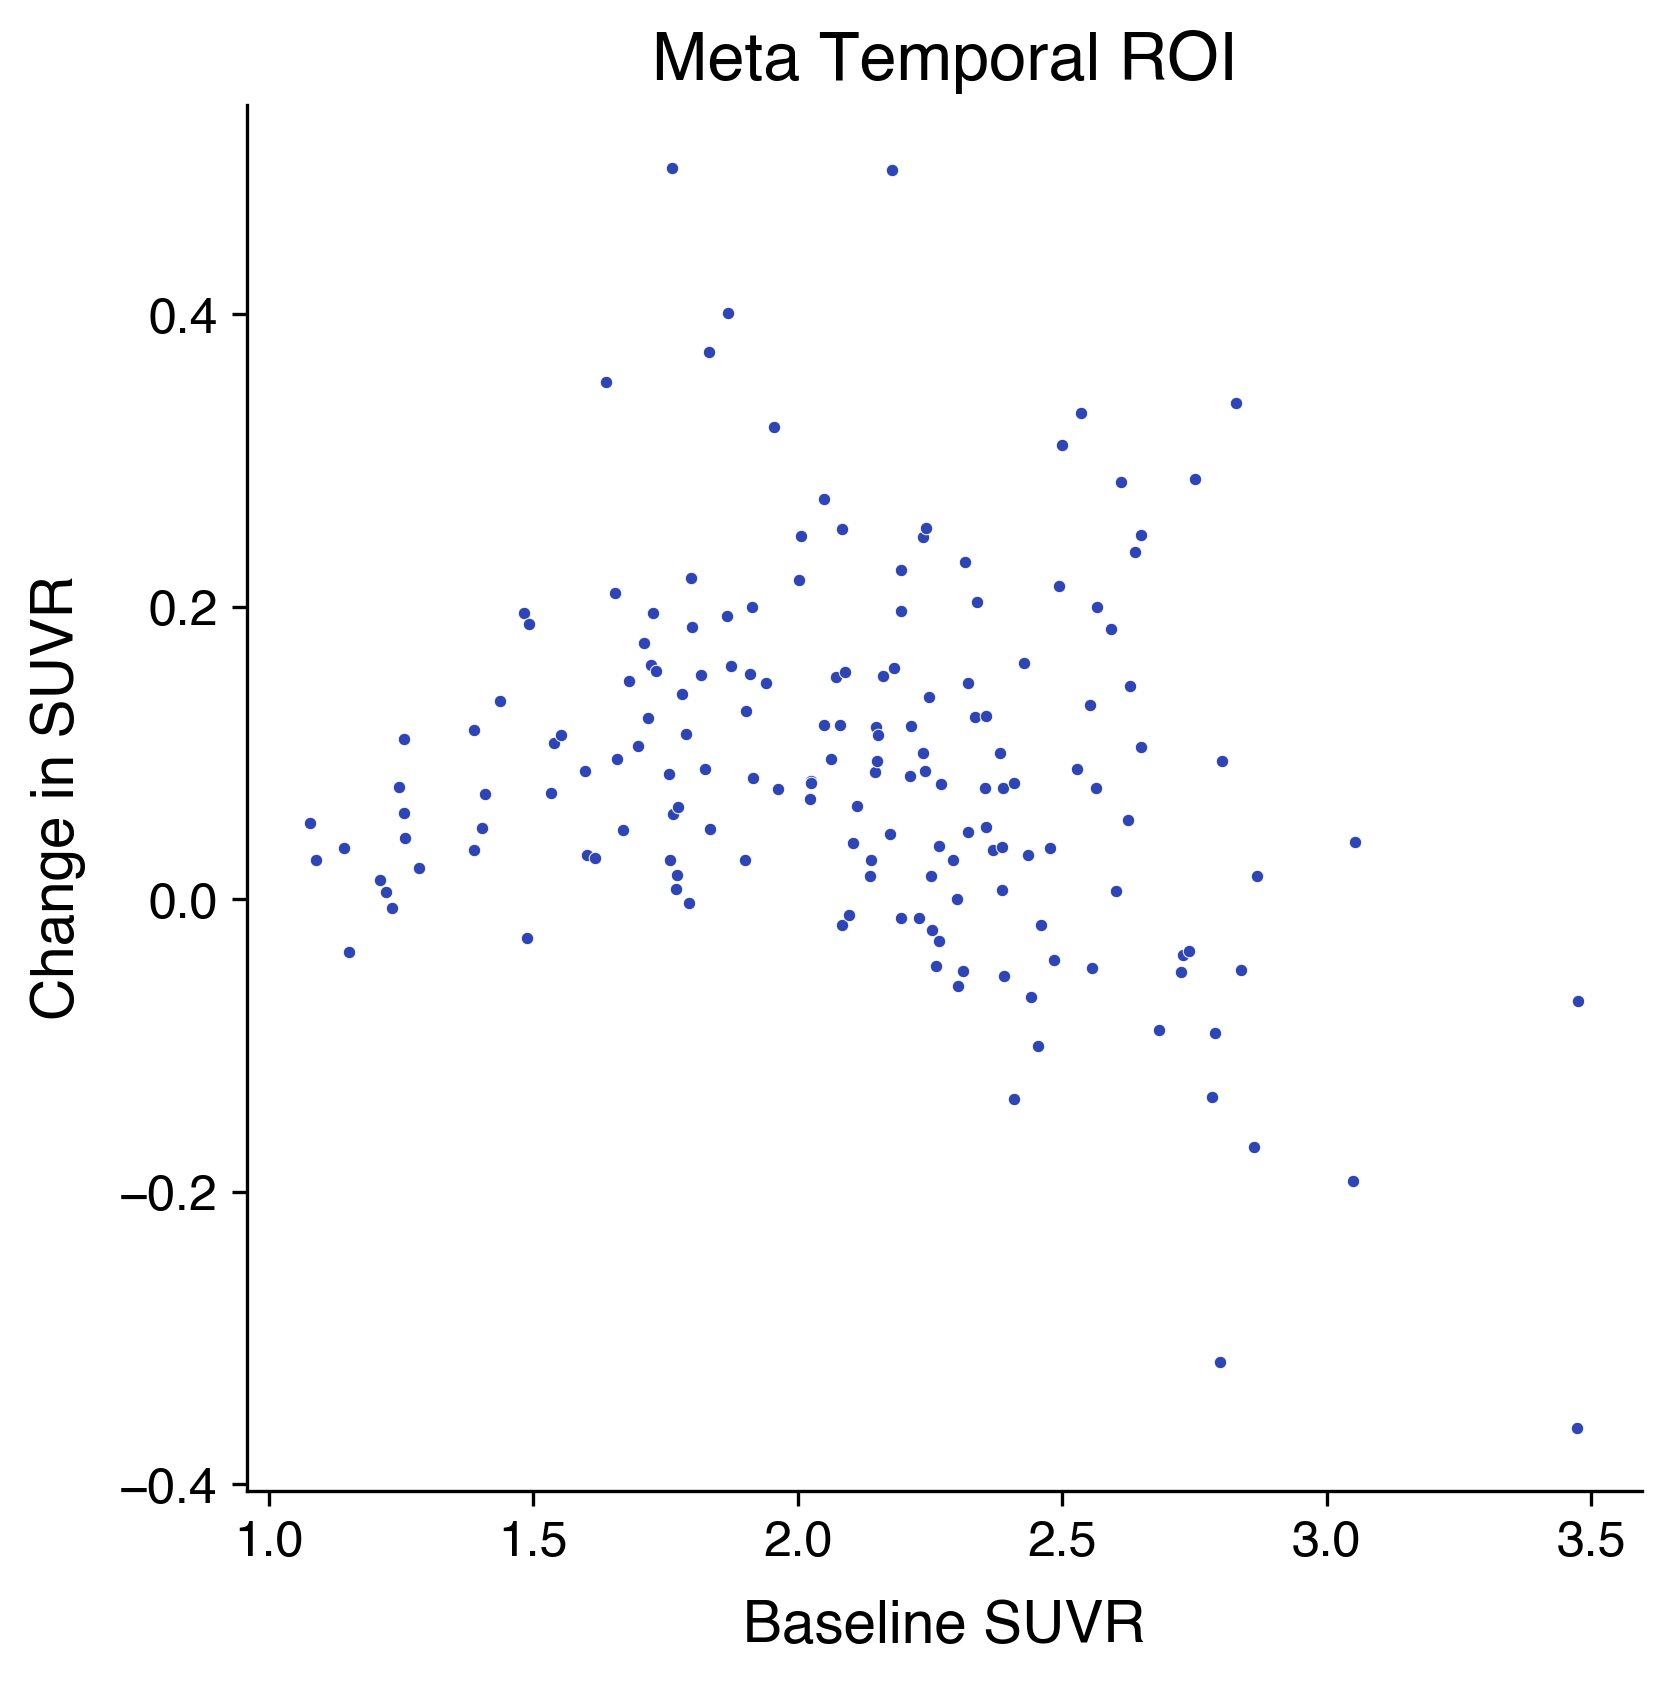

In [35]:
# Create a scatterplot of df["bl_suvr"] against df["chg_suvr"]
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=df, x="bl_suvr", y="chg_suvr", ax=ax)
ax.set_xlabel("Baseline SUVR")
ax.set_ylabel("Change in SUVR")
ax.set_title("Meta Temporal ROI")

In [ ]:
# Import the tau EOAD longitudinal dataframe with fits for
# random subject-roi intercepts and slopes.
tau_eoad_infile = op.join(ssheet_dir, "tau-rois-agg_eoad-long_2023-05-12.csv")
re_infile = op.join(
    ssheet_dir, "tau-rois-agg_eoad-subj-random-slopes-icpts_gt1visit_2023-09-18.csv"
)
parc = "roi24"
save_output = True
overwrite = False

# ----------------------------------------------------------------------
tau_eoad = pd.read_csv(tau_eoad_infile)
ranefs = pd.read_csv(re_infile)
ranefs.columns = ["subjroi", "parc", "suvr_bl_re", "chg_yr_re"]
ranefs["subj"], ranefs["roi"] = zip(*ranefs["subjroi"].apply(lambda x: x.split("_")))
idx_on = ["subj", "parc", "roi"]
tau_eoad_re = (
    tau_eoad.query("(ftp_visits>1)")
    .merge(ranefs.set_index(idx_on), left_on=idx_on, right_index=True, how="left")
    .reset_index(drop=True)
    .copy()
)
tau_eoad_re["re_pred"] = tau_eoad_re["suvr_bl_re"] + (
    tau_eoad_re["chg_yr_re"] * tau_eoad_re["ftp_yrs_from_bl"]
)
ordered_cols = [
    "subjroi",
    "subj",
    "parc",
    "roi",
    "roi_full",
    "roi_order",
    "visit",
    "dx",
    "ftp_date",
    "ftp_visits",
    "ftp_yrs_from_bl",
    "site",
    "age_at_ftp",
    "age_at_ftp_bl",
    "sex",
    "educ",
    "apoe4_alleles",
    "fbb_cl_bl",
    "mmse_bl",
    "cdr_sb_bl",
    "suvr",
    "suvr_bl",
    "chg_suvr",
    "suvr_bl_re",
    "chg_yr_re",
    "re_pred",
    "vol",
    "vol_bl",
    "chg_vol",
]
tau_eoad_re = tau_eoad_re[ordered_cols]


# Save the dataframe.
if save_output:
    today = datetime.date.today().strftime("%Y-%m-%d")
    outfile = op.join(ssheet_dir, f"tau-eoad-re_{today}.csv")
    if overwrite or not op.exists(outfile):
        drop_cols = ["subjroi", "suvr", "suvr_bl", "chg_suvr", "re_pred"]
        df = (
            tau_eoad_re.query(f"(visit==1) & (parc=='{parc}')")
            .drop(columns=drop_cols)
            .reset_index(drop=True)
            .copy()
        )
        df.to_csv(outfile, index=False)
        print(f"Saved {outfile} (shape: {df.shape})")

print(f"tau_eoad_re: {tau_eoad_re.shape}")

## Check dataframes

In [17]:
tau_eoad_re.groupby(["parc", "visit"]).count()

In [15]:
dfs["cdr"]["cdr_visits"].value_counts().sort_index()

cdr_visits
1    113
2    304
3    321
4    128
5     65
6     12
Name: count, dtype: int64

In [14]:
tau_all.query("(dx=='EOAD') & (visit==1) & (ftp_visits>1)")["cdr_sb"].value_counts(
    dropna=False
).sort_index().head()

cdr_sb
0.0     1
0.5     3
1.0     2
1.5    12
2.0    14
Name: count, dtype: int64

In [521]:
tau_all["apoe4_alleles"].value_counts(dropna=False)

apoe4_alleles
0.0    258
1.0    205
NaN     70
2.0     68
Name: count, dtype: int64

In [535]:
aaic_subjs = (
    tau_all.query(
        "(dx=='EOAD') & (visit==1) & (ftp_visits>1) & (apoe4_alleles>=0) & (cdr_sb>=0)"
    )["subj"]
    .unique()
    .tolist()
)
print(f"aaic_subjs: {len(aaic_subjs)}")

tau_all.query("(subj=={}) & (visit>1)".format(aaic_subjs)).groupby("subj")[
    "ftp_visits"
].apply(np.mean).mean()

aaic_subjs: 136


2.4558823529411766

In [549]:
tau_all.query("(subj=={}) & (visit==2)".format(aaic_subjs))["ftp_yrs_from_bl"].mean()
# tau_all.query("(subj=={}) & (visit==1)".format(aaic_subjs))["ftp_visits"].mean()

1.2979425856584934

In [ ]:
for idx, val in fsrois.groupby("lobe6")["roi24"].apply(np.unique).items():
    print('select_rois <- c("{}")'.format('", "'.join(list(val))))

In [ ]:
_dat = (
    dfs["fbb"]
    .query(f"(subj=={practice_subjs})")[["subj", "visit", "fbb_date", "fbb_visits"]]
    .iloc[[0, 1, 2, 3, 4, 6]]
    .merge(
        tau_all.sort_values("ftp_date")[
            ["subj", "visit", "ftp_date", "dx", "ftp_visits"]
        ].iloc[[0, 100, 250, 400, 500, 600]],
        left_on=["subj"],
        right_on=["subj"],
        how="outer",
    )[["subj", "dx", "fbb_date", "ftp_date", "ftp_visits", "fbb_visits"]]
    .reset_index(drop=True)
)
_dat["assigned_to"] = "piyush"
_dat.loc[3:, "assigned_to"] = "daniel"

# Display _dat in text format with equal spaces between columns.
# Add vertical lines between columns.
_dat

In [ ]:
tau_all.query(f"(subj=='LDS0990444')")

In [ ]:
practice_subjs = (
    tau_all.sort_values("ftp_date")[["subj", "visit", "ftp_date", "dx", "ftp_visits"]]
    .iloc[[0, 100, 250, 400, 500, 600]]["subj"]
    .unique()
    .tolist()
)
tau_all.sort_values("ftp_date")[["subj", "visit", "ftp_date", "dx", "ftp_visits"]].iloc[
    [0, 100, 250, 400, 500, 600]
]

In [ ]:
# Find scans near the desired CL values.
cl_idx = [-10, 0, 15, 24, 26, 50, 100]

# --------------------------------
dfs["fbb"] = dfs["fbb"].merge(
    dfs["demo"][["subj", "site"]], left_on=["subj"], right_on=["subj"], how="left"
)
dfs["fbb"] = dfs["fbb"].merge(
    dfs["ftp"][["subj", "dx"]], left_on=["subj"], right_on=["subj"], how="left"
)
cl_values = np.sort(dfs["fbb"].query("(site==22)")["fbb_cl"].values)
scan_idx = []
for cl in cl_idx:
    scan_idx.append(np.where(cl_values > cl)[0][0])
fbb_examples = (
    dfs["fbb"].query("(site==22)").sort_values("fbb_cl").iloc[scan_idx].copy()
)

scan_idx = [246, 249, 310, 307, 244, 300, 245, 272, 290]
fbb_examples = dfs["fbb"].query("(site==22)").sort_values("fbb_cl").loc[scan_idx].copy()

print(f"fbb_examples: {fbb_examples.shape}")

## Plot tau baseline intercepts and longitudinal slopes

In [507]:
# Load the EMM dataframes.
emm = {
    "bl": pd.read_csv(op.join(ssheet_dir, "emm_bl_roi_2023-06-24.csv"), index_col=None),
    "long": pd.read_csv(
        op.join(ssheet_dir, "emm_long_roi_2023-06-24.csv"), index_col=None
    ),
}
dat = {
    "bl": pd.read_csv(op.join(ssheet_dir, "dat_bl_roi_2023-06-24.csv"), index_col=None),
    "long": pd.read_csv(
        op.join(ssheet_dir, "dat_long_roi_2023-06-24.csv"), index_col=None
    ),
}
emt = {
    "age": pd.read_csv(op.join(ssheet_dir, "emt_age_2023-06-25.csv"), index_col=None),
    "apoe": pd.read_csv(op.join(ssheet_dir, "emt_apoe_2023-06-25.csv"), index_col=None),
}

alpha = 0.05
for k, v in emm.items():
    emm[k]["sig_fdr"] = emm[k]["p_fdr"] < alpha
    print(f"{k}: {v.shape}")
for k, v in emt.items():
    emt[k]["sig_fdr"] = emt[k]["p_fdr"] < alpha
    print(f"{k}: {v.shape}")

bl: (24, 7)
long: (24, 7)
age: (24, 7)
apoe: (24, 7)


In [502]:
def outlier_thresh(arr):
    arr = np.asanyarray(arr)
    assert arr.ndim == 1
    thresh_low = np.max([arr.min(), np.percentile(arr, 25) - (1.5 * stats.iqr(arr))])
    thresh_high = np.min([arr.max(), np.percentile(arr, 75) + (1.5 * stats.iqr(arr))])
    return np.array([thresh_low, thresh_high])

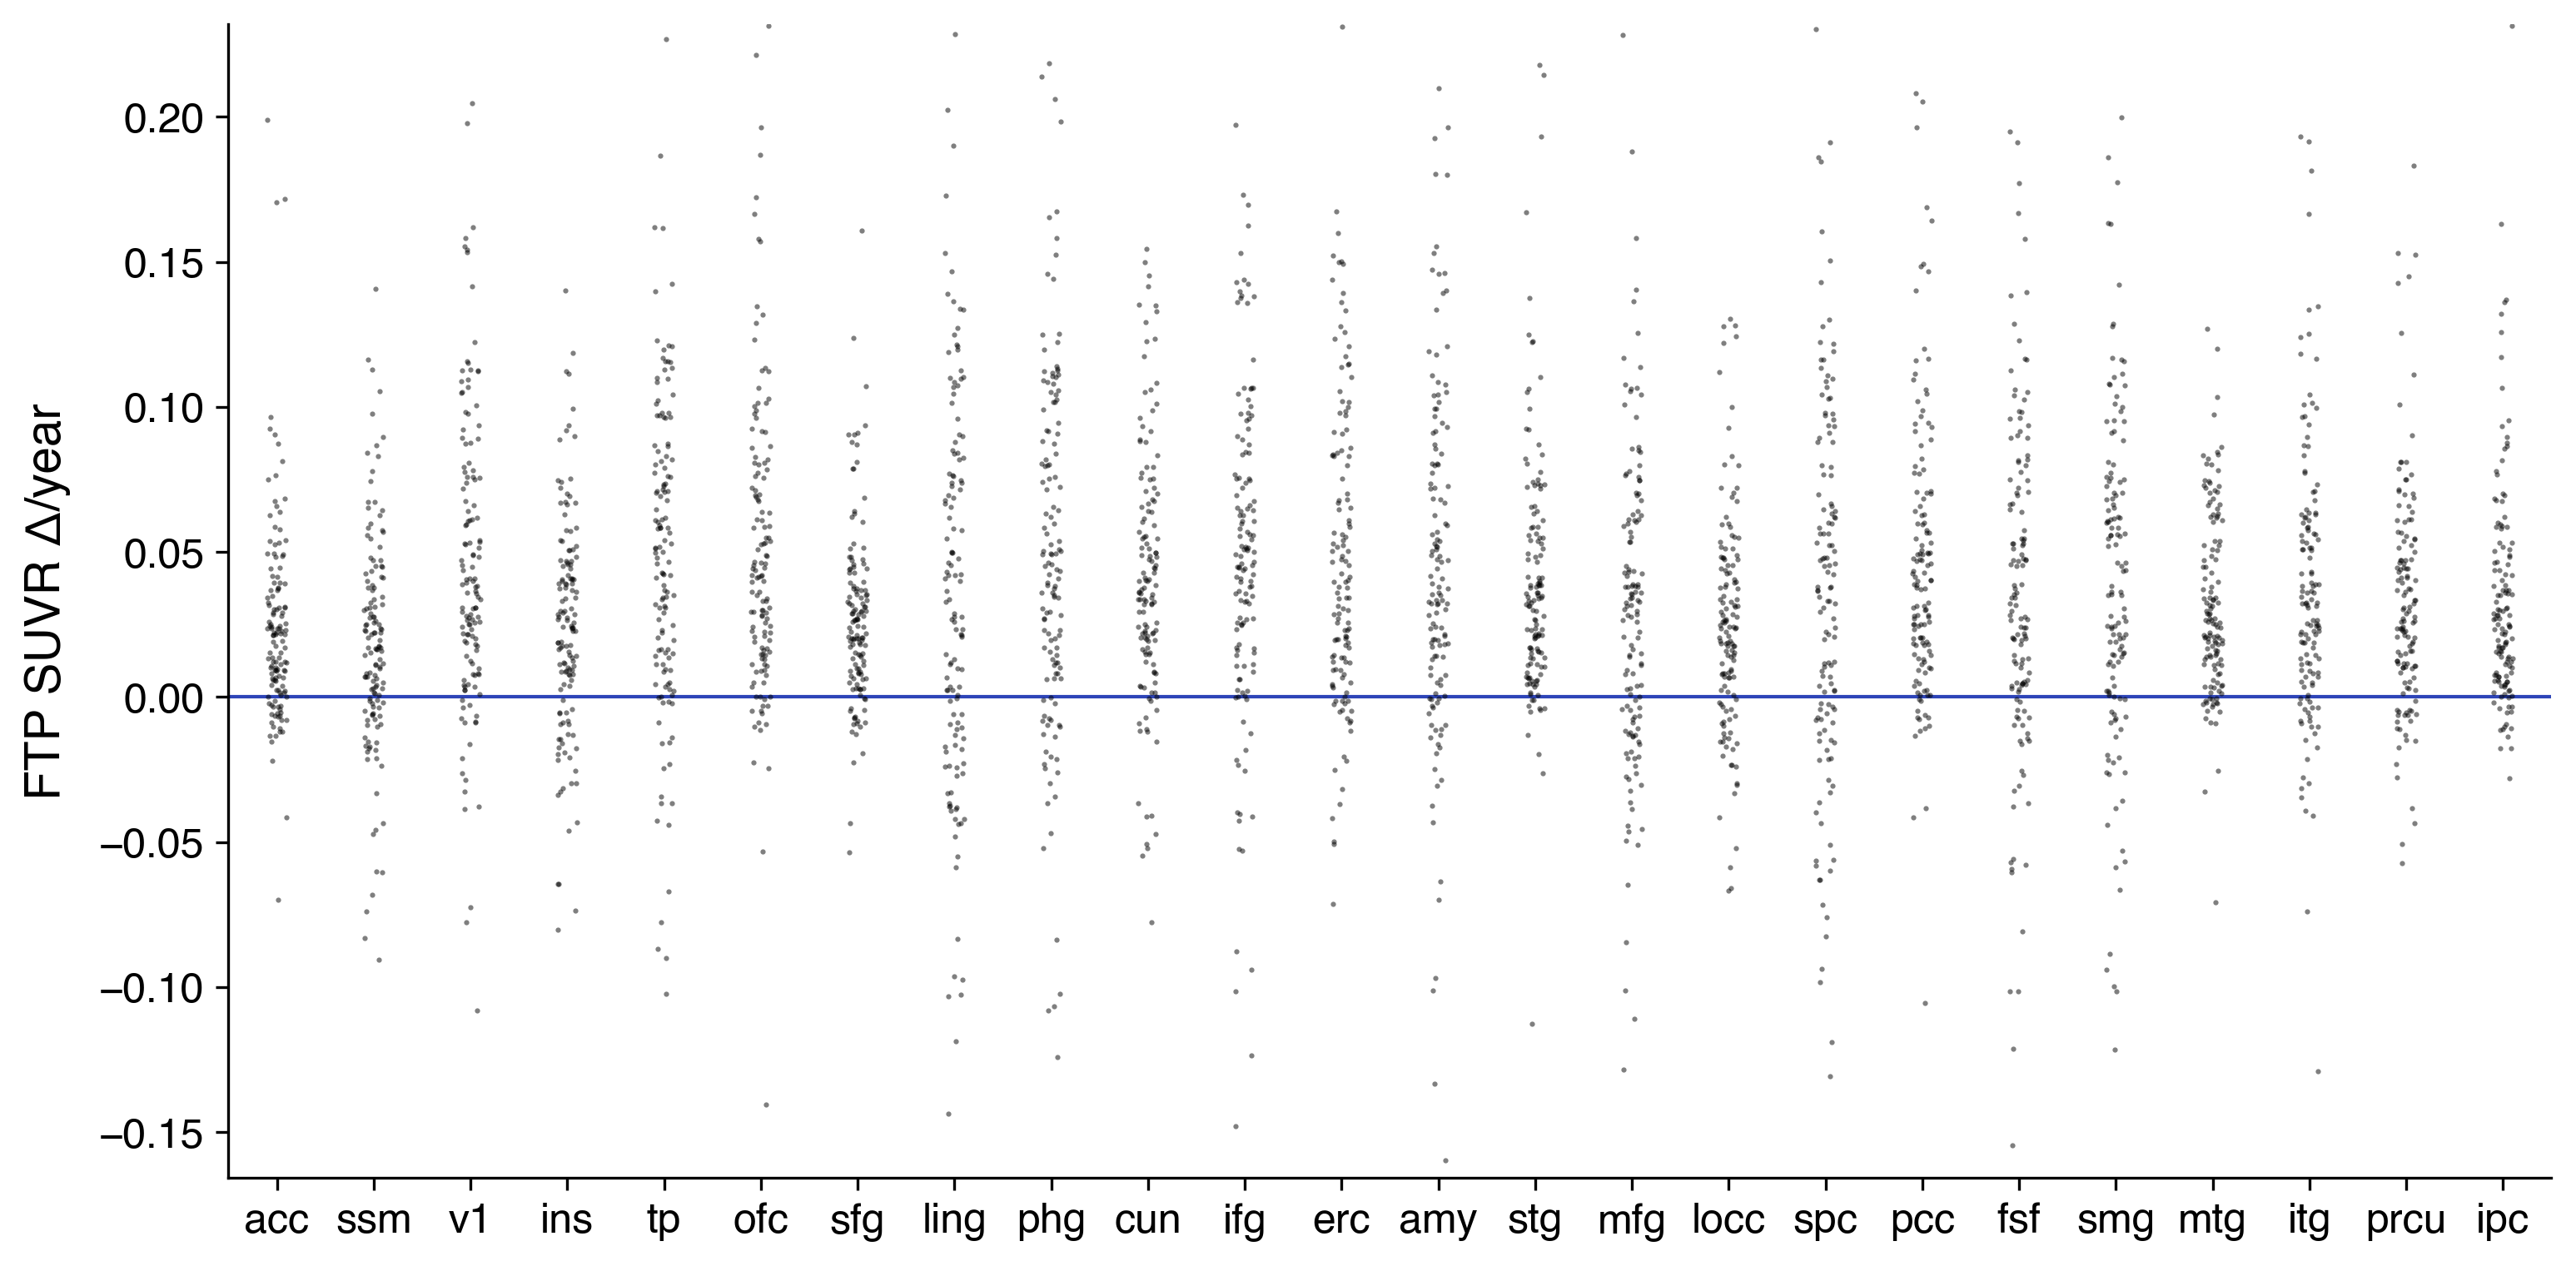

In [503]:
parc = "roi24"
qry = "(parc=='{}') & (dx=='EOAD') & (visit==1) & (subj=={})".format(parc, keep_subjs)
dat = tau_eoad_re.query(qry).copy()
ycol = "chg_yr_re"

# --------------------------------
vals = np.array(dat.groupby("roi")[ycol].apply(outlier_thresh).values.tolist())
ymin = vals[:, 0].min()
ymax = vals[:, 1].max()
rois_in_order = dat.groupby("roi")[xcol].apply(np.median).sort_values().index.tolist()

# Create boxplots with scatter points overlaid in seaborn.
fig, ax = plt.subplots(figsize=(12, 6))
ax.axhline(y=0, lw=1, zorder=0)
sns.boxplot(
    x="roi",
    y=xcol,
    data=dat,
    ax=ax,
    order=rois_in_order,
    showfliers=False,
    palette="viridis",
)
sns.stripplot(
    x="roi", y="chg_yr_re", data=dat, ax=ax, color=co["black"], alpha=0.5, size=1.5
)
ax.set_xlabel("")
ax.set_ylabel("FTP SUVR Δ/year")
ax.set_ylim([ymin, ymax])
plt.show()

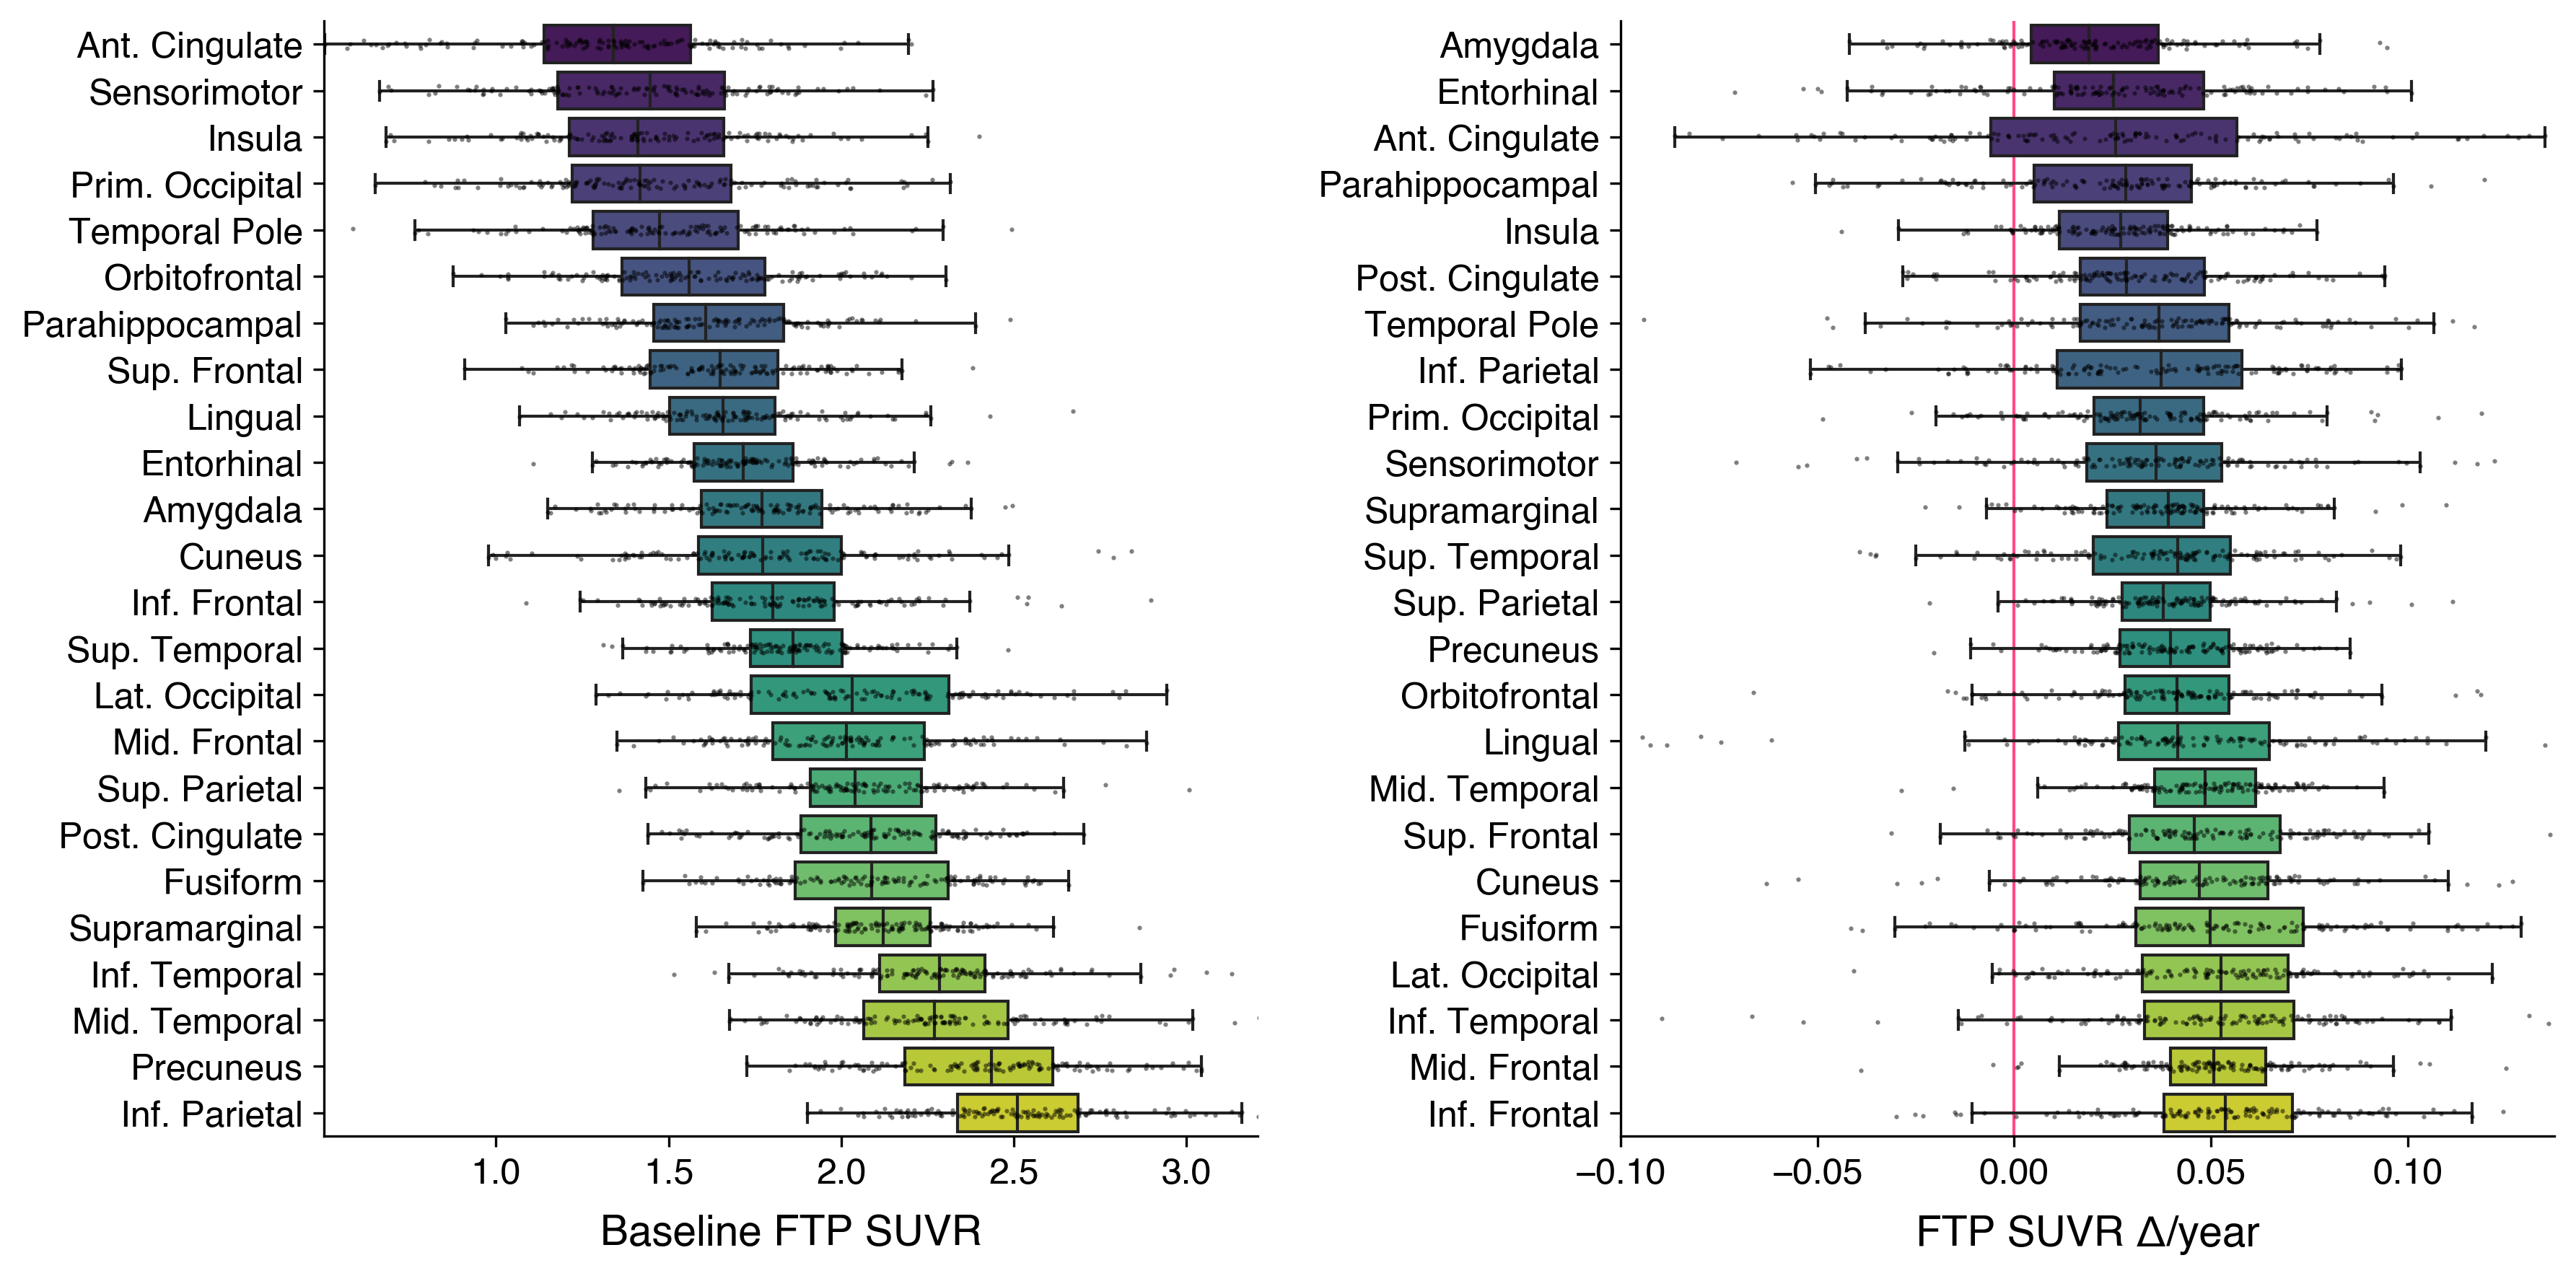

In [510]:
parc = "roi24"
qry = "(parc=='{}') & (dx=='EOAD') & (visit==1) & (subj=={})".format(parc, keep_subjs)
# dat = tau_eoad_re.query(qry).copy()

# --------------------------------
roi_map = (
    fsrois[["roi24", "roi24_full"]]
    .drop_duplicates()
    .set_index("roi24")["roi24_full"]
    .to_dict()
)

# Create boxplots with scatter points overlaid in seaborn.
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax = np.ravel(ax)

iax = 0
_ax = ax[iax]
_dat = dat["bl"]
xcol = "partial"
vals = np.array(_dat.groupby("roi")[xcol].apply(outlier_thresh).values.tolist())
xmin = vals[:, 0].min()
xmax = vals[:, 1].max()
rois_in_order = emm["bl"].sort_values("suvr_bl_re")["roi"].values.tolist()
_ax.axvline(x=0, lw=1, zorder=0, color=co["p2"])
sns.boxplot(
    x=xcol,
    y="roi",
    data=_dat,
    ax=_ax,
    hue="fixest",
    orient="h",
    order=rois_in_order,
    showfliers=False,
    notch=False,
    palette="viridis",
    dodge=False,
)
sns.stripplot(
    x=xcol,
    y="roi",
    data=_dat,
    ax=_ax,
    order=rois_in_order,
    color=co["black"],
    alpha=0.5,
    size=1.5,
)
_ax.set_xlim([xmin, xmax])
_ax.set_xlabel("Baseline FTP SUVR")
_ax.set_yticklabels([roi_map[roi] for roi in rois_in_order])
_ax.set_ylabel("")

iax = 1
_ax = ax[iax]
_dat = dat["long"]
xcol = "partial"
vals = np.array(_dat.groupby("roi")[xcol].apply(outlier_thresh).values.tolist())
xmin = vals[:, 0].min()
xmax = vals[:, 1].max()
rois_in_order = emm["long"].sort_values("chg_yr_re")["roi"].values.tolist()
_ax.axvline(x=0, lw=1, zorder=0, color=co["p2"])
sns.boxplot(
    x=xcol,
    y="roi",
    data=_dat,
    ax=_ax,
    hue="fixest",
    orient="h",
    order=rois_in_order,
    showfliers=False,
    notch=False,
    palette="viridis",
    dodge=False,
)
sns.stripplot(
    x=xcol,
    y="roi",
    data=_dat,
    ax=_ax,
    order=rois_in_order,
    color=co["black"],
    alpha=0.5,
    size=1.5,
)
_ax.set_xlim([xmin, xmax])
_ax.set_xlabel("FTP SUVR Δ/year")
_ax.set_yticklabels([roi_map[roi] for roi in rois_in_order])
_ax.set_ylabel("")

for _ax in ax:
    _ax.legend([], [], frameon=False)

fig.tight_layout(w_pad=2)

In [36]:
def color_hex(val, vmin, vmax, cmap="viridis", n_colors=256):
    """Find the color index of a value within a range of values."""
    palette = sns.color_palette(cmap, n_colors=n_colors).as_hex()
    if val < vmin:
        idx = 0
    elif val > vmax:
        idx = n_colors - 1
    else:
        idx = np.rint(((val - vmin) / (vmax - vmin)) * (n_colors - 1)).astype(int)
    return palette[idx]


def bootstrap_pct(arr, q=95, n_resamples=9999):
    """Bootstrap the qth percentile of a numeric vector."""
    arr = np.asanyarray(arr)
    assert arr.ndim == 1
    arr = arr[~np.isnan(arr)]
    boot_dist = np.zeros(n_resamples)
    for i in range(n_resamples):
        boot_dist[i] = np.percentile(
            np.random.choice(arr, size=arr.size, replace=True), q
        )
    est = np.mean(boot_dist)
    return est

In [ ]:
qry = "(parc=='roi24') & (dx=='CN') & (visit==1)"
tau_all_agg.query(qry).shape

# Using bootstrap resampling to find the 95th percentile of the distribution of
# FTP SUVR values for each ROI.
# --------------------------------
tau_all_agg.query(qry).groupby("roi")["suvr"].apply(bootstrap_pct).sort_values()

In [496]:
# emm["long"].set_index("roi").sort_values("chg_yr_re")
# emt["age"].set_index("roi").sort_values("chg_yr_re", ascending=False)
emt["apoe"].set_index("roi").sort_values("chg_yr_re")

,chg_yr_re,lower,upper,t,p_fdr,sig_fdr
roi,,,,,,
v1,-0.000086,-0.019078,0.018906,-0.013986,0.988842,False
amy,0.001045,-0.017987,0.020077,0.169133,0.903343,False
erc,0.006408,-0.012575,0.025391,1.039936,0.325586,False
tp,0.006473,-0.012492,0.025439,1.051531,0.325586,False
acc,0.007305,-0.011682,0.026291,1.185233,0.283223,False
ins,0.008397,-0.010683,0.027478,1.355870,0.221359,False
cun,0.008422,-0.010632,0.027477,1.361712,0.221359,False
ling,0.008473,-0.010559,0.027506,1.371625,0.221359,False
ssm,0.009167,-0.009980,0.028314,1.475015,0.210471,False


In [494]:
cmap = "viridis"
vmin = emm["long"]["chg_yr_re"].min()
vmax = emm["long"]["chg_yr_re"].max()
print("SUVR Δ/year ~ Region")
print(f"cmap = {cmap}")
print(f"vmin = {vmin:.4f}, vmax = {vmax:.4f}")
print(
    emm["long"]
    .set_index("roi")
    .sort_values("chg_yr_re")["chg_yr_re"]
    .apply(lambda x: color_hex(x, vmin, vmax, cmap=cmap)),
    end="\n\n",
)

SUVR Δ/year ~ Region
cmap = viridis
vmin = 0.0188, vmax = 0.0527
roi
amy     #440154
erc     #443a83
acc     #433e85
phg     #423f85
ins     #3a538b
pcc     #2d708e
tp      #27808e
ipc     #26828e
v1      #25848e
ssm     #25848e
smg     #1f9f88
stg     #1f9f88
spc     #29af7f
prcu    #29af7f
ofc     #2fb47c
ling    #5cc863
mtg     #a8db34
sfg     #addc30
cun     #b2dd2d
fsf     #cde11d
locc    #d2e21b
itg     #d8e219
mfg     #ece51b
ifg     #fde725
Name: chg_yr_re, dtype: object



In [466]:
# Baseline SUVR ~ Region
cmap = "viridis"
vmin = emm["bl"]["suvr_bl_re"].min()
vmax = emm["bl"]["suvr_bl_re"].max()
print("Baseline SUVR ~ Region")
print(f"cmap = {cmap}")
print(f"vmin = {vmin:.4f}, vmax = {vmax:.4f}")
print(
    emm["bl"]
    .set_index("roi")
    .sort_values("suvr_bl_re")["suvr_bl_re"]
    .apply(lambda x: color_hex(x, vmin, vmax, cmap=cmap)),
    end="\n\n",
)

# SUVR Δ/year ~ Region
cmap = "viridis"
vmin = emm["long"]["chg_yr_re"].min()
vmax = emm["long"]["chg_yr_re"].max()
print("SUVR Δ/year ~ Region")
print(f"cmap = {cmap}")
print(f"vmin = {vmin:.4f}, vmax = {vmax:.4f}")
print(
    emm["long"]
    .set_index("roi")
    .sort_values("chg_yr_re")["chg_yr_re"]
    .apply(lambda x: color_hex(x, vmin, vmax, cmap=cmap)),
    end="\n\n",
)

# SUVR Δ/year ~ Age x Region
cmap = "plasma_r"
vmin = emt["age"].query("(sig_fdr==True)")["chg_yr_re"].min()
vmax = emt["age"].query("(sig_fdr==True)")["chg_yr_re"].max()
print("SUVR Δ/year ~ Age x Region")
print(f"cmap = {cmap}")
print(f"vmin = {vmin:.4f}, vmax = {vmax:.4f}")
print(
    emt["age"]
    .set_index("roi")
    .sort_values("chg_yr_re", ascending=False)["chg_yr_re"]
    .apply(lambda x: color_hex(x, vmin, vmax, cmap=cmap)),
    end="\n\n",
)

# SUVR Δ/year ~ APOE4 x Region
cmap = "plasma"
vmin = emt["apoe"].query("(sig_fdr==True)")["chg_yr_re"].min()
vmax = emt["apoe"].query("(sig_fdr==True)")["chg_yr_re"].max()
print("SUVR Δ/year ~ APOE4 x Region")
print(f"cmap = {cmap}")
print(f"vmin = {vmin:.4f}, vmax = {vmax:.4f}")
print(
    emt["apoe"]
    .set_index("roi")
    .sort_values("chg_yr_re")["chg_yr_re"]
    .apply(lambda x: color_hex(x, vmin, vmax, cmap=cmap)),
    end="\n\n",
)

Baseline SUVR ~ Region
cmap = viridis
vmin = 1.3047, vmax = 2.5238
roi
acc     #440154
ssm     #482071
ins     #482576
v1      #472c7a
tp      #443983
ofc     #3e4989
phg     #39558c
sfg     #375a8c
ling    #33638d
erc     #2f6c8e
amy     #2c738e
cun     #2a788e
ifg     #27808e
stg     #26828e
locc    #21a685
mfg     #22a785
spc     #26ad81
pcc     #2ab07f
fsf     #2cb17e
smg     #38b977
itg     #7cd250
mtg     #81d34d
prcu    #c5e021
ipc     #fde725
Name: suvr_bl_re, dtype: object

SUVR Δ/year ~ Region
cmap = viridis
vmin = 0.0188, vmax = 0.0527
roi
amy     #440154
erc     #443a83
acc     #433d84
phg     #423f85
ins     #3a538b
pcc     #2d708e
tp      #27808e
ipc     #26828e
v1      #25848e
ssm     #25848e
smg     #1f9f88
stg     #1f9f88
spc     #29af7f
prcu    #29af7f
ofc     #2fb47c
ling    #5cc863
mtg     #a8db34
sfg     #addc30
cun     #b2dd2d
fsf     #cde11d
locc    #d2e21b
itg     #d8e219
mfg     #efe51c
ifg     #fde725
Name: chg_yr_re, dtype: object

SUVR Δ/year ~ Age x Region


In [ ]:
dat.groupby("roi").agg({"suvr_bl_re": np.median, "chg_yr_re": np.median})

In [ ]:
 pd.merge(emm["bl"][["roi", "suvr_bl_re"]], emm["long"][["roi", "chg_yr_re"]], on = "roi")

In [516]:
_dat.sort_values("suvr_bl_re")

,roi,suvr_bl_re,chg_yr_re,lobe,fit
0,acc,1.304737,0.024874,Frontal,0.031928
1,ssm,1.411487,0.034157,Sensorimotor,0.033246
2,ins,1.433039,0.027444,Frontal,0.033512
3,v1,1.452781,0.034063,Occipital,0.033756
4,tp,1.507701,0.033486,Temporal,0.034434
5,ofc,1.575650,0.040867,Frontal,0.035273
6,phg,1.626713,0.025110,MTL,0.035903
7,sfg,1.647072,0.048548,Frontal,0.036155
8,ling,1.688732,0.044158,Occipital,0.036669
9,erc,1.731591,0.024513,MTL,0.037198


In [551]:
ymin, ymax

(0.016269519998879264, 0.05523839092461204)

/var/folders/c6/3jkgtnm96jqdyqv_gqr__hy00000gp/T/ipykernel_25348/4146096388.py:32: UserWarning: The palette list has more values (24) than needed (6), which may not be intended.
  sns.scatterplot(
/var/folders/c6/3jkgtnm96jqdyqv_gqr__hy00000gp/T/ipykernel_25348/4146096388.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


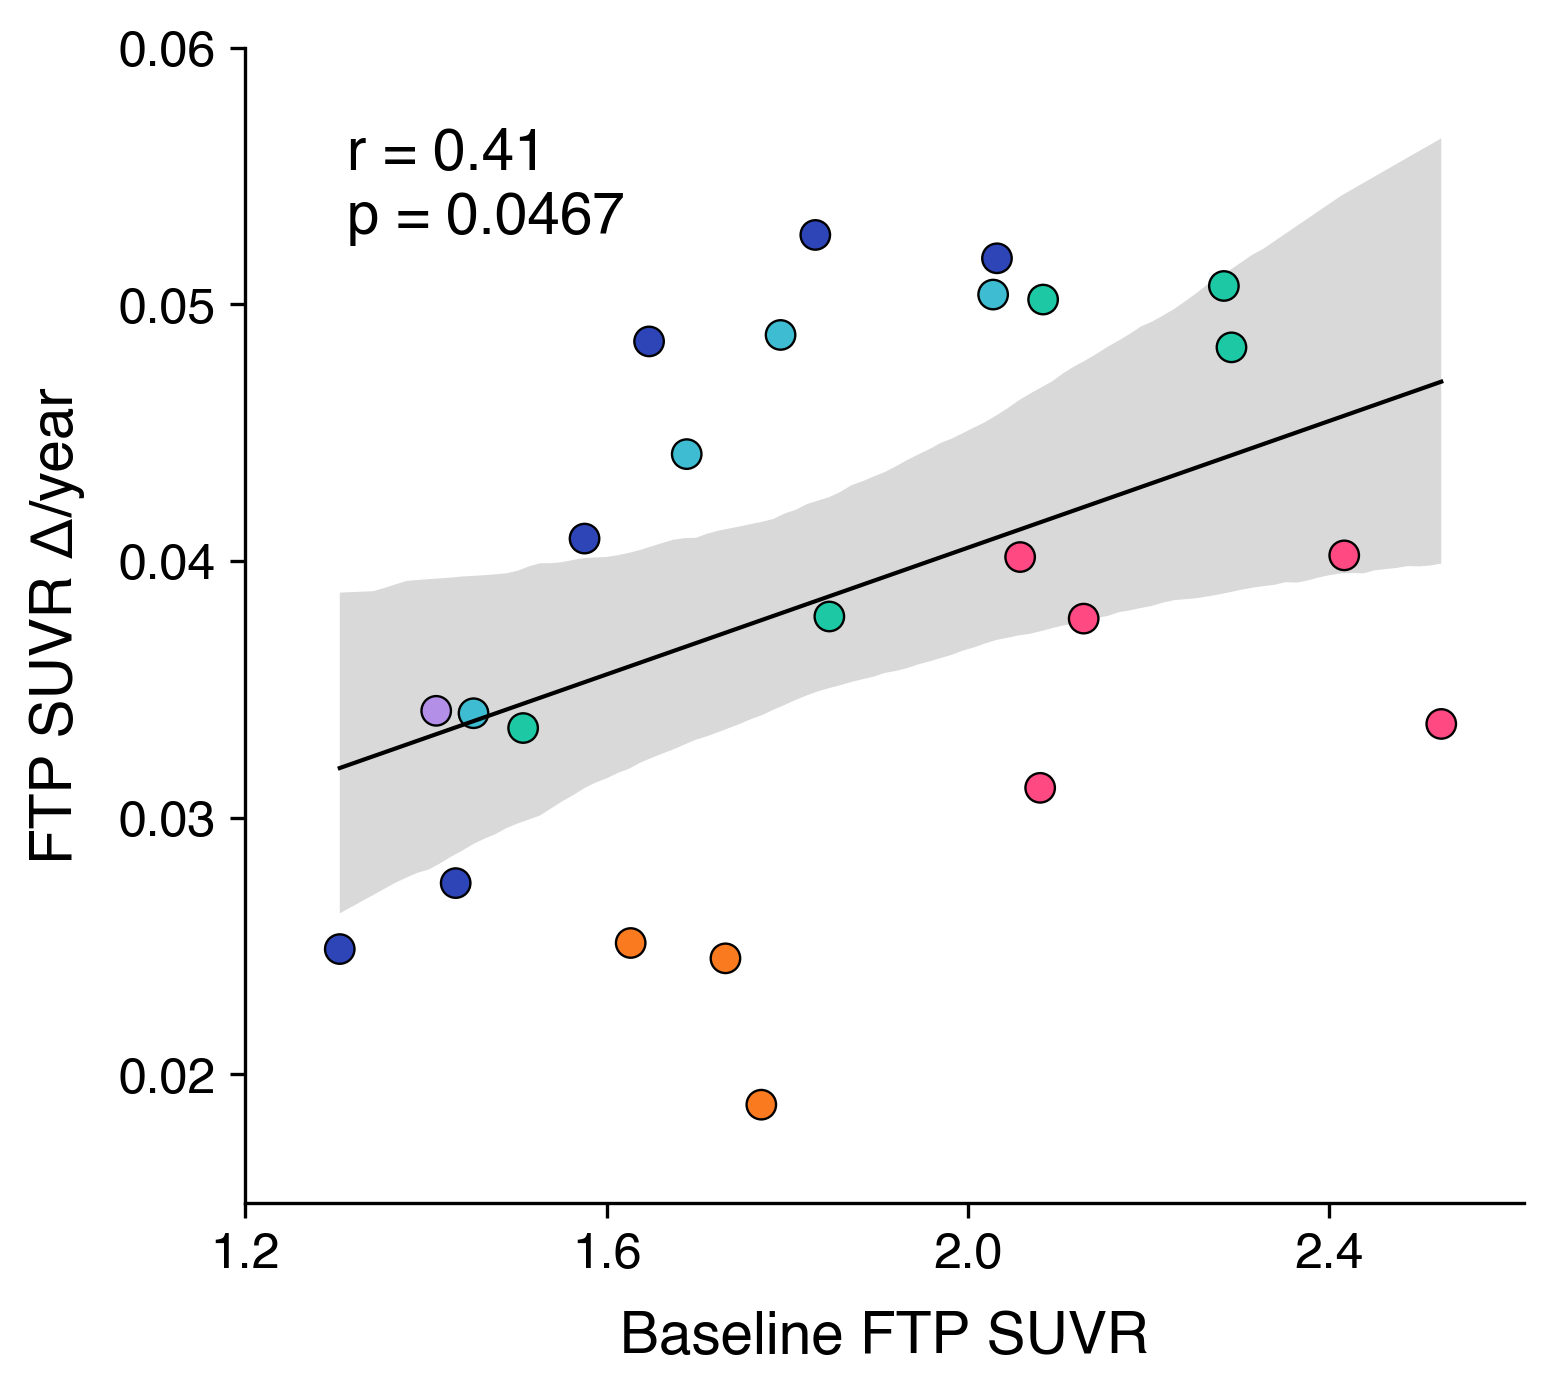

In [596]:
parc = "roi24"
qry = "(parc=='{}') & (dx=='EOAD') & (visit==1) & (subj=={})".format(parc, keep_subjs)
# _dat = tau_eoad_re.query(qry).groupby("roi").agg({"suvr_bl_re": np.median, "chg_yr_re": np.median}).reset_index()
_dat = pd.merge(
    emm["bl"][["roi", "suvr_bl_re"]], emm["long"][["roi", "chg_yr_re"]], on="roi"
)
show_legend = False

# --------------------------------
roi_map = (
    fsrois[["roi24", "lobe6"]].drop_duplicates().set_index("roi24")["lobe6"].to_dict()
)
_dat["lobe"] = _dat["roi"].map(roi_map)

# Create boxplots with scatter points overlaid in seaborn.
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = np.ravel(ax)

iax = 0
_ax = ax[iax]
xcol = "suvr_bl_re"
ycol = "chg_yr_re"
xmin = _dat[xcol].min() - (np.ptp(_dat[xcol]) * 0.075)
xmax = _dat[xcol].max() + (np.ptp(_dat[xcol]) * 0.075)
ymin = 0.015  # _dat[ycol].min() - (np.ptp(_dat[ycol]) * 0.075)
ymax = 0.06  # _dat[ycol].max() + (np.ptp(_dat[ycol]) * 0.075)

# Add line of best fit.
sns.regplot(
    x=xcol,
    y=ycol,
    data=_dat,
    ax=_ax,
    fit_reg=True,
    ci=95,
    truncate=True,
    scatter_kws={
        "s": 0,
    },
    line_kws={"color": "k", "linewidth": 1},
)

# Add the scatter points.
_ax.axvline(x=0, lw=1, zorder=0, color=co["p2"])
sns.scatterplot(
    x=xcol,
    y=ycol,
    data=_dat,
    ax=_ax,
    s=50,
    hue="lobe",
    palette=palettes["pal24"],
    edgecolor="k",
    hue_order=["Frontal", "MTL", "Occipital", "Parietal", "Temporal", "Sensorimotor"],
)

r, p = stats.pearsonr(_dat[xcol], _dat[ycol])
# r, p = stats.spearmanr(_dat[xcol], _dat[ycol])
fit = sm.OLS(_dat["chg_yr_re"], sm.add_constant(_dat["suvr_bl_re"])).fit().predict()
_dat["fit"] = fit
if p < 0.0001:
    msg = "r = {:.2f}\np < 0.0001".format(r)
else:
    msg = "r = {:.2f}\np = {:.4f}".format(r, p)

_ax.text(
    0.08,
    0.88,
    msg,
    transform=_ax.transAxes,
    ha="left",
    va="center",
    color=co["k"],
    fontsize=14,
)
# _ax.plot(_dat.sort_values(xcol)[xcol], _dat.sort_values(xcol)["fit"],
#          color="k", lw=1)

_ax.set_xlim([xmin, xmax])
_ax.set_ylim([ymin, ymax])
# _ax.set_aspect(np.ptp(_dat[xcol]) / np.ptp(_dat[ycol]))
_ax.set_xticks(np.arange(1.2, 2.6, 0.4))
_ax.set_yticks(np.arange(0.02, 0.061, 0.01))
_ax.set_xlabel("Baseline FTP SUVR")
_ax.set_ylabel("FTP SUVR Δ/year")

# get the legend and format it
handles, labels = _ax.get_legend_handles_labels()
if show_legend:
    legend = _ax.legend(
        handles=handles,
        labels=labels,
        markerscale=3,
        loc="upper right",
        bbox_to_anchor=(1.4, 0.47),
        frameon=False,
    )
else:
    _ax.get_legend().remove()

fig.set_size_inches(5.5, 5)
fig.show()

In [ ]:
parc = "roi24"
qry = "(parc=='{}') & (dx=='EOAD') & (visit==1) & (ftp_visits>={})".format(
    parc, min_visits
)
tau_eoad_re.query(qry).groupby("roi")[["suvr_bl_re", "chg_yr_re"]].describe().round(3)

In [ ]:
# Get a prediction column for chg_yr_re ~ suvr_bl_re in dat_pred using standard OLS.
dat_pred["ols_fit"] = (
    sm.OLS(dat_pred["chg_yr_re"], sm.add_constant(dat_pred["suvr_bl_re"]))
    .fit()
    .predict()
)
rmse = mse(dat_pred["chg_yr_re"], dat_pred["ols_fit"], squared=False)
print(rmse)

In [ ]:
# Count the number of subjects in dat_pred and return _quartiles for
# the columns: ftp_visits, age_at_ftp, and suvr_bl_re.
print(dat_pred["ftp_visits"].value_counts().sort_index())
print(dat_pred["age_at_ftp"].describe().round(1))
print(dat_pred["suvr_bl_re"].describe().round(3))

In [ ]:
min_visits = 2
check_cols = [
    "subj",
    "roi",
    "suvr_bl_re",
    "chg_yr_re",
    "age_at_ftp_bl",
    "sex",
    "fbb_cl_bl",
    "apoe4_alleles",
    "cdr_sb_bl",
]
qry = "(dx=='EOAD') & (ftp_visits>={})".format(min_visits)
keep_subjs = (
    tau_eoad_re.query(qry).loc[:, check_cols].dropna()["subj"].unique().tolist()
)
print(f"keep_subjs: {len(keep_subjs)}")

In [ ]:
# parc = "global"
# roi = "Brain"
parc = "roi24"
roi = "itg"
min_visits = 2
# xcol = "ftp_yrs_from_bl"
xcol = "age_at_ftp"
show_timepoint_connections = True
colorize_points_by_subj = False
show_model_fits = True
colorize_model_fits = True
skip_plot2 = False
plot_fit = False
fit_type = "ncs"  # ols, ncs, lowess
print_rmse = False
print_pearson = False
poly_order = 1
colorize_points_by_n_visits = False
scatter_size = 24
figsize = (5, 5 * 0.5)
dpi = 600
font = {"tick": 6, "label": 7, "title": 10, "annot": 7}
tickpad = 1.5
ticklen = 3
labelpad = 5
lw = 0.75
palette = "viridis"
bg_color = co["w"]

# ----------------------------------------------------------------------
# Select the data.
qry = (
    "(subj=={}) & (parc=='{}') & (roi=='{}') & (dx=='EOAD') & (ftp_visits>={})".format(
        keep_subjs, parc, roi, min_visits
    )
)
_dat = tau_all_agg.query(qry).reset_index(drop=True).copy()
qry = "(subj=={}) & (parc=='{}') & (roi=='{}') & (dx=='EOAD') & (visit==1) & (ftp_visits>={})".format(
    keep_subjs, parc, roi, min_visits
)
dat_pred = tau_eoad_re.query(qry).reset_index(drop=True).copy()
dat_pred["pet_visits_gt2"] = dat_pred["ftp_visits"] > 2
min_slope = dat_pred["chg_yr_re"].min()
max_slope = dat_pred["chg_yr_re"].max()
preds = dat_pred.set_index("subj")[["suvr_bl_re", "chg_yr_re"]].drop_duplicates()
_dat["suvr_bl_re"] = _dat.apply(lambda x: preds.at[x["subj"], "suvr_bl_re"], axis=1)
_dat["chg_yr_re"] = _dat.apply(lambda x: preds.at[x["subj"], "chg_yr_re"], axis=1)
_dat["fit"] = _dat.apply(
    lambda x: x["suvr_bl_re"] + (x["chg_yr_re"] * x["ftp_yrs_from_bl"]), axis=1
)

# Make a scatterplot of the data.
plt.close("all")
fig, ax = plt.subplots(1, 2, figsize=figsize, dpi=dpi)

# ----------------------------------------------------------------------
iax = 0
_ax = ax[iax]
xcol = xcol
ycol = "suvr"

# Add a point for each SUVR value.
if colorize_points_by_subj:
    sns.scatterplot(
        x=xcol,
        y=ycol,
        data=_dat,
        hue="subj",
        palette=palettes["pal24"],
        s=scatter_size,
        legend=False,
        ax=_ax,
        linewidth=lw / 3,
        marker="$\circ$",
        ec="face",
    )
else:
    _ax.scatter(
        x=_dat[xcol],
        y=_dat[ycol],
        s=scatter_size / 3,
        facecolors="none",
        edgecolors="k",
        linewidths=lw,
    )

# Add a line connecting values from each subject over time.
if show_timepoint_connections:
    if colorize_points_by_subj:
        sns.lineplot(
            x=xcol,
            y=ycol,
            data=_dat,
            ax=_ax,
            hue="subj",
            palette=palettes["pal24"],
            lw=lw / 3,
            legend=False,
            zorder=0,
        )
    else:
        sns.lineplot(
            x=xcol,
            y=ycol,
            data=_dat,
            ax=_ax,
            hue="subj",
            palette=["k"],
            lw=lw / 3,
            legend=False,
            zorder=0,
        )

# Add a line for each subject showing the model-predicted values.
if show_model_fits:
    if colorize_model_fits:
        vlim = tuple(np.percentile(_dat["chg_yr_re"], [2.5, 97.5]))
        sns.lineplot(
            x=xcol,
            y="fit",
            data=_dat,
            units="subj",
            estimator=None,
            hue="chg_yr_re",
            hue_norm=vlim,
            palette=palette,
            lw=lw,
            legend=False,
            ax=_ax,
        )
    else:
        sns.lineplot(
            x=xcol,
            y="fit",
            data=_dat,
            units="subj",
            estimator=None,
            color="k",
            lw=lw,
            legend=False,
            ax=_ax,
        )

# Label axes.
if xcol == "ftp_yrs_from_bl":
    _ax.set_xlabel("Years from baseline", fontsize=font["label"], labelpad=labelpad)
elif xcol == "age_at_ftp":
    _ax.set_xlabel("Age at scan", fontsize=font["label"], labelpad=labelpad)
else:
    _ax.set_xlabel(
        xcol.replace("_", " ").capitalize(), fontsize=font["label"], labelpad=labelpad
    )
_ax.set_ylabel("FTP SUVR", fontsize=font["label"], labelpad=labelpad)

# Set the legend limits.
max_slope = np.abs(dat_pred["chg_yr_re"].max())

# Control the hue limits.
_ax.collections[0].set_clim(-max_slope, max_slope)

# ----------------------------------------------------------------------
from patsy import dmatrix

iax = 1
_ax = ax[iax]
xcol = "suvr_bl_re"
ycol = "chg_yr_re"
xlim = (2, 7.2)
xticks = [2, 3, 4, 5, 6, 7]
ylim = (-0.2, 0.6)
yticks = [-0.2, 0, 0.2, 0.4, 0.6]
if skip_plot2:
    _ax.axis("off")
else:
    # Make a scatterplot of baseline SUVR vs. slope for each subject.
    plot_partial_residuals = True
    if plot_partial_residuals:
        _dat = dat["long"].query("roi=='{}' & subj=={}".format(roi, keep_subjs))
        # ycol = "partial"
    else:
        _dat = dat_pred
        ycol = "chg_yr_re"

    _ax.scatter(
        x=_dat[xcol],
        y=_dat[ycol],
        s=scatter_size / 3,
        facecolors="none",
        edgecolors="k",
        linewidths=lw,
    )

    if plot_fit:
        # Add the Pearson correlation as a text annotation.
        r, p = stats.pearsonr(_dat[xcol], _dat[ycol])
        if fit_type == "ols":
            _dat["fit"] = (
                sm.OLS(_dat["chg_yr_re"], sm.add_constant(_dat["suvr_bl_re"]))
                .fit()
                .predict()
            )
        elif fit_type == "ncs":
            transformed_x3 = dmatrix(
                "cr(iv,df = 3)", {"iv": _dat[xcol]}, return_type="dataframe"
            )
            _dat["fit"] = sm.GLM(_dat["chg_yr_re"], transformed_x3).fit().predict()

        rmse = mse(_dat["chg_yr_re"], _dat["fit"], squared=False)

        _ax.plot(
            _dat.sort_values(xcol)[xcol],
            _dat.sort_values(xcol)["fit"],
            color=co["p"],
            lw=lw * 1.5,
        )

    # sns.regplot(x=xcol, y=ycol, data=_dat, ax=_ax,
    #             fit_reg=plot_fit, lowess=lowess, order=poly_order, ci=95, truncate=True,
    #             scatter_kws={
    #                     "s": scatter_size/3,
    #                     "facecolors": "none",
    #                     "edgecolors": "k",
    #                     "linewidths": lw,
    #             },
    #             line_kws={
    #                     "color": co["b"],
    #                     "linewidth": lw*1.5,
    #             })

    if plot_fit:
        if print_rmse:
            msg = "RMSE = {:.3f}".format(rmse)
            _ax.text(
                0.05,
                0.9,
                msg,
                transform=_ax.transAxes,
                ha="left",
                va="center",
                fontsize=font["annot"],
                color=co["k"],
            )
        elif print_pearson:
            if poly_order == 1 and not lowess:
                if p < 0.0001:
                    msg = "r = {:.2f}\np < 0.0001".format(r)
                else:
                    msg = "r = {:.2f}\np = {:.4f}".format(r, p)
            _ax.text(
                0.05,
                0.9,
                msg,
                transform=_ax.transAxes,
                ha="left",
                va="center",
                fontsize=font["annot"],
                color=co["k"],
            )

        # if colorize_points_by_n_visits:
        #     sns.scatterplot(x=xcol, y=ycol, data=_dat,
        #                     hue="pet_visits_gt2", palette=[co["b"], co["p"]],
        #                     s=scatter_size, legend=True, ax=_ax,
        #                     linewidth=lw/3, marker="$\circ$", ec="face")
        # else:
        #     _ax.scatter(x=_dat[xcol], y=_dat[ycol], s=scatter_size/3,
        #                 facecolors="none", edgecolors="k", linewidths=lw)

    # Draw a horizontal dashed line through 0
    _ax.axhline(0, ls="-", lw=lw, color=co["k"], zorder=0)

    # _ax.set_xlim(xlim)
    # _ax.set_ylim(ylim)
    # _ax.set_xticks(xticks)
    # _ax.set_yticks(yticks)
    _ax.set_xlabel("Baseline FTP SUVR", fontsize=font["label"], labelpad=labelpad)
    _ax.set_ylabel("FTP SUVR change/year", fontsize=font["label"], labelpad=labelpad)

    if colorize_points_by_n_visits:
        leg = _ax.legend(
            loc="upper right",
            bbox_to_anchor=(0.95, 0.95),
            fontsize=font["tick"],
            # labels=["2 visits", "3+ visits"],
            borderpad=0,
            handletextpad=0,
            title="3+ scans",
            title_fontsize=font["tick"],
        )

# ----------------------------
for _ax in ax:
    _ax.tick_params(labelsize=font["tick"], length=ticklen, width=lw, pad=tickpad)
    _ax.set_facecolor(bg_color)
    _ax.grid(False)

roi_full = tau_all_agg.query(qry).query(f"roi=='{roi}'")["roi_full"].iloc[0]
fig.suptitle(f"{roi_full}", fontsize=font["title"], y=0.94)
fig.patch.set_facecolor(bg_color)
fig.tight_layout()
plt.show()

# Plots

In [ ]:
# for parc in tau_eoad_re["parc"].unique():
#     print(parc, "-"*len(parc), sep="\n")
#     for roi in tau_eoad_re.query(f"(parc=='{parc}')")["roi"].unique():
#         print(f"{roi}")
#     print("")

In [ ]:
df = pd.read_csv(
    file.path(
        data_dir, "tau-rois-agg_eoad-subj-random-slopes-icpts_gt1visit_2023-05-14.csv"
    )
)

In [ ]:
# dat = (100*df.drop_duplicates("subj")["site"].value_counts().cumsum()/144).reset_index()
dat = df.drop_duplicates("subj")["site"].value_counts().cumsum().reset_index()
plt.close("all")
fig, ax = plt.subplots(1, 1, dpi=300)
ax.axhline(y=108, color=co["x2"], lw=1)
ax.axvline(x=5, color=co["x2"], lw=1)
ax.plot(dat.index + 1, dat["count"], color="k", lw=2)


ax.set_xlabel("LEADS Site")
ax.set_ylabel("# subjects")

In [ ]:
dx = "EOAD"
visit = 1
mat = wscore_mats[(dx, visit)]
mask = None  # mat[:, 1:]<2
vmin = 0  # 2
vmax = 30  # 48
cbar_ticks = [0, 10, 20, 30]  # [2, 12, 24, 36, 48]
cmap = "rocket"
cbar_label = "Tau-PET W-score"

# visit = "2 - 1"
# mat = wscore_mats[(dx, 2)] - wscore_mats[(dx, 1)]
# scaling_factor = (
#     tau_rois_w.query("(dx=='EOAD') & (pet_visits>1) & (visit==2)").sort_values(
#         "subj_order_suvr_all"
#     )["days_from_baseline_pet"]
#     / 365
# ).values
# mat /= np.expand_dims(scaling_factor, axis=-1)  # change/year
# mask = None
# vmin = -12
# vmax = 12
# cbar_ticks = [-12, -6, 0, 6, 12]
# cmap = "RdBu_r"
# cbar_label = "FTP W-Score ($\Delta$/yr)"

colws = {1: 2.05, 2: 3.125, 3: 6.45}
grid_shp = [75, 50]
figsize = (colws[3], colws[3] * (grid_shp[0] / grid_shp[1]))
dpi = 600
ticklen = 2
tickwidth = 0.5
tickpad = 1.5
labelpad = 5
nsubjs = mat.shape[0]
# roi_ticks_major = np.where(
#     np.concatenate(
#         ([True], fsrois["lobe"].values[:-1] != fsrois["lobe"].values[1:], [True])
#     )
# )[0]
# roi_ticks_minor = aop.rolling_func(roi_ticks_major, np.mean, 2)
# roi_tick_labs = (
#     fsrois[["hem", "lobe"]]
#     .drop_duplicates()
#     .apply(lambda x: "{} {}".format(x["hem"], x["lobe"].capitalize()), axis=1)
#     .values
# )
yticks = np.arange(len(fsrois["hemroi"])) + 0.5
yticklabs = [x.replace("_", " ") for x in fsrois["hemroi"].tolist()]
xticks = np.array([1, 50, 100, 150, 200, 250]) - 0.5
xticklabs = np.array([1, 50, 100, 150, 200, 250])
fig_title = "Visit {}".format(visit)
background_color = "#3F5661"
savefig = 1
overwrite = 1
# ---------------------

plt.close("all")
fig = plt.figure(figsize=figsize, dpi=dpi)
ax = [
    plt.subplot2grid(grid_shp, (0, 0), rowspan=71, colspan=50),
    plt.subplot2grid(grid_shp, (72, 0), rowspan=3, colspan=50),
]

iax = 0
_ax = ax[iax]
_ax = sns.heatmap(
    mat[:, 1:].T,
    mask=mask,
    vmin=vmin,
    vmax=vmax,
    ax=_ax,
    cbar=True,
    cbar_ax=ax[iax + 1],
    cmap=cmap,
    cbar_kws={"orientation": "horizontal"},
)

cbar = _ax.collections[0].colorbar
cbar.ax.tick_params(
    labelsize=font["tick"], length=ticklen, width=tickwidth, pad=tickpad
)
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels(cbar_ticks)
if cbar_label is not None:
    cbar.set_label(cbar_label, fontsize=font["label"] + 1, labelpad=labelpad - 2)
_ax.set_facecolor(background_color)
# _ax.invert_yaxis()
# _ax.tick_params(
#     which="major", labelsize=font["tick"], length=ticklen, width=tickwidth, pad=tickpad
# )
# _ax.tick_params(
#     which="minor", labelsize=font["tick"] - 2, length=0, pad=tickpad * 1.5, rotation=90
# )
# _ax.set_xticks(roi_ticks_major)
# _ax.set_xticks(roi_ticks_minor, minor=True)
# _ax.set_xticklabels(roi_tick_labs, minor=True)
_ax.tick_params(
    axis="x",
    labelsize=font["tick"],
    length=ticklen,
    width=tickwidth,
    pad=tickpad,
    rotation=0,
)
_ax.tick_params(
    axis="y",
    labelsize=font["tick"],
    length=ticklen,
    width=tickwidth,
    pad=tickpad,
    rotation=0,
)
_ax.xaxis.tick_top()
_ax.xaxis.set_label_position("top")

_ax.set_xticks(xticks)
_ax.set_xticklabels(xticklabs)
_ax.set_yticks(yticks)
_ax.set_yticklabels(yticklabs)
_ax.set_xlabel(
    "EOAD Patient 1..{}".format(nsubjs),
    fontsize=font["label"] + 1,
    labelpad=labelpad + 2,
)
# _ax.set_title(fig_title, fontsize=font["title"])

if savefig:
    filename = op.join(
        fig_dir,
        "FTP_ROI_W-scores_{}_Visit{}_{}subjsT.png".format(
            dx, str(visit).replace(" ", ""), nsubjs
        ),
    )
    if overwrite or not op.exists(filename):
        fig.savefig(filename, dpi=dpi, bbox_inches="tight", pad_inches=0.1)
        fig.savefig(filename.replace(".png", ".pdf"), bbox_inches="tight", pad_inches=0)
        print("Saved {}".format(filename))

In [ ]:
tau_eoad_re.head()

In [ ]:
qry = "(subj=={}) & (parc=='{}')".format(keep_subjs, parc)
pd.pivot(index="roi", columns="subj", values="suvr_bl_re", data=tau_eoad_re.query(qry))

In [ ]:
fsrois.drop_duplicates("roi24")[["roi24", "roi24_full", "roi24_order"]].sort_values(
    "roi24_order"
)

In [ ]:
dat = tau_eoad_re.query("(parc=='roi24')")
for col in [
    "visit",
    "age_at_ftp",
    "age_at_ftp_bl",
    "educ",
    "fbb_cl_bl",
    "mmse_bl",
    "cdr_sb_bl",
    "suvr",
    "suvr_bl",
    "chg_suvr",
    "suvr_bl_re",
    "chg_yr_re",
]:
    print(f"{col:>13}: min = {dat[col].min():<6.3f}, max = {dat[col].max():<6.3f}")

/var/folders/c6/3jkgtnm96jqdyqv_gqr__hy00000gp/T/ipykernel_25348/2031682883.py:66: UserWarning: 
The palette list has fewer values (1) than needed (144) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x=plot1_xcol, y="suvr", data=dat, ax=_ax,


NameError: name 'plot2_palette' is not defined

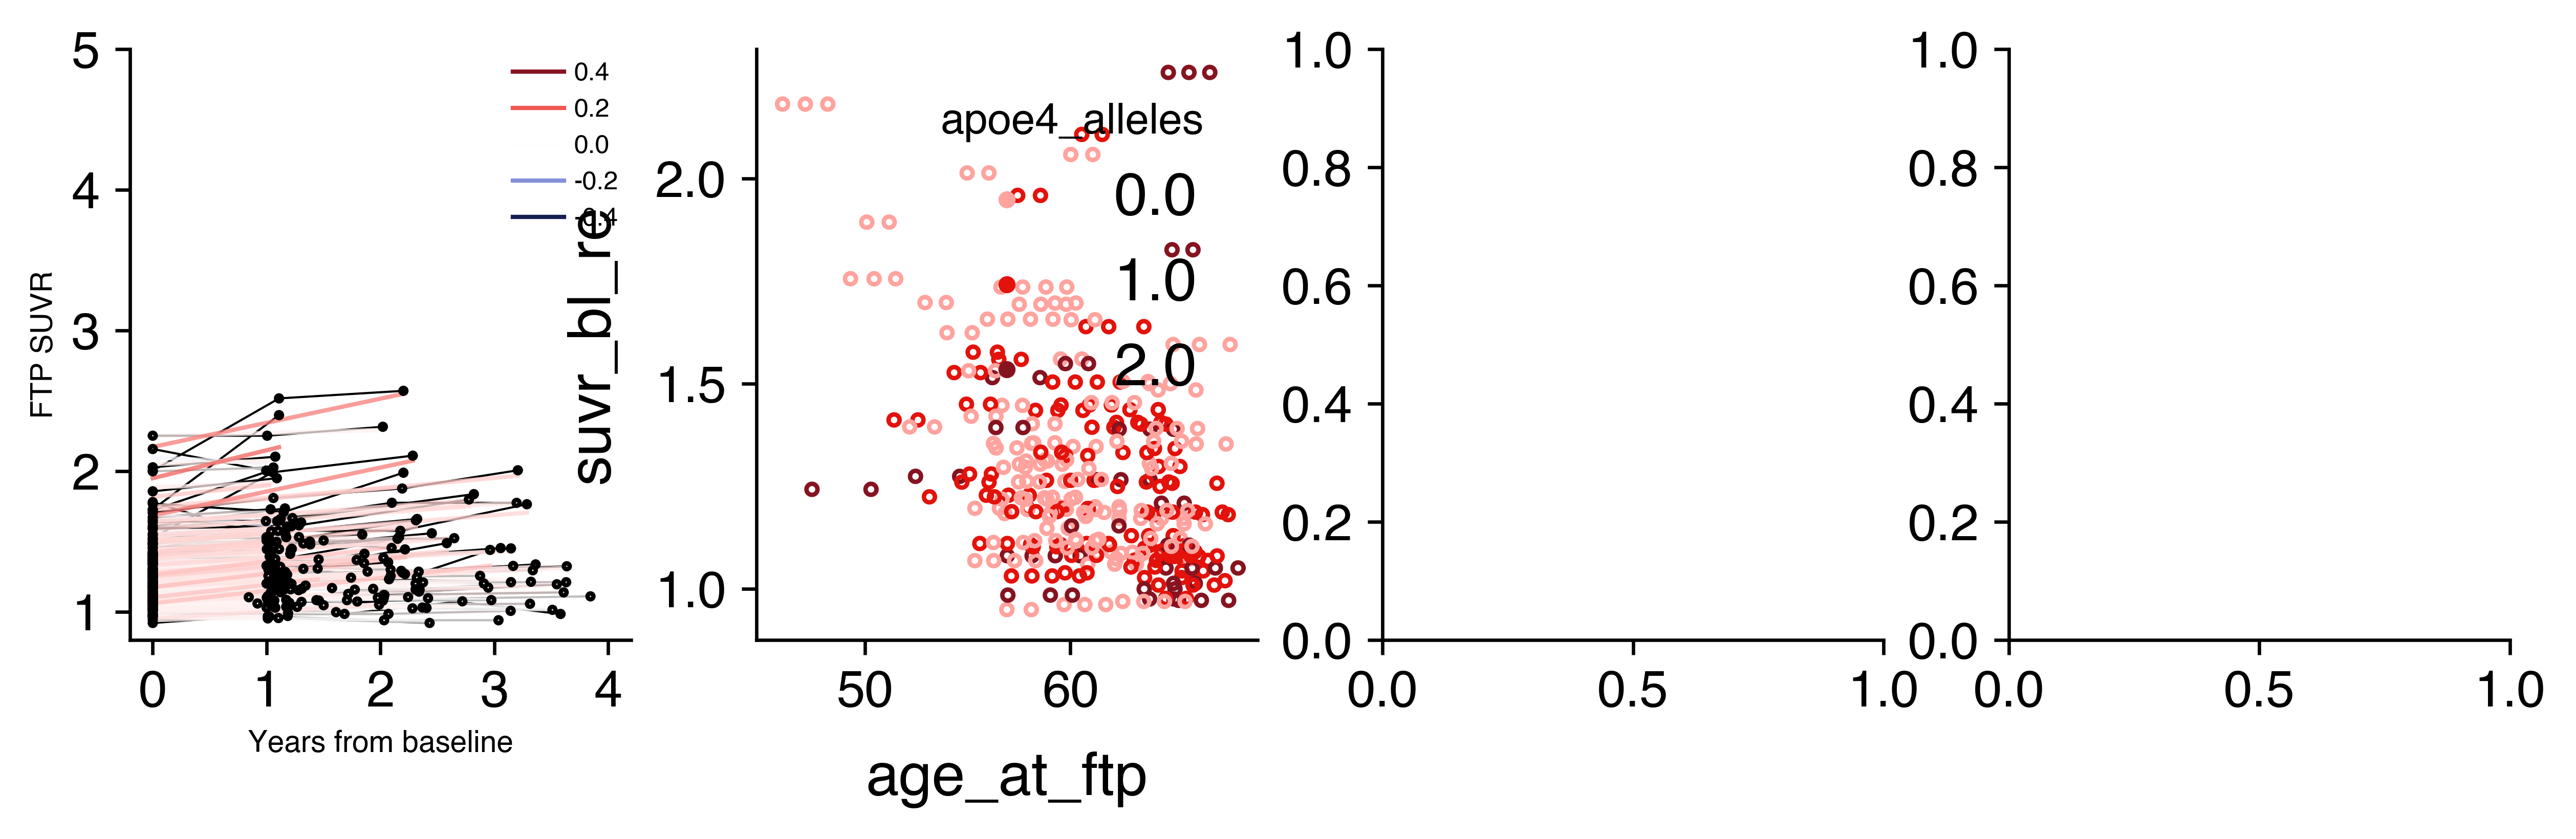

In [497]:
parc = "roi24"
roi = "acc"
min_visits = 2
scatter_size = 24
figsize = (10, 10 * 0.25)
dpi = 600
font = {"tick": 6, "label": 7, "title": 10, "annot": 7}
tickpad = 1.5
ticklen = 3
labelpad = 3
lw = 1
marker = "$\circ$"
# palette = "RdBu_r"
# palette = sns.blend_palette([co["blue3"], co["blue2"], co["blue1"], "w", co["red1"], co["red2"], co["red3"]], as_cmap=True)
palette_str = "blend:" + ",".join(
    [co["blue3"], co["blue2"], co["blue1"], "w", co["red1"], co["red2"], co["red3"]]
)
palette = sns.color_palette(palette_str, 100, as_cmap=True)
bg_color = co["x1"]
show_timepoint_connections = True
plot1_hue = True
color_subject_points = False
plot1_xcol = "ftp_yrs_from_bl"
plot4_hue = "apoe4_alleles"  # "sex" # "ftp_visits_gt2" None
plot23_xcol = "age_at_ftp"  # "cdr_sb_bl"
plot23_hue = "apoe4_alleles"  # "sex" # "ftp_visits_gt2" None

# ----------------------------------------------------------------------
# Define axis cutoffs.
years_lim = [-0.2, 4.2]
years_ticks = [0, 1, 2, 3, 4]
suvr_lim = [0.8, 5]
suvr_ticks = [1, 2, 3, 4, 5]
suvr_bl_lim = [0.8, 5]
suvr_bl_ticks = [1, 2, 3, 4, 5]
chg_yr_lim = [-0.3, 0.45]
chg_yr_ticks = [-0.2, 0, 0.2, 0.4]
age_lim = [45, 70]
age_ticks = [45, 50, 55, 60, 65, 70]
cl_lim = [25, 171]
cl_ticks = [25, 50, 75, 100, 125, 150]
mmse_lim = [0, 30]
mmse_ticks = [0, 10, 20, 30]
cdr_sb_lim = [-0.5, 8.5]
cdr_sb_ticks = [0, 2, 4, 6, 8]
educ_lim = [11, 21]
educ_ticks = [12, 14, 16, 18, 20]

# ----------------------------------------------------------------------
# Select data for the given ROI.
keep_cols = tau_eoad_re.columns.tolist()
dat = tau_eoad_re.query(
    f"(parc=='{parc}') & (roi=='{roi}') & (ftp_visits>={min_visits})"
)[keep_cols].copy()
dat["ftp_visits_gt2"] = dat["ftp_visits"] > 2
max_slope = tau_eoad_re.query(f"(parc=='{parc}')")["chg_yr_re"].abs().max()
min_slope = -max_slope

# Make a scatterplot of the data.
plt.close("all")
fig, ax = plt.subplots(1, 4, figsize=figsize, dpi=dpi)

# ----------------------------------------------------------------------
# Plot 1: SUVR vs. years from baseline spagetti plots
iax = 0
_ax = ax[iax]

# Add a line connecting values from each subject over time.
if show_timepoint_connections:
    sns.lineplot(
        x=plot1_xcol,
        y="suvr",
        data=dat,
        ax=_ax,
        hue="subj",
        palette=["k"],
        lw=lw * 0.5,
        legend=False,
        zorder=0,
    )

# Add a point for each SUVR value.
if color_subject_points:
    sns.scatterplot(
        x=plot1_xcol,
        y="suvr",
        data=dat,
        legend=False,
        ax=_ax,
        hue="subj",
        palette=palettes["economist16"],
        marker=".",
        s=scatter_size,
        ec="face",
        lw=lw,
    )
else:
    _ax.scatter(
        x=dat[plot1_xcol],
        y=dat["suvr"],
        s=scatter_size / 3,
        marker=".",
        facecolors="none",
        edgecolors="k",
        linewidths=lw,
    )

# Add a line for each subject showing the model-predicted values.
if plot1_hue:
    sns.lineplot(
        x=plot1_xcol,
        y="re_pred",
        data=dat,
        units="subj",
        hue="chg_yr_re",
        hue_norm=(-max_slope, max_slope),
        palette=palette,
        lw=lw,
        alpha=0.75,
        legend=False,
        ax=_ax,
        zorder=0,
    )

# Format the axes.
_ax.set(xlim=years_lim, xticks=years_ticks, ylim=suvr_lim, yticks=suvr_ticks)

# Label axes.
if plot1_xcol == "ftp_yrs_from_bl":
    _ax.set_xlabel("Years from baseline", fontsize=font["label"], labelpad=labelpad)
else:
    _ax.set_xlabel(
        plot1_xcol.replace("_", " ").capitalize(),
        fontsize=font["label"],
        labelpad=labelpad,
    )
_ax.set_ylabel("FTP SUVR", fontsize=font["label"], labelpad=labelpad)

# Control the hue limits.
if plot1_hue:
    legend_labels = np.round(np.linspace(-max_slope, max_slope, 5), 1)
    legend_colors = sns.color_palette(palette_str, len(legend_labels))
    legend_lines = []
    for _color in legend_colors:
        legend_lines.append(mpl.lines.Line2D([0], [0], color=_color, lw=lw))
    _ax.legend(
        legend_lines,
        legend_labels,
        loc="upper right",
        bbox_to_anchor=(1, 1),
        fontsize=font["tick"],
        borderpad=0,
        handletextpad=0.4,
        title_fontsize=font["tick"],
        reverse=True,
        # labels=["2 visits", "3+ visits"],
        # title="FTP change/year (REM)",
    )

# ----------------------------------------------------------------------
# Plot 2: xcol3_4 vs. Baseline SUVR
iax += 1
_ax = ax[iax]
if plot23_hue:
    _cols = ["subj", plot23_xcol, plot23_hue]
else:
    _cols = ["subj", plot23_xcol]
idx = dat.drop_duplicates(_cols)[_cols].dropna().index
if plot23_hue:
    plot23_palette = [co["red1"], co["red2"], co["red3"]]
    plot23_palette = plot23_palette[: dat.loc[idx, plot23_hue].nunique()]
    sns.scatterplot(
        x=plot23_xcol,
        y="suvr_bl_re",
        data=dat.loc[idx],
        hue=plot23_hue,
        palette=plot23_palette,
        s=scatter_size,
        legend=True,
        ax=_ax,
        linewidths=lw * 0.5,
        marker=marker,
        ec="face",
    )
else:
    _ax.scatter(
        x=dat[plot23_xcol],
        y=dat["suvr_bl_re"],
        s=scatter_size / 3,
        facecolors="none",
        edgecolors="k",
        linewidths=lw,
    )

if plot23_hue:
    for i, (lvl, _df) in enumerate(dat.loc[idx].groupby(plot23_hue)):
        xvals = _df[plot23_xcol]
        yvals = _df["suvr_bl_re"]
        x_mean = xvals.mean()
        y_mean = yvals.mean()
        _ax.scatter(
            x_mean,
            y_mean,
            s=scatter_size * 2,
            color=plot2_palette[i],
            marker="^",
            edgecolors="k",
            linewidths=lw,
        )

# Format the axes.
if "age" in plot23_xcol:
    xlim = age_lim
    xticks = age_ticks
elif "fbb" in plot23_xcol:
    xlim = cl_lim
    xticks = cl_ticks
elif "mmse_bl" in plot23_xcol:
    xlim = mmse_lim
    xticks = mmse_ticks
elif "cdr_sb" in plot23_xcol:
    xlim = cdr_sb_lim
    xticks = cdr_sb_ticks
elif "educ" in plot23_xcol:
    xlim = educ_lim
    xticks = educ_ticks
else:
    xlim = _ax.get_xlim()
    xticks = _ax.get_xticks()
_ax.set(xlim=xlim, xticks=xticks, ylim=suvr_bl_lim, yticks=suvr_bl_ticks)
if "cdr_sb" in plot23_xcol:
    _ax.set_xlabel("CDR-SB Baseline", fontsize=font["label"], labelpad=labelpad)
else:
    _ax.set_xlabel(
        plot23_xcol.replace("_", " ").capitalize().replace("ftp", "FTP"),
        fontsize=font["label"],
        labelpad=labelpad,
    )
_ax.set_ylabel("Baseline FTP (REM)", fontsize=font["label"], labelpad=labelpad)

# Plot the line of best fit.
if plot23_hue:
    fit = stats.linregress(dat.loc[idx][plot23_xcol], dat.loc[idx]["suvr_bl_re"])
else:
    fit = stats.linregress(dat[plot23_xcol], dat["suvr_bl_re"])
slope, icpt, r, p = fit.slope, fit.intercept, fit.rvalue, fit.pvalue
_ax.plot(
    [_ax.get_xlim()[0], _ax.get_xlim()[1]],
    [slope * _ax.get_xlim()[0] + icpt, slope * _ax.get_xlim()[1] + icpt],
    color="k",
    lw=lw,
    zorder=0,
)
if p < 0.0001:
    msg = "r = {:.2f}\np < 0.0001".format(r)
else:
    msg = "r = {:.2f}\np = {:.4f}".format(r, p)
_ax.text(
    0.05,
    0.92,
    msg,
    transform=_ax.transAxes,
    ha="left",
    va="center",
    fontsize=font["annot"],
    color="k",
)

# Format the legend.
if plot23_hue:
    leg = _ax.legend(
        loc="upper right",
        bbox_to_anchor=(0.95, 0.95),
        fontsize=font["tick"],
        borderpad=0,
        handletextpad=0,
        title_fontsize=font["tick"],
        # labels=["2 visits", "3+ visits"],
        title=plot23_hue.replace("_", " ").capitalize(),
    )

# ----------------------------------------------------------------------
# Plot 3: xcol3_4 vs. change in SUVR
iax += 1
_ax = ax[iax]
if plot23_hue:
    sns.scatterplot(
        x=plot23_xcol,
        y="chg_yr_re",
        data=dat.loc[idx],
        hue=plot23_hue,
        palette=plot23_palette,
        s=scatter_size,
        legend=True,
        ax=_ax,
        marker=marker,
        ec="face",
        lw=lw,
    )
else:
    _ax.scatter(
        x=dat[plot23_xcol],
        y=dat["chg_yr_re"],
        s=scatter_size / 3,
        facecolors="none",
        edgecolors="k",
        linewidths=lw,
    )

if plot23_hue:
    for i, (lvl, _df) in enumerate(dat.loc[idx].groupby(plot23_hue)):
        xvals = _df[plot23_xcol]
        yvals = _df["chg_yr_re"]
        x_mean = xvals.mean()
        y_mean = yvals.mean()
        _ax.scatter(
            x_mean,
            y_mean,
            s=scatter_size * 2,
            color=plot2_palette[i],
            marker="^",
            edgecolors="k",
            linewidths=lw,
        )

# Format the axes.
_ax.set(xlim=xlim, xticks=xticks, ylim=chg_yr_lim, yticks=chg_yr_ticks)
if "cdr_sb" in plot23_xcol:
    _ax.set_xlabel("CDR-SB Baseline", fontsize=font["label"], labelpad=labelpad)
else:
    _ax.set_xlabel(
        plot23_xcol.replace("_", " ").capitalize().replace("ftp", "FTP"),
        fontsize=font["label"],
        labelpad=labelpad,
    )
_ax.set_ylabel("FTP change/year (REM)", fontsize=font["label"], labelpad=labelpad)

# Plot the line of best fit.
if plot23_hue:
    fit = stats.linregress(dat.loc[idx][plot23_xcol], dat.loc[idx]["chg_yr_re"])
else:
    fit = stats.linregress(dat[plot23_xcol], dat["chg_yr_re"])
slope, icpt, r, p = fit.slope, fit.intercept, fit.rvalue, fit.pvalue
_ax.plot(
    [_ax.get_xlim()[0], _ax.get_xlim()[1]],
    [slope * _ax.get_xlim()[0] + icpt, slope * _ax.get_xlim()[1] + icpt],
    color="k",
    lw=lw,
    zorder=0,
)
if p < 0.0001:
    msg = "r = {:.2f}\np < 0.0001".format(r)
else:
    msg = "r = {:.2f}\np = {:.4f}".format(r, p)
_ax.text(
    0.05,
    0.92,
    msg,
    transform=_ax.transAxes,
    ha="left",
    va="center",
    fontsize=font["annot"],
    color="k",
)

# Draw a horizontal dashed line through 0
_ax.axhline(0, ls="-", lw=lw, color=co["x3"], zorder=0)

# Format the legend.
if plot23_hue:
    leg = _ax.legend(
        loc="upper right",
        bbox_to_anchor=(0.95, 0.95),
        fontsize=font["tick"],
        borderpad=0,
        handletextpad=0,
        title_fontsize=font["tick"],
        # labels=["2 visits", "3+ visits"],
        title=plot23_hue.replace("_", " ").capitalize(),
    )

# ----------------------------------------------------------------------
# Plot 4: Baseline SUVR vs. change in SUVR
iax += 1
_ax = ax[iax]
if plot4_hue:
    idx = dat.drop_duplicates(["subj", plot4_hue])[plot4_hue].dropna().index
else:
    idx = dat.drop_duplicates(["subj"]).index
if plot4_hue:
    plot4_palette = [co["red1"], co["red2"], co["red3"]]
    plot4_palette = plot4_palette[: dat.loc[idx, plot4_hue].nunique()]
    sns.scatterplot(
        x="suvr_bl_re",
        y="chg_yr_re",
        data=dat.loc[idx],
        hue=plot4_hue,
        palette=plot4_palette,
        s=scatter_size,
        legend=True,
        ax=_ax,
        linewidths=lw * 0.5,
        marker=marker,
        ec="face",
    )
else:
    _ax.scatter(
        x=dat["suvr_bl_re"],
        y=dat["chg_yr_re"],
        s=scatter_size / 3,
        facecolors="none",
        edgecolors="k",
        linewidths=lw,
    )

# For each group in plot4_hue, add a point showing the mean SUVR and mean change in SUVR,
# then add errorbars showing 2 * SEM along each axis.
if plot4_hue:
    for i, (lvl, _df) in enumerate(dat.loc[idx].groupby(plot4_hue)):
        suvr_bl_re = _df["suvr_bl_re"]
        chg_yr_re = _df["chg_yr_re"]
        x_mean = suvr_bl_re.mean()
        y_mean = chg_yr_re.mean()
        _ax.scatter(
            x_mean,
            y_mean,
            s=scatter_size * 2,
            color=plot4_palette[i],
            marker="^",
            edgecolors="k",
            linewidths=lw,
        )

# Format the axes.
_ax.set(xlim=suvr_bl_lim, xticks=suvr_bl_ticks, ylim=chg_yr_lim, yticks=chg_yr_ticks)
_ax.set_xlabel("Baseline FTP (REM)", fontsize=font["label"], labelpad=labelpad)
_ax.set_ylabel("FTP change/year (REM)", fontsize=font["label"], labelpad=labelpad)

# Plot the line of best fit.
if plot4_hue:
    fit = stats.linregress(dat.loc[idx]["suvr_bl_re"], dat.loc[idx]["chg_yr_re"])
else:
    fit = stats.linregress(dat["suvr_bl_re"], dat["chg_yr_re"])
slope, icpt, r, p = fit.slope, fit.intercept, fit.rvalue, fit.pvalue
_ax.plot(
    [_ax.get_xlim()[0], _ax.get_xlim()[1]],
    [slope * _ax.get_xlim()[0] + icpt, slope * _ax.get_xlim()[1] + icpt],
    color="k",
    lw=lw,
    zorder=0,
)
if p < 0.0001:
    msg = "r = {:.2f}\np < 0.0001".format(r)
else:
    msg = "r = {:.2f}\np = {:.4f}".format(r, p)
_ax.text(
    0.05,
    0.92,
    msg,
    transform=_ax.transAxes,
    ha="left",
    va="center",
    fontsize=font["annot"],
    color="k",
)

# Draw a horizontal dashed line through 0
_ax.axhline(0, ls="-", lw=lw, color=co["x3"], zorder=0)

# Format the legend.
if plot4_hue:
    leg = _ax.legend(
        loc="upper right",
        bbox_to_anchor=(0.95, 0.95),
        fontsize=font["tick"],
        borderpad=0,
        handletextpad=0,
        title_fontsize=font["tick"],
        # labels=["2 visits", "3+ visits"],
        title=plot4_hue.replace("_", " ").capitalize(),
    )

# ----------------------------------------------------------------------
# Figure formatting
for _ax in ax:
    _ax.tick_params(labelsize=font["tick"], length=ticklen, width=lw, pad=tickpad)
    _ax.set_facecolor(bg_color)
    _ax.grid(False)

fig.suptitle(  # f"{parc}: ".capitalize() + f"{roi}".replace("_", " ").upper(),
    fsrois.loc[fsrois[parc] == roi, f"{parc}_full"].iloc[0],
    fontsize=font["title"],
    y=0.94,
)
fig.patch.set_facecolor(bg_color)
fig.tight_layout()
plt.show()

In [ ]:
(
    tau_all.groupby(["dx", "visit"]).agg(
        {
            "subj": nunique,
            "age_at_ftp": _quartiles,
            "sex": count_unique,
            "educ": _quartiles,
            "apoe4_alleles": count_unique,
            "apoe2_alleles": count_unique,
            "fbb_visits": count_unique,
            "fbb_pos": count_pct,
            "fbb_cl": _quartiles,
            "anti_amy": count_pct,
            "dementia": count_pct,
            "cog_sym_age": _quartiles,
            "yrs_onset_to_ftp": _quartiles,
            "cog_pri_sym": count_unique,
            "mmse": _quartiles,
            "mmse_visits": count_unique,
            "cdr": quartiles,
            "cdr_visits": count_unique,
            "cdr_sb": _quartiles,
            "nacc_visits": count_unique,
        }
    )
)

In [ ]:
# Plot bivariate associations.
plot_cols = ["Braak_12_MRIBASED_SUVR", "Braak_56_MRIBASED_SUVR", "apoe4_alleles"]
# plot_cols = ["Braak_56_MRIBASED_SUVR", "mmse", "apoe4_alleles"]
df = tau_all.query("(dx=='EOAD') & (visit==1)").copy()
df = df.dropna(subset=plot_cols)[plot_cols]
x, y = df[plot_cols[0]], df[plot_cols[1]]
if len(plot_cols) > 2:
    z = df[plot_cols[2]]
    z_lvls = np.unique(z)
xrange = np.nanmax(x) - np.nanmin(x)
xpad = 0.05 * xrange
xlim = [
    np.nanmin(x) - xpad,
    np.nanmax(x) + xpad,
]
yrange = np.nanmax(y) - np.nanmin(y)
ypad = 0.05 * yrange
ylim = [
    np.nanmin(y) - ypad,
    np.nanmax(y) + ypad,
]
kind = "scatter"  # "hex"
palette = [co["b1"], co["b2"], co["b3"], co["o1"], co["o2"], co["y1"], co["y2"]]
if z_lvls.size != 3:
    palette = [co["b2"], co["r2"], co["c2"], co["y2"], co["o2"], co["g2"]]
else:
    palette = [co["r1"], co["r2"], co["r3"], co["b1"], co["b2"], co["b3"]]

# ----------------------------------------------------------------------
df = df.dropna(subset=plot_cols)[plot_cols]
print(f"{df.shape[0]} patients")

# Use Seaborn jointplot to graph the scat_col relationship.
plt.close("all")
g = sns.JointGrid()
if kind == "scatter":
    if len(plot_cols) > 2:
        sns.scatterplot(x=x, y=y, ax=g.ax_joint, hue=z, palette=palette[: z_lvls.size])
        # sns.kdeplot(x=x, y=y, ax=g.ax_joint, levels=4, hue=z, palette=palette[:z_lvls.size])
    else:
        sns.scatterplot(x=x, y=y, ax=g.ax_joint, color="k")
        sns.kdeplot(x=x, y=y, ax=g.ax_joint, levels=5, color=co["b2"])
elif kind == "hex":
    sns.histplot(x=x, y=y, ax=g.ax_joint, cmap="Blues", fill=True)

if len(plot_cols) > 2:
    for i, k in enumerate(z_lvls):
        df_k = df[df[plot_cols[2]] == k]
        x_k, y_k = df_k[plot_cols[0]], df_k[plot_cols[1]]
        res_k = stats.linregress(x_k, y_k)
        print(k, res_k)
        # sns.scatterplot(x=x_k, y=y_k, ax=g.ax_joint, color=palette[i], alpha=0.3)
        sns.regplot(
            x=x_k,
            y=y_k,
            scatter=False,
            lowess=False,
            robust=True,
            ax=g.ax_joint,
            color=palette[i],
        )
    sns.kdeplot(
        x=x,
        linewidth=1,
        ax=g.ax_marg_x,
        hue=z,
        palette=palette[: z_lvls.size],
        legend=False,
    )
    sns.kdeplot(
        y=y,
        linewidth=1,
        ax=g.ax_marg_y,
        hue=z,
        palette=palette[: z_lvls.size],
        legend=False,
    )
else:
    sns.regplot(x=x, y=y, scatter=False, ax=g.ax_joint, color=co["r2"])
    sns.histplot(x=x, linewidth=1, ax=g.ax_marg_x, color=co["x2"])
    sns.histplot(y=y, linewidth=1, ax=g.ax_marg_y, color=co["x2"])

# Add the Pearson correlation
res = stats.linregress(x, y)
rval = res.rvalue
pval = res.pvalue
n = df.shape[0]

if pval < 0.0001:
    msg = "n = {} EOAD\nr = {:.2f}\np < 0.0001".format(n, rval)
else:
    msg = "n = {} EOAD\nr = {:.2f}\np = {:.4f}".format(n, rval, pval)
g.figure.text(0.12, 0.72, msg, fontsize=14)
ax = np.ravel(g.figure.axes)
ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)

# Format the legend.
if len(plot_cols) > 2:
    handles, labels = ax[0].get_legend_handles_labels()
    labels = [str(x).upper() for x in labels]
    ax[0].legend(
        handles=handles,
        labels=labels,
        title=plot_cols[-1],
        loc="upper right",
        frameon=True,
        fancybox=False,
        facecolor=co["x1"],
        edgecolor="k",
        handletextpad=0,
        borderpad=0.4,
        borderaxespad=0,
        fontsize=14,
        title_fontsize=14,
    )

In [ ]:
# Plot bivariate associations.
plot_cols = ["age_at_ftp", "Braak_56_MRIBASED_SUVR"]
df = tau_all.query("(dx=='EOAD') & (visit==1)").copy()
df = df.dropna(subset=plot_cols)[plot_cols]
x, y = df[plot_cols[0]], df[plot_cols[1]]
xrange = np.nanmax(x) - np.nanmin(x)
xpad = 0.05 * xrange
xlim = [
    np.nanmin(x) - xpad,
    np.nanmax(x) + xpad,
]
yrange = np.nanmax(y) - np.nanmin(y)
ypad = 0.05 * yrange
ylim = [
    np.nanmin(y) - ypad,
    np.nanmax(y) + ypad,
]
kind = "scatter"  # "hex"

# ----------------------------------------------------------------------
df = df.dropna(subset=plot_cols)[plot_cols]
print(f"{df.shape[0]} patients")

# Use Seaborn jointplot to graph the scat_col relationship.
plt.close("all")
g = sns.JointGrid()
if kind == "scatter":
    sns.scatterplot(x=x, y=y, ax=g.ax_joint, color="k")
    sns.kdeplot(x=x, y=y, ax=g.ax_joint, levels=5, color=co["b2"])
elif kind == "hex":
    sns.histplot(x=x, y=y, ax=g.ax_joint, cmap="Blues", fill=True)
sns.regplot(x=x, y=y, scatter=False, ax=g.ax_joint, color=co["r2"])
sns.histplot(x=x, linewidth=1, ax=g.ax_marg_x, color=co["x2"])
sns.histplot(y=y, linewidth=1, ax=g.ax_marg_y, color=co["x2"])

# Add the Pearson correlation
res = stats.linregress(x, y)
rval = res.rvalue
pval = res.pvalue
n = df.shape[0]

if pval < 0.0001:
    msg = "n = {} EOAD\nr = {:.2f}\np < 0.0001".format(n, rval)
else:
    msg = "n = {} EOAD\nr = {:.2f}\np = {:.4f}".format(n, rval, pval)
g.figure.text(0.12, 0.72, msg, fontsize=14)
ax = np.ravel(g.figure.axes)
ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)

In [ ]:
# Plot bivariate associations.
plot_cols = ["age_at_ftp", "cdr_sb"]
df = tau_all.query("(dx=='EOAD') & (visit==1)").copy()
df = df.dropna(subset=plot_cols)[plot_cols]
x, y = df[plot_cols[0]], df[plot_cols[1]]
xrange = np.nanmax(x) - np.nanmin(x)
xpad = 0.05 * xrange
xlim = [
    np.nanmin(x) - xpad,
    np.nanmax(x) + xpad,
]
yrange = np.nanmax(y) - np.nanmin(y)
ypad = 0.05 * yrange
ylim = [
    np.nanmin(y) - ypad,
    np.nanmax(y) + ypad,
]
kind = "scatter"  # "hex"

# ----------------------------------------------------------------------
df = df.dropna(subset=plot_cols)[plot_cols]
print(f"{df.shape[0]} patients")

# Use Seaborn jointplot to graph the scat_col relationship.
plt.close("all")
g = sns.JointGrid()
if kind == "scatter":
    sns.scatterplot(x=x, y=y, ax=g.ax_joint, color="k")
    sns.kdeplot(x=x, y=y, ax=g.ax_joint, levels=5, color=co["b2"])
elif kind == "hex":
    sns.histplot(x=x, y=y, ax=g.ax_joint, cmap="Blues", fill=True)
sns.regplot(x=x, y=y, scatter=False, ax=g.ax_joint, color=co["r2"])
sns.histplot(x=x, linewidth=1, ax=g.ax_marg_x, color=co["x2"])
sns.histplot(y=y, linewidth=1, ax=g.ax_marg_y, color=co["x2"])

# Add the Pearson correlation
res = stats.linregress(x, y)
rval = res.rvalue
pval = res.pvalue
n = df.shape[0]

if pval < 0.0001:
    msg = "n = {} EOAD\nr = {:.2f}\np < 0.0001".format(n, rval)
else:
    msg = "n = {} EOAD\nr = {:.2f}\np = {:.4f}".format(n, rval, pval)
g.figure.text(0.12, 0.72, msg, fontsize=14)
ax = np.ravel(g.figure.axes)
ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)

In [ ]:
plt.close("all")
plot_cols = [
    "cdr_sb",
    "mmse",
    "educ",
    "age_at_ftp",
    "cog_sym_age",
    "yrs_onset_to_ftp",
    "fbb_cl",
    "Braak_12_MRIBASED_SUVR",
    "Braak_34_MRIBASED_SUVR",
    "Braak_56_MRIBASED_SUVR",
]
df = tau_all.query("(dx=='EOAD') & (visit==1)").copy()
df = df.dropna(subset=plot_cols)[plot_cols]
print(f"{df.shape[0]} patients")
# g = sns.pairplot(df, corner=True)
# g.map_lower(sns.kdeplot, levels=4, color=".2")
# g.map_lower(sns.regplot, color=".2")
g = sns.pairplot(df)
g.map_lower(sns.regplot, color=".2")
g.map_upper(sns.regplot, color=".2")

In [ ]:
# Save baseline and longitudinal dataframes.
centiloid_thresh = 24
save_output = True
overwrite = False

# ----------------------------------------------------------------------
qry = (
    "(visit==1) & ((dx=='EOAD') | ((dx=='CON') & (fbb_centiloids_baseline<{})))".format(
        centiloid_thresh
    )
)
tau_rois_spec_bline = tau_rois_spec.query(qry).reset_index(drop=True).copy()

tau_rois_spec_eoad_long = (
    tau_rois_spec.query("(dx=='EOAD') & (visit>1)").reset_index(drop=True).copy()
)
eoad_subjs = tau_rois_spec_eoad_long["subj"].unique().tolist()
_lookup = tau_rois_spec.query("(subj=={})".format(eoad_subjs)).set_index(
    ["subj", "visit", "roi"]
)
tau_rois_spec_eoad_long["age_at_baseline"] = tau_rois_spec_eoad_long.apply(
    lambda x: _lookup.at[(x["subj"], 1, x["roi"]), "age_at_pet"], axis=1
)
tau_rois_spec_eoad_long["baseline_suvr"] = tau_rois_spec_eoad_long.apply(
    lambda x: _lookup.at[(x["subj"], 1, x["roi"]), "value"], axis=1
)
tau_rois_spec_eoad_long["delta_suvr_from_baseline"] = tau_rois_spec_eoad_long.apply(
    lambda x: (x["value"] - x["baseline_suvr"]), axis=1
)
tau_rois_spec_eoad_long["last_suvr"] = tau_rois_spec_eoad_long.apply(
    lambda x: _lookup.at[(x["subj"], x["visit"] - 1, x["roi"]), "value"], axis=1
)
tau_rois_spec_eoad_long["delta_suvr_peryear"] = tau_rois_spec_eoad_long.apply(
    lambda x: (x["value"] - x["last_suvr"]) / x["years_from_last_pet"], axis=1
)

# Save the spreadsheets.
if save_output:
    filename = op.join(proj_dir, "data", "ssheets", "tau_rois_spec_baseline.csv")
    if overwrite or not op.exists(filename):
        tau_rois_spec_bline.to_csv(filename, index=False)
        print("Saved {}".format(filename))
    filename = op.join(proj_dir, "data", "ssheets", "tau_rois_spec_eoad_long2.csv")
    if overwrite or not op.exists(filename):
        tau_rois_spec_eoad_long.to_csv(filename, index=False)
        print("Saved {}".format(filename))

print(f"tau_rois_spec_bline: {tau_rois_spec_bline.shape}")
print(f"tau_rois_spec_eoad_long2: {tau_rois_spec_eoad_long.shape}")

In [ ]:
# # Save baseline and longitudinal dataframes.
# centiloid_thresh = 12.2 # 24.4
# save_output = True
# overwrite = False

# # ----------------------------------------------------------------------
# qry = "(visit==1) & ((dx=='EOAD') | ((dx=='CON') & (fbb_centiloids_baseline<{})))".format(centiloid_thresh)
# tau_rois_spec_bline = tau_rois_spec.query(qry).reset_index(drop=True).copy()
# _tau_rois_spec_bline = tau_rois_spec_bline.set_index(["subj", "roi"])
# tau_rois_spec_eoad_long = tau_rois_spec.query("(visit>1) & (dx=='EOAD')").reset_index(drop=True).copy()
# tau_rois_spec_eoad_long["baseline_suvr"] = tau_rois_spec_eoad_long.apply(lambda x: _tau_rois_spec_bline.at[(x["subj"], x["roi"]), "value"], axis=1)
# tau_rois_spec_eoad_long["delta_suvr"] = tau_rois_spec_eoad_long.apply(lambda x: x["value"] - x["baseline_suvr"], axis=1)

# # Save the spreadsheets.
# if save_output:
#     filename = op.join(proj_dir, "data", "ssheets", "tau_rois_spec_baseline.csv")
#     if overwrite or not op.exists(filename):
#         tau_rois_spec_bline.to_csv(filename, index=False)
#         print('Saved {}'.format(filename))
#     filename = op.join(proj_dir, "data", "ssheets", "tau_rois_spec_eoad_long.csv")
#     if overwrite or not op.exists(filename):
#         tau_rois_spec_eoad_long.to_csv(filename, index=False)
#         print('Saved {}'.format(filename))

# print(f"tau_rois_spec_bline: {tau_rois_spec_bline.shape}")
# print(f"tau_rois_spec_eoad_long: {tau_rois_spec_eoad_long.shape}")

In [ ]:
dat = tau_rois_spec_eoad_long.drop_duplicates("subj")
# dat.groupby(["apoe2_alleles"]).size()
# dat.groupby(["apoe4_alleles"]).size()
dat.groupby(["age_at_baseline"]).size()

plt.close("all")
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax = np.ravel(ax)

# Graph the histogram of age_at_baseline.
iax = 0
_ax = ax[iax]
age = dat["age_at_baseline"].values
_ax.hist(age, bins=20)
_ax.set_xlabel("Age at baseline")
_ax.set_ylabel("Count")

# Graph the distribution of sex.
iax += 1
_ax = ax[iax]
sex = pd.Series(
    {
        "m": dat.query("sex_m==1")["subj"].nunique(),
        "f": dat.query("sex_m==0")["subj"].nunique(),
    }
)
sex.plot(kind="bar", ax=_ax)
_ax.tick_params(axis="x", rotation=0)
_ax.set_xlabel("Sex")
_ax.set_ylabel("Count")

# Graph the distribution of minority.
iax += 1
_ax = ax[iax]
minority = pd.Series(
    {
        "?": dat.query("minority==-999")["subj"].nunique(),
        "n": dat.query("minority==0")["subj"].nunique(),
        "y": dat.query("minority==1")["subj"].nunique(),
    }
)
minority.plot(kind="bar", ax=_ax)
_ax.tick_params(axis="x", rotation=0)
_ax.set_xlabel("Minority")
_ax.set_ylabel("Count")

# Graph the distribution of cdrsob_baseline.
iax += 1
_ax = ax[iax]
cdr = pd.Series(
    {
        score: dat.query("(cdrsob_baseline>=0)")["cdrsob_baseline"]
        .value_counts()
        .get(score, 0)
        for score in np.arange(0, dat["cdrsob_baseline"].max() + 0.5, step=0.5)
    }
)
cdr.plot(kind="bar", width=1, ax=_ax)
_ax.set_xlabel("CDR-SB at baseline")
_ax.set_ylabel("Count")

# Graph the number of APOE2 alleles.
iax += 1
_ax = ax[iax]
apoe2 = pd.Series(
    {
        "?": dat.query("apoe2_alleles==-999")["subj"].nunique(),
        "0": dat.query("apoe2_alleles==0")["subj"].nunique(),
        "1": dat.query("apoe2_alleles==1")["subj"].nunique(),
        "2": dat.query("apoe2_alleles==2")["subj"].nunique(),
    }
)
apoe2.plot(kind="bar", ax=_ax)
_ax.tick_params(axis="x", rotation=0)
_ax.set_xlabel("APOE2 alleles")
_ax.set_ylabel("Count")

# Graph the number of APOE4 alleles.
iax += 1
_ax = ax[iax]
apoe4 = pd.Series(
    {
        "?": dat.query("apoe4_alleles==-999")["subj"].nunique(),
        "0": dat.query("apoe4_alleles==0")["subj"].nunique(),
        "1": dat.query("apoe4_alleles==1")["subj"].nunique(),
        "2": dat.query("apoe4_alleles==2")["subj"].nunique(),
    }
)
apoe4.plot(kind="bar", ax=_ax)
_ax.tick_params(axis="x", rotation=0)
_ax.set_xlabel("APOE4 alleles")
_ax.set_ylabel("Count")

# Graph the distribution of fbb_centiloids_baseline.
iax += 1
_ax = ax[iax]
fbb = dat["fbb_centiloids_baseline"].values
_ax.hist(fbb, bins=20)
_ax.set_xlabel("Amyloid-PET Centiloids at baseline")
_ax.set_ylabel("Count")

# Graph correlations between the continuous variables.
iax += 1
_ax = ax[iax]
keep_cols = [
    "age_at_baseline",
    "sex_m",
    "cdrsob_baseline",
    "apoe4_alleles",
    "fbb_centiloids_baseline",
]
_ax = sns.heatmap(
    dat.query("(cdrsob_baseline>=0) & (apoe4_alleles>=0)")[keep_cols].corr(),
    ax=_ax,
    square=True,
    annot=True,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
)

# Graph violinplots with overlaid scatterpoints of fbb_centiloids_baseline at each level of apoe4_allles.
iax += 1
_ax = ax[iax]
_ax = sns.violinplot(
    data=dat.query("(apoe4_alleles>=0)"),
    x="apoe4_alleles",
    y="fbb_centiloids_baseline",
    ax=_ax,
    palette="mako",
    cut=0,
    inner="quartile",
)
_ax = sns.swarmplot(
    data=dat.query("(apoe4_alleles>=0)"),
    x="apoe4_alleles",
    y="fbb_centiloids_baseline",
    ax=_ax,
    color="black",
)
_ax.set_xlabel("APOE4 alleles")
_ax.set_ylabel("Amyloid-PET Centiloids at baseline")


# ----------------------------------------------------------------------
fig.tight_layout()
plt.show()

In [ ]:
# Grouping by subj and visit, calculate the averege delta_suvr_from_baseline
# across all ROIs.
dat = (
    tau_rois_spec_eoad_long.groupby(["subj", "visit"])
    #  .groupby(["subj", "visit", "roi"])
    .agg(
        {
            "years_from_baseline_pet": np.mean,
            "baseline_suvr": np.mean,
            "delta_suvr_from_baseline": np.mean,
        }
    ).reset_index()
)

# ----------------------------------------------------------------------
plt.close("all")
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax = np.ravel(ax)

# ----------------------------------------------------------------------
# Plot a scatterplot of baseline_suvr by years_from_baseline_pet.
iax = 0
_ax = ax[iax]
_ax = sns.regplot(
    data=dat,
    x="years_from_baseline_pet",
    y="baseline_suvr",
    ax=_ax,
)
# Add a Gaussian-weighted rolling mean line.
dat.groupby("years_from_baseline_pet")["baseline_suvr"].mean().rolling(
    20, center=True, win_type="gaussian"
).mean(std=5).plot(
    ax=_ax,
    color="red",
    linestyle="--",
)
_ax.set_xlabel("Years from baseline PET")
_ax.set_ylabel("Baseline SUVR")
_ax.set_xlim(0, 4)
# _ax.set_ylim(-0.5, 0.5)
_ax.grid(True)

# ----------------------------------------------------------------------
# Plot a scatterplot of delta_suvr_from_baseline by years_from_baseline_pet.
iax = 1
_ax = ax[iax]
_ax = sns.regplot(
    data=dat,
    x="years_from_baseline_pet",
    y="delta_suvr_from_baseline",
    ax=_ax,
)
# Add a Gaussian-weighted rolling mean line.
dat.groupby("years_from_baseline_pet")["delta_suvr_from_baseline"].mean().rolling(
    20, center=True, win_type="gaussian"
).mean(std=5).plot(
    ax=_ax,
    color="red",
    linestyle="--",
)
_ax.set_xlabel("Years from baseline PET")
_ax.set_ylabel("Delta SUVR from baseline")
_ax.set_xlim(0, 4)
# _ax.set_ylim(-0.5, 0.5)
_ax.grid(True)

# ----------------------------------------------------------------------
# Plot a scatterplot of baseline_suvr by delta_suvr_from_baseline.
iax = 2
_ax = ax[iax]
_ax = sns.regplot(
    data=dat,
    x="baseline_suvr",
    y="delta_suvr_from_baseline",
    ax=_ax,
)
dat.groupby("baseline_suvr")["delta_suvr_from_baseline"].mean().rolling(
    20, center=True, win_type="gaussian"
).mean(std=5).plot(
    ax=_ax,
    color="red",
    linestyle="--",
)
_ax.set_xlabel("Baseline SUVR")
_ax.set_ylabel("Delta SUVR from baseline")
# _ax.set_xlim(0, 4)
# _ax.set_ylim(-0.5, 0.5)
_ax.grid(True)


# ----------------------------------------------------------------------
fig.tight_layout()
plt.show()

In [ ]:
# # Save baseline and longitudinal dataframes.
# centiloid_thresh = 12.2 # 24.4
# save_output = True
# overwrite = False

# # ----------------------------------------------------------------------
# qry = "(visit==1) & ((dx=='EOAD') | ((dx=='CON') & (fbb_centiloids_baseline<{})))".format(centiloid_thresh)
# tau_rois_spec_bline = tau_rois_spec.query(qry).reset_index(drop=True).copy()
# _tau_rois_spec_bline = tau_rois_spec_bline.set_index(["subj", "roi"])
# tau_rois_spec_eoad_long = tau_rois_spec.query("(visit>1) & (dx=='EOAD')").reset_index(drop=True).copy()
# tau_rois_spec_eoad_long["baseline_suvr"] = tau_rois_spec_eoad_long.apply(lambda x: _tau_rois_spec_bline.at[(x["subj"], x["roi"]), "value"], axis=1)
# tau_rois_spec_eoad_long["delta_suvr"] = tau_rois_spec_eoad_long.apply(lambda x: x["value"] - x["baseline_suvr"], axis=1)

# # Save the spreadsheets.
# if save_output:
#     filename = op.join(proj_dir, "data", "ssheets", "tau_rois_spec_baseline.csv")
#     if overwrite or not op.exists(filename):
#         tau_rois_spec_bline.to_csv(filename, index=False)
#         print('Saved {}'.format(filename))
#     filename = op.join(proj_dir, "data", "ssheets", "tau_rois_spec_eoad_long.csv")
#     if overwrite or not op.exists(filename):
#         tau_rois_spec_eoad_long.to_csv(filename, index=False)
#         print('Saved {}'.format(filename))

# print(f"tau_rois_spec_bline: {tau_rois_spec_bline.shape}")
# print(f"tau_rois_spec_eoad_long: {tau_rois_spec_eoad_long.shape}")

In [ ]:
(
    tau_rois_demo.query("(visit==1)")
    .groupby("dx")
    .agg(
        {
            "subj": lambda x: len(np.unique(x)),
            "sex_m": lambda x: "{:.0%}".format(1 - np.mean(x)),
            "age_at_pet": lambda x: "{}, range: ({:.1f}, {:.1f})".format(
                mean_sd(x, 1), np.min(x), np.max(x)
            ),
            "apoe_genotype": lambda x: "{:.0%}".format(
                np.sum(["E4" in str(geno) for geno in x]) / np.sum(x != -999)
            ),
            "cdrsob_baseline": lambda x: (
                "{}, range: ({:.1f}, {:.1f}), <=4: {}; >4: {}".format(
                    mean_sd(x[x >= 0], 1),
                    np.min(x),
                    np.max(x),
                    np.sum(x <= 4),
                    np.sum(x > 4),
                )
            ),
            "fbb_centiloids_baseline": lambda x: "{}, range: ({:.1f}, {:.1f})".format(
                mean_sd(x[x >= 0], 1), np.min(x), np.max(x)
            ),
        }
    )
    .rename(
        columns={
            "subj": "No. subjects",
            "sex_m": "Sex (% female)",
            "age_at_pet": "Age",
            "apoe_genotype": "APOE-ε4 carrier %",
            "cdrsob_baseline": "CDR-SoB (baseline)",
            "fbb_centiloids_baseline": "Amyloid-PET Centiloids",
        }
    )
).T[["EOAD", "CON"]]

In [ ]:
qry = "(dx=='EOAD') & (visit>1)"
_years = (
    tau_rois_w.query(qry)
    .drop_duplicates(["subj", "visit"])["years_from_last_pet"]
    .values
)
print(
    "Time between FTP scans: {:.1f} ± {:.1f} years".format(
        np.mean(_years), np.std(_years)
    )
)

In [ ]:
figsize = (colws[1], colws[1] * 0.8)
dpi = 600
lw = 0.5
ticklen = 2
tickwidth = 0.5
tickpad = 1.5
labelpad = 3
xlim = [0, 8.5]
xticks = [0.5, 2, 4, 6, 8]
xlab = "CDR-SOB"
ylab = "No. subjects"
background_color = "#3F5661"
savefig = 0
overwrite = 1

qry = "(dx=='EOAD') & (pet_visits>1) & (visit==1) & (cdrsob_baseline>=0)"
eoad_cdrs = np.sort(
    tau_rois_w.query(qry).drop_duplicates("subj")["cdrsob_baseline"].values
)
cdr_counts = pd.Series(
    index=np.linspace(0.5, 8, 16),
    data=[aop.unique(eoad_cdrs, sort=False).get(x, 0) for x in np.linspace(0.5, 8, 16)],
)

plt.close("all")
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
ax = np.ravel(ax)

iax = 0
_ax = ax[iax]
_ax.bar(cdr_counts.index, cdr_counts.values, width=0.5)
_ax.spines[["bottom", "left"]].set_linewidth(lw)
_ax.tick_params(labelsize=font["tick"], length=ticklen, width=tickwidth, pad=tickpad)
_ax.set_xlim(xlim)
_ax.set_xticks(xticks)
_ax.set_xlabel(xlab, fontsize=font["label"], labelpad=labelpad)
_ax.set_ylabel(ylab, fontsize=font["label"], labelpad=labelpad)

fig.tight_layout()

print("{} MCI, {} mild dementia".format(np.sum(eoad_cdrs <= 4), np.sum(eoad_cdrs > 4)))

In [ ]:
# Rank subjects in each diagnostic group by their mean baseline tau-PET W-score across regions.
_tau_rois_w = tau_rois_w.pivot(
    index=["subj", "dx", "visit"], columns=["hemroi"], values="value"
)[fsrois["hemroi"].tolist()]

subjs_in_order = {}
for grp, df in (
    _tau_rois_w.loc[(slice(None), slice(None), 1), :]
    .mean(axis=1)
    .reset_index()
    .rename(columns={0: "value"})
    .groupby("dx")
):
    subjs_in_order[grp] = df.sort_values("value")["subj"].tolist()

# Re-sort subjects.
_tau_rois_w = _tau_rois_w.reset_index()
_tau_rois_w["subj_order_suvr_all"] = np.nan
for dx in _tau_rois_w["dx"].unique():
    _idx = _tau_rois_w.query("(dx=='{}')".format(dx)).index
    _tau_rois_w.loc[_idx, "subj_order_suvr_all"] = _tau_rois_w.loc[_idx, "subj"].apply(
        lambda x: subjs_in_order[dx].index(x)
    )
_tau_rois_w = _tau_rois_w.sort_values(
    ["dx", "subj_order_suvr_all", "visit"]
).reset_index(drop=True)

In [ ]:
# # Rank subjects in each diagnostic group by their mean baseline tau-PET W-score across regions.
# _tau_rois_w = tau_rois_w.pivot(index=['subj', 'dx', 'visit'], columns=['hemroi'], values='value')[fsrois["hemroi"].tolist()]#.reset_index()
# _tau_rois_w["subj_order_suvr_all"] = np.nan
# for dx in _tau_rois_w["dx"].unique():
#     _qry = "(dx=='{}')".format(dx)
#     _idx = _tau_rois_w.query(_qry + " & (visit==1)").index
#     subjs_in_order = (
#         _tau_rois_w.loc[_idx, :].sort_values("suvr_all_unweighted")["subj"].tolist()
#     )
#     _idx = _tau_rois_w.query(_qry).index
#     _tau_rois_w.loc[_idx, "subj_order_suvr_all"] = tau_rois_w.loc[_idx, "subj"].apply(
#         lambda x: subjs_in_order.index(x)
#     )

# # Re-sort subjects.
# tau_rois_w = tau_rois_w.sort_values(["dx", "subj_order_suvr_all", "visit"]).reset_index(
#     drop=True
# )

In [ ]:
# Make tau-PET W-score matrices (subj x region)
wscore_mats = {}
keep_cols = ["subj_order_suvr_all"] + fsrois["hemroi"].tolist()  # cols["suvr"]
# for grp, df in tau_rois_w.groupby(['dx', 'visit']):
#     wscore_mats[grp] = df[keep_cols].values

wscore_mats[("CON", 1)] = (
    _tau_rois_w.query("(dx=='CON') & (visit==1)")
    .sort_values("subj_order_suvr_all")[keep_cols]
    .values
)
wscore_mats[("EOnonAD", 1)] = (
    _tau_rois_w.query("(dx=='EOnonAD') & (visit==1)")
    .sort_values("subj_order_suvr_all")[keep_cols]
    .values
)
wscore_mats[("EOAD", 1)] = (
    _tau_rois_w.query("(dx=='EOAD') & (visit==1)")
    .sort_values("subj_order_suvr_all")[keep_cols]
    .values
)
wscore_mats[("EOAD", 2)] = (
    _tau_rois_w.query("(dx=='EOAD') & (visit==2)")
    .sort_values("subj_order_suvr_all")[keep_cols]
    .values
)
wscore_mats[("EOAD", 3)] = (
    _tau_rois_w.query("(dx=='EOAD') & (visit==3)")
    .sort_values("subj_order_suvr_all")[keep_cols]
    .values
)
wscore_mats[("EOAD", 4)] = (
    _tau_rois_w.query("(dx=='EOAD') & (visit==4)")
    .sort_values("subj_order_suvr_all")[keep_cols]
    .values
)

In [ ]:
dx = "EOAD"
visit = 1
mat = wscore_mats[(dx, visit)]
mask = None  # mat[:, 1:]<2
vmin = 0  # 2
vmax = 30  # 48
cbar_ticks = [0, 10, 20, 30]  # [2, 12, 24, 36, 48]
cmap = "rocket"
cbar_label = "Tau-PET W-score"

# visit = "2 - 1"
# mat = wscore_mats[(dx, 2)] - wscore_mats[(dx, 1)]
# scaling_factor = (
#     tau_rois_w.query("(dx=='EOAD') & (pet_visits>1) & (visit==2)").sort_values(
#         "subj_order_suvr_all"
#     )["days_from_baseline_pet"]
#     / 365
# ).values
# mat /= np.expand_dims(scaling_factor, axis=-1)  # change/year
# mask = None
# vmin = -12
# vmax = 12
# cbar_ticks = [-12, -6, 0, 6, 12]
# cmap = "RdBu_r"
# cbar_label = "FTP W-Score ($\Delta$/yr)"

colws = {1: 2.05, 2: 3.125, 3: 6.45}
grid_shp = [50, 75]
figsize = (colws[3], colws[3] * (grid_shp[0] / grid_shp[1]))
dpi = 600
ticklen = 2
tickwidth = 0.5
tickpad = 1.5
labelpad = 3
nsubjs = mat.shape[0]
# roi_ticks_major = np.where(
#     np.concatenate(
#         ([True], fsrois["lobe"].values[:-1] != fsrois["lobe"].values[1:], [True])
#     )
# )[0]
# roi_ticks_minor = aop.rolling_func(roi_ticks_major, np.mean, 2)
# roi_tick_labs = (
#     fsrois[["hem", "lobe"]]
#     .drop_duplicates()
#     .apply(lambda x: "{} {}".format(x["hem"], x["lobe"].capitalize()), axis=1)
#     .values
# )
xticks = np.arange(len(fsrois["hemroi"])) + 0.5
xticklabs = [x.replace("_", " ") for x in fsrois["hemroi"].tolist()]
yticks = np.array([1, 50, 100, 150, 200, 250]) - 0.5
yticklabs = np.array([1, 50, 100, 150, 200, 250])
fig_title = "Visit {}".format(visit)
background_color = "#3F5661"
savefig = 0
overwrite = 1
# ---------------------

plt.close("all")
fig = plt.figure(figsize=figsize, dpi=dpi)
ax = [
    plt.subplot2grid(grid_shp, (0, 0), rowspan=50, colspan=70),
    plt.subplot2grid(grid_shp, (0, 72), rowspan=50, colspan=3),
]

iax = 0
_ax = ax[iax]
_ax = sns.heatmap(
    mat[:, 1:],
    mask=mask,
    vmin=vmin,
    vmax=vmax,
    ax=_ax,
    cbar=True,
    cbar_ax=ax[iax + 1],
    cmap=cmap,
)

cbar = _ax.collections[0].colorbar
cbar.ax.tick_params(
    labelsize=font["tick"], length=ticklen, width=tickwidth, pad=tickpad
)
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels(cbar_ticks)
if cbar_label is not None:
    cbar.set_label(cbar_label, fontsize=font["label"], labelpad=labelpad)
_ax.set_facecolor(background_color)
# _ax.invert_yaxis()
# _ax.tick_params(
#     which="major", labelsize=font["tick"], length=ticklen, width=tickwidth, pad=tickpad
# )
# _ax.tick_params(
#     which="minor", labelsize=font["tick"] - 2, length=0, pad=tickpad * 1.5, rotation=90
# )
# _ax.set_xticks(roi_ticks_major)
# _ax.set_xticks(roi_ticks_minor, minor=True)
# _ax.set_xticklabels(roi_tick_labs, minor=True)
_ax.tick_params(
    axis="x",
    labelsize=font["tick"] - 2,
    length=ticklen,
    width=tickwidth,
    pad=tickpad,
    rotation=90,
)
_ax.tick_params(
    axis="y", labelsize=font["tick"] - 2, length=ticklen, width=tickwidth, pad=tickpad
)
_ax.set_xticks(xticks)
_ax.set_xticklabels(xticklabs)
_ax.set_yticks(yticks)
_ax.set_yticklabels(yticklabs)
_ax.set_ylabel(
    "EOAD Patient 1..{}".format(nsubjs), fontsize=font["label"], labelpad=labelpad
)
# _ax.set_title(fig_title, fontsize=font["title"])

if savefig:
    filename = op.join(
        fig_dir,
        "FTP_ROI_W-scores_{}_Visit{}_{}subjs2.png".format(
            dx, str(visit).replace(" ", ""), nsubjs
        ),
    )
    if overwrite or not op.exists(filename):
        fig.savefig(filename, dpi=dpi, bbox_inches="tight", pad_inches=0)
        fig.savefig(filename.replace(".png", ".pdf"), bbox_inches="tight", pad_inches=0)
        print("Saved {}".format(filename))

In [ ]:
dx = "EOAD"
visit = 1
mat = wscore_mats[(dx, visit)]
mask = None  # mat[:, 1:]<2
vmin = 0  # 2
vmax = 30  # 48
cbar_ticks = [0, 10, 20, 30]  # [2, 12, 24, 36, 48]
cmap = "rocket"
cbar_label = "Tau-PET W-score"

# visit = "2 - 1"
# mat = wscore_mats[(dx, 2)] - wscore_mats[(dx, 1)]
# scaling_factor = (
#     tau_rois_w.query("(dx=='EOAD') & (pet_visits>1) & (visit==2)").sort_values(
#         "subj_order_suvr_all"
#     )["days_from_baseline_pet"]
#     / 365
# ).values
# mat /= np.expand_dims(scaling_factor, axis=-1)  # change/year
# mask = None
# vmin = -12
# vmax = 12
# cbar_ticks = [-12, -6, 0, 6, 12]
# cmap = "RdBu_r"
# cbar_label = "FTP W-Score ($\Delta$/yr)"

colws = {1: 2.05, 2: 3.125, 3: 6.45}
grid_shp = [75, 50]
figsize = (colws[3], colws[3] * (grid_shp[0] / grid_shp[1]))
dpi = 600
ticklen = 2
tickwidth = 0.5
tickpad = 1.5
labelpad = 5
nsubjs = mat.shape[0]
# roi_ticks_major = np.where(
#     np.concatenate(
#         ([True], fsrois["lobe"].values[:-1] != fsrois["lobe"].values[1:], [True])
#     )
# )[0]
# roi_ticks_minor = aop.rolling_func(roi_ticks_major, np.mean, 2)
# roi_tick_labs = (
#     fsrois[["hem", "lobe"]]
#     .drop_duplicates()
#     .apply(lambda x: "{} {}".format(x["hem"], x["lobe"].capitalize()), axis=1)
#     .values
# )
yticks = np.arange(len(fsrois["hemroi"])) + 0.5
yticklabs = [x.replace("_", " ") for x in fsrois["hemroi"].tolist()]
xticks = np.array([1, 50, 100, 150, 200, 250]) - 0.5
xticklabs = np.array([1, 50, 100, 150, 200, 250])
fig_title = "Visit {}".format(visit)
background_color = "#3F5661"
savefig = 1
overwrite = 1
# ---------------------

plt.close("all")
fig = plt.figure(figsize=figsize, dpi=dpi)
ax = [
    plt.subplot2grid(grid_shp, (0, 0), rowspan=71, colspan=50),
    plt.subplot2grid(grid_shp, (72, 0), rowspan=3, colspan=50),
]

iax = 0
_ax = ax[iax]
_ax = sns.heatmap(
    mat[:, 1:].T,
    mask=mask,
    vmin=vmin,
    vmax=vmax,
    ax=_ax,
    cbar=True,
    cbar_ax=ax[iax + 1],
    cmap=cmap,
    cbar_kws={"orientation": "horizontal"},
)

cbar = _ax.collections[0].colorbar
cbar.ax.tick_params(
    labelsize=font["tick"], length=ticklen, width=tickwidth, pad=tickpad
)
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels(cbar_ticks)
if cbar_label is not None:
    cbar.set_label(cbar_label, fontsize=font["label"] + 1, labelpad=labelpad - 2)
_ax.set_facecolor(background_color)
# _ax.invert_yaxis()
# _ax.tick_params(
#     which="major", labelsize=font["tick"], length=ticklen, width=tickwidth, pad=tickpad
# )
# _ax.tick_params(
#     which="minor", labelsize=font["tick"] - 2, length=0, pad=tickpad * 1.5, rotation=90
# )
# _ax.set_xticks(roi_ticks_major)
# _ax.set_xticks(roi_ticks_minor, minor=True)
# _ax.set_xticklabels(roi_tick_labs, minor=True)
_ax.tick_params(
    axis="x",
    labelsize=font["tick"],
    length=ticklen,
    width=tickwidth,
    pad=tickpad,
    rotation=0,
)
_ax.tick_params(
    axis="y",
    labelsize=font["tick"],
    length=ticklen,
    width=tickwidth,
    pad=tickpad,
    rotation=0,
)
_ax.xaxis.tick_top()
_ax.xaxis.set_label_position("top")

_ax.set_xticks(xticks)
_ax.set_xticklabels(xticklabs)
_ax.set_yticks(yticks)
_ax.set_yticklabels(yticklabs)
_ax.set_xlabel(
    "EOAD Patient 1..{}".format(nsubjs),
    fontsize=font["label"] + 1,
    labelpad=labelpad + 2,
)
# _ax.set_title(fig_title, fontsize=font["title"])

if savefig:
    filename = op.join(
        fig_dir,
        "FTP_ROI_W-scores_{}_Visit{}_{}subjsT.png".format(
            dx, str(visit).replace(" ", ""), nsubjs
        ),
    )
    if overwrite or not op.exists(filename):
        fig.savefig(filename, dpi=dpi, bbox_inches="tight", pad_inches=0.1)
        fig.savefig(filename.replace(".png", ".pdf"), bbox_inches="tight", pad_inches=0)
        print("Saved {}".format(filename))

In [ ]:
w_base = tau_rois_w.query("(dx=='EOAD') & (pet_visits>1) & (visit==1)").set_index(
    "subj"
)[cols["suvr"]]

w_diff = (
    tau_rois_w.query("(dx=='EOAD') & (pet_visits>1) & (visit==2)").set_index("subj")[
        cols["suvr"]
    ]
) - (
    tau_rois_w.query("(dx=='EOAD') & (pet_visits>1) & (visit==1)").set_index("subj")[
        cols["suvr"]
    ]
)
scaling_factor = tau_rois_w.query(
    "(dx=='EOAD') & (pet_visits>1) & (visit==2)"
).set_index("subj")["years_from_baseline_pet"]
w_diff /= np.expand_dims(scaling_factor, axis=-1)  # change/year

# Rearrange the dataframe.
fsrois["fsroi"] = fsrois.apply(
    lambda x: "{}_{}_suvr".format(x["hem"].lower(), x["region"]), axis=1
)
fsrois["hemroi"] = fsrois.apply(lambda x: "{}_{}".format(x["hem"], x["region"]), axis=1)
w_base = pd.merge(
    w_base.stack().reset_index().rename(columns={"level_1": "fsroi", 0: "value"}),
    fsrois[["fsroi", "hem", "region", "hemroi", "lobe"]],
    how="left",
    on="fsroi",
)[["subj", "hem", "region", "hemroi", "lobe", "value"]]
w_diff = pd.merge(
    w_diff.stack().reset_index().rename(columns={"level_1": "fsroi", 0: "value"}),
    fsrois[["fsroi", "hem", "region", "hemroi", "lobe"]],
    how="left",
    on="fsroi",
)[["subj", "hem", "region", "hemroi", "lobe", "value"]]

In [ ]:
base_roi_order = (
    w_base.groupby(["region"])["value"]
    .apply(lambda x: stats.ttest_1samp(x, popmean=0)[1])
    .sort_values()
    .index.tolist()
)
diff_roi_order = (
    w_diff.groupby(["region"])["value"]
    .apply(lambda x: stats.ttest_1samp(x, popmean=0)[1])
    .sort_values()
    .index.tolist()
)

In [ ]:
base_roi_order = (
    w_base.groupby(["region"])["value"]
    .apply(np.median)
    .sort_values(ascending=False)
    .index.tolist()
)
diff_roi_order = (
    w_diff.groupby(["region"])["value"]
    .apply(np.median)
    .sort_values(ascending=False)
    .index.tolist()
)

In [ ]:
figsize = (colws[3], colws[3] * 0.33)
dpi = 600
alpha = 0.5
lw = 0.5
ylim = [-6, 48]
yticks = [0, 12, 24, 36, 48]
ticklen = 3
tickwidth = 0.5
tickpad = 1.5
labelpad = 3
# ------------------

plt.close("all")
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
ax = np.ravel(ax)

iax = 0
_ax = iax
# _ax = sns.barplot(data=w_base, x='region', y='value', estimator='median', order=base_roi_order, errorbar='ci', color='#B7C6CF')
_ax = sns.violinplot(
    data=w_base,
    x="region",
    y="value",
    estimator="median",
    order=base_roi_order,
    errorbar="ci",
    color="#B7C6CF",
    cut=0,
    linewidth=lw,
    inner="quartile",
)
_ax.axhline(0, color="k", zorder=0, linewidth=lw)
_ax.spines[["bottom", "left"]].set_linewidth(lw)
_ax.tick_params(
    axis="x",
    labelsize=font["tick"],
    length=ticklen,
    width=tickwidth,
    pad=tickpad,
    rotation=90,
)
_ax.tick_params(
    axis="y", labelsize=font["tick"], length=ticklen, width=tickwidth, pad=tickpad
)
_ax.set_ylim(ylim)
_ax.set_yticks(yticks)
_ax.set_xlabel("")
_ax.set_ylabel("FTP W-Score", fontsize=font["label"], labelpad=labelpad)

In [ ]:
figsize = (colws[3], colws[3] * 0.33)
dpi = 600
alpha = 0.5
lw = 0.5
ylim = [-12, 12]
yticks = [-12, -6, 0, 6, 12]
ticklen = 3
tickwidth = 0.5
tickpad = 1.5
labelpad = 3
# ------------------

plt.close("all")
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
ax = np.ravel(ax)

iax = 0
_ax = iax
# _ax = sns.barplot(data=w_diff, x='region', y='value', estimator='median', order=diff_roi_order, errorbar='ci', color='#B7C6CF')
_ax = sns.violinplot(
    data=w_diff,
    x="region",
    y="value",
    estimator="median",
    order=diff_roi_order,
    errorbar="ci",
    color="#B7C6CF",
    cut=0,
    linewidth=lw,
    inner="quartile",
    dodge=True,
)
_ax.axhline(0, color="k", zorder=0, linewidth=lw)
_ax.spines[["bottom", "left"]].set_linewidth(lw)
_ax.tick_params(
    axis="x",
    labelsize=font["tick"],
    length=ticklen,
    width=tickwidth,
    pad=tickpad,
    rotation=90,
)
_ax.tick_params(
    axis="y", labelsize=font["tick"], length=ticklen, width=tickwidth, pad=tickpad
)
_ax.set_ylim(ylim)
_ax.set_yticks(yticks)
_ax.set_xlabel("")
_ax.set_ylabel("$\Delta$ FTP W-Score", fontsize=font["label"], labelpad=labelpad)

# Plot ROI values to Nifti

In [ ]:
# Load FreeSurfer ROI labels.
coef_eoad_con_bline = pd.read_csv(
    op.join(proj_dir, "data", "ssheets", "coef_eoad_con_bline.csv")
)
coef_eoad_time = pd.read_csv(
    op.join(proj_dir, "data", "ssheets", "coef_eoad_time_all.csv")
)
merged_df = pd.read_csv(op.join(proj_dir, "data", "ssheets", "merged_df_all.csv"))
coef_eoad_time_cdrgt4 = pd.read_csv(
    op.join(proj_dir, "data", "ssheets", "coef_eoad_time_cdrgt4.csv")
)

coef_eoad_con_bline = pd.merge(
    fsrois.loc[:, ["hemroi", "hem", "label"]], coef_eoad_con_bline, on="hemroi"
)
coef_eoad_time = pd.merge(
    fsrois.loc[:, ["hemroi", "hem", "label"]], coef_eoad_time, on="hemroi"
)
merged_df = pd.merge(fsrois.loc[:, ["hemroi", "hem", "label"]], merged_df, on="hemroi")
coef_eoad_time_cdrgt4 = pd.merge(
    fsrois.loc[:, ["hemroi", "hem", "label"]], coef_eoad_time_cdrgt4, on="hemroi"
)

In [ ]:
# Load the Freesurfer template
proj_dir = op.join(op.expanduser("~"), "box/projects/leads_tau_spread")
aparc_filepath = op.join(proj_dir, "data", "template_rois", "aparcaseg_DK_1mm.nii.gz")
aparc_img, aparc_dat = nops.load_nii(aparc_filepath, dtype=int, conv_nan=None)

In [ ]:
# FDR-correct p-values.
alpha = 0.05

coef_eoad_con_bline = coef_eoad_con_bline.query("(coef=='dxEOAD')").reset_index(
    drop=True
)
coef_eoad_con_bline["pval_fdr"] = sm.stats.multipletests(
    coef_eoad_con_bline["pval"], method="fdr_bh"
)[1]
coef_eoad_con_bline["sig_fdr"] = coef_eoad_con_bline["pval_fdr"] < alpha

coef_eoad_time["pval_fdr"] = np.nan
coef_eoad_time["sig_fdr"] = np.nan
for coef in coef_eoad_time["coef"].unique():
    idx = coef_eoad_time.loc[(coef_eoad_time["coef"] == coef), :].index
    coef_eoad_time.loc[idx, "pval_fdr"] = sm.stats.multipletests(
        coef_eoad_time.loc[idx, "pval"], method="fdr_bh"
    )[1]
    coef_eoad_time.loc[idx, "sig_fdr"] = coef_eoad_time.loc[idx, "pval_fdr"] < alpha
_coef_eoad_time = coef_eoad_time.query("(coef=='years_from_baseline_pet')").reset_index(
    drop=True
)

coef_eoad_time_cdrgt4["pval_fdr"] = np.nan
coef_eoad_time_cdrgt4["sig_fdr"] = np.nan
for coef in coef_eoad_time_cdrgt4["coef"].unique():
    idx = coef_eoad_time_cdrgt4.loc[(coef_eoad_time_cdrgt4["coef"] == coef), :].index
    coef_eoad_time_cdrgt4.loc[idx, "pval_fdr"] = sm.stats.multipletests(
        coef_eoad_time_cdrgt4.loc[idx, "pval"], method="fdr_bh"
    )[1]
    coef_eoad_time_cdrgt4.loc[idx, "sig_fdr"] = (
        coef_eoad_time_cdrgt4.loc[idx, "pval_fdr"] < alpha
    )

In [ ]:
hem = "R"
# for idx, row in coef_eoad_con_bline.query("(hem=='{}')".format(hem)).iterrows():
#     print(hem, '{:>2}'.format(idx), '{:>26}'.format(row['hemroi']),
#           '{:>4}'.format(row['label']), row['coef'], '{:>5.2f}'.format(row[writeval]))

for idx, row in (
    coef_eoad_time.query("(coef=='years_from_baseline_pet') & (hem=='{}')".format(hem))
    .sort_values("est", ascending=False)
    .iterrows()
):
    print(
        hem,
        "{:>2}".format(idx),
        "{:>26}".format(row["hemroi"]),
        "{:>4}".format(row["label"]),
        row["coef"],
        "{:>5.2f}".format(row[writeval]),
    )

In [ ]:
print("Beta coefficients")
print(
    "EOAD > CON at baseline : min = {:>5.2f}, max = {:>5.2f}".format(
        coef_eoad_con_bline["est"].min(), coef_eoad_con_bline["est"].max()
    )
)
print(
    "EOAD slope             : min = {:>5.2f}, max = {:>5.2f}".format(
        _coef_eoad_time["est"].min(), _coef_eoad_time["est"].max()
    )
)

In [ ]:
figsize = (colws[1], colws[1] * 0.85)
dpi = 600
alpha = 0.5
lw = 0.5
size = 15
xlim = [2, 17]
xticks = [2, 6, 10, 14]
ylim = [-0.1, 1.4]
yticks = [0, 0.4, 0.8, 1.2]
ticklen = 3
tickwidth = 0.5
tickpad = 1.5
labelpad = 3
colors = [co["r"], co["lm"], co["c"], co["b"], co["g"], co["y"], co["a5"]]
savefig = False
overwrite = True
# ------------------

plt.close("all")
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
ax = np.ravel(ax)

iax = 0
_ax = ax[iax]
_ax = sns.regplot(
    data=merged_df,
    ax=_ax,
    x="est.x",
    y="est.y",
    scatter=False,
    color="k",
    line_kws={"lw": lw},
)
_ax = sns.scatterplot(
    data=merged_df,
    ax=_ax,
    x="est.x",
    y="est.y",
    hue="lobe",
    style="hem",
    palette=colors,
    size=size,
    markers=["o", "v"],
    # color="#B7C6CF",
    linewidth=0,
)
_ax.set_aspect((np.diff(xlim) / np.diff(ylim))[0])
_ax.spines[["bottom", "left"]].set_linewidth(lw)
_ax.tick_params(
    labelsize=font["tick"],
    length=ticklen,
    width=tickwidth,
    pad=tickpad,
)
_ax.set_xlim(xlim)
_ax.set_xticks(xticks)
_ax.set_ylim(ylim)
_ax.set_yticks(yticks)
_ax.set_xlabel("W-score (EOAD – CON)", fontsize=font["label"], labelpad=labelpad)
_ax.set_ylabel("^W-score/year", fontsize=font["label"], labelpad=labelpad)

leg = _ax.legend(
    loc="lower left",
    bbox_to_anchor=(1, 0),
    fontsize=font["tick"],
    borderpad=0,
    handletextpad=0,
    title=None,
)
if savefig:
    filename = op.join(proj_dir, "figs", "baseline_tau_vs_change_in_tau_by_region.png")
    if overwrite or not op.exists(filename):
        fig.savefig(filename, dpi=dpi, bbox_inches="tight", pad_inches=0.1)
        fig.savefig(filename.replace(".png", ".pdf"), bbox_inches="tight", pad_inches=0)
        print("Saved {}".format(filename))

In [ ]:
writeval = "est"
save_output = True
overwrite = True
# ----------------------------

for hem in ["L", "R"]:
    # dat = np.zeros(aparc_dat.shape)
    # for idx, row in coef_eoad_con_bline.query("(hem=='{}')".format(hem)).iterrows():
    #     dat[(aparc_dat==row['label'])] = row[writeval]
    # if save_output:
    #     outf = op.join(proj_dir, 'analysis', 'freesurfer_roi_betas',
    #                    'coef_eoad_con_bline-{}-{}-{}.nii.gz'.format(row['coef'], writeval, hem))
    #     nops.save_nii(aparc_img, dat, outf, overwrite)

    for sign in ["pos", "neg"]:
        dat = np.zeros(aparc_dat.shape)
        if sign == "pos":
            qry = "(coef=='years_from_baseline_pet') & (hem=='{}') & (est>0)".format(
                hem
            )
        else:
            qry = "(coef=='years_from_baseline_pet') & (hem=='{}') & (est<0)".format(
                hem
            )
        df = coef_eoad_time.query(qry)
        if len(df) > 0:
            for idx, row in df.iterrows():
                # if row['sig_fdr']:
                if sign == "pos":
                    dat[(aparc_dat == row["label"])] = row[writeval]
                else:
                    dat[(aparc_dat == row["label"])] = -row[writeval]
            if save_output:
                outf = op.join(
                    proj_dir,
                    "analysis",
                    "freesurfer_roi_betas",
                    "coef_eoad_time-{}-{}-{}-{}.nii.gz".format(
                        row["coef"], writeval, sign, hem
                    ),
                )
                nops.save_nii(aparc_img, dat, outf, overwrite)

    # for coef in ['cdrsob_gt4TRUE', 'years_from_baseline_pet:cdrsob_gt4TRUE']:
    #     dat = np.zeros(aparc_dat.shape)
    #     for idx, row in coef_eoad_time_cdrgt4.query("(coef=='{}') & (hem=='{}')".format(coef, hem)).iterrows():
    #         dat[(aparc_dat==row['label'])] = row[writeval]
    #     if save_output:
    #     outf = op.join(proj_dir, 'analysis', 'freesurfer_roi_betas',
    #                    'coef_eoad_time_cdrgt4-{}-{}-{}.nii.gz'.format(row['coef'], writeval, hem))
    #     nops.save_nii(aparc_img, dat, outf, overwrite)

In [ ]:
# imagef = op.join("/Volumes/petcore/Projects/ADNI_Reads/data/proc/sub-052_S_7037/pet-FBB/ses-2022-07-14",
#                  "s8mean_sub-052_S_7037_pet-FBB_ses-2022-07-14.nii.gz")
imagef = op.join("/Users/dschonhaut/tmp/jnj/suvr_70to90_infcereg.nii")
img, dat = nops.load_nii(imagef)
# nops.save_nii(img, dat, imagef.replace(".nii", "_new.nii"), overwrite=True)
# vmin = 0.01
# mask = dat>vmin
# cdat = aop.crop_arr3d(dat, mask)
# cimg = nib.Nifti1Image(cdat, img.affine)
# # cimg, *_ = nops.recenter_nii(cimg)
print(dat.shape, dat.sum())  # 143, 154, 95

In [ ]:
import nilearn.plotting as plotting
import warnings
import os

In [ ]:
_img = img
tracer = "FBB"
figsize = (13.33, 7.5)
dpi = 300
cmap = "binary_r"
facecolor = "k"
fontcolor = "w"
vmin = 0.01
vmax = 2.5
cbar_tick_format = "%.2f"
title = None
font = {"tick": 10, "label": 12, "title": 20, "annot": 10}
annotate = True
draw_cross = False
colorbar = False
display_mode = "z"
cmap = "binary_r"

# -----------------------e
plt.close("all")
# cut_coords = np.linspace(0, _img.shape[-1]-1, 10, dtype=int)[1:-1]
cut_coords = np.linspace(-50, 41, 8, dtype=int)
black_bg = True if facecolor == "k" else False
cbar_ticks = np.round(np.linspace(vmin, vmax, 3), 1)
tracer_fancy = {"FBB": "Florbetaben", "FBP": "Florbetapir"}[tracer]
fig, ax = plt.subplots(3, 1, height_ratios=[1.2, 6, 1.8], figsize=figsize, dpi=dpi)
ax = np.ravel(ax)
iax = 1
_ax = ax[iax]
warnings.filterwarnings("ignore", category=UserWarning)
display = plotting.plot_anat(
    _img,
    cut_coords=cut_coords,
    display_mode=display_mode,
    annotate=annotate,
    draw_cross=draw_cross,
    black_bg=black_bg,
    cmap=cmap,
    colorbar=colorbar,
    cbar_tick_format=cbar_tick_format,
    vmin=vmin,
    vmax=vmax,
    figure=fig,
    axes=_ax,
)
warnings.resetwarnings()

# Add the colorbar.
norm = plt.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=_ax,
    location="bottom",
    pad=0.1,
    shrink=0.25,
    aspect=33,
    drawedges=False,
)
cbar.outline.set_color(fontcolor)
cbar.outline.set_linewidth(1)
cbar.ax.tick_params(labelsize=font["tick"], labelcolor=fontcolor, color=fontcolor)
cbar.ax.set_xticks(cbar_ticks)
cbar.ax.set_xlabel(
    f"[18F]{tracer_fancy} SUVR",
    fontsize=font["label"],
    color=fontcolor,
    labelpad=8,
)

# Format the top and bottom of the figure.
for iax in [0, 2]:
    _ax = ax[iax]
    _ax.axis("off")

for iax in range(len(ax)):
    _ax = ax[iax]
    _ax.set_facecolor(facecolor)
fig.patch.set_facecolor(facecolor)

# Random

In [662]:
def compute_salary(
    starting_salary, max_salary, pct_change, years=20, verbose=False, earnings=None
):
    """Compute salary over time.

    Parameters
    ----------
    starting_salary : float
        Starting salary in dollars.
    max_salary : float
        Maximum salary in dollars.
    pct_change : float
        Percent change per year
    years : int
        Number of years to compute salary.
    verbose : bool
        Print salary each year.
    earnings : list
        List of earnings from previous years.

    Returns
    -------
    earnings : np.ndarray
        Pre-tax earnings each year.
    """
    year = 1
    current_salary = starting_salary
    if isinstance(pct_change, (list, tuple)):
        assert len(pct_change) == years

    if earnings is None:
        earnings = []
    else:
        earnings = list(earnings)
        for i in range(len(earnings)):
            print(
                "Year {:>2}: ${:>7,.0f} (net = ${:>9,.0f})".format(
                    year, earnings[i], np.sum(earnings)
                )
            )
        year += 1

    for i in range(years):
        earnings.append(current_salary)
        if verbose:
            print(
                "Year {:>2}: ${:>7,.0f} (net = ${:>9,.0f})".format(
                    year, current_salary, np.sum(earnings)
                )
            )
        if isinstance(pct_change, (list, tuple)):
            current_salary *= 1 + (pct_change[i] * 1e-2)
        else:
            current_salary *= 1 + (pct_change * 1e-2)
        if current_salary > max_salary:
            current_salary = max_salary
        year += 1

    return np.array(earnings)

In [666]:
earnings = compute_salary(85000, 220000, [10] * 6 + [5] * 14, years=20, verbose=True)

Year  1: $ 85,000 (net = $   85,000)
Year  2: $ 93,500 (net = $  178,500)
Year  3: $102,850 (net = $  281,350)
Year  4: $113,135 (net = $  394,485)
Year  5: $124,449 (net = $  518,934)
Year  6: $136,893 (net = $  655,827)
Year  7: $150,583 (net = $  806,410)
Year  8: $158,112 (net = $  964,521)
Year  9: $166,017 (net = $1,130,539)
Year 10: $174,318 (net = $1,304,857)
Year 11: $183,034 (net = $1,487,891)
Year 12: $192,186 (net = $1,680,077)
Year 13: $201,795 (net = $1,881,872)
Year 14: $211,885 (net = $2,093,757)
Year 15: $220,000 (net = $2,313,757)
Year 16: $220,000 (net = $2,533,757)
Year 17: $220,000 (net = $2,753,757)
Year 18: $220,000 (net = $2,973,757)
Year 19: $220,000 (net = $3,193,757)
Year 20: $220,000 (net = $3,413,757)


In [660]:
earnings = compute_salary(130000, 220000, 10, years=20, verbose=True, earnings=[85000])

Year  1: $ 85,000 (net = $   85,000)
Year  2: $130,000 (net = $  215,000)
Year  3: $143,000 (net = $  358,000)
Year  4: $157,300 (net = $  515,300)
Year  5: $173,030 (net = $  688,330)
Year  6: $190,333 (net = $  878,663)
Year  7: $209,366 (net = $1,088,029)
Year  8: $220,000 (net = $1,308,029)
Year  9: $220,000 (net = $1,528,029)
Year 10: $220,000 (net = $1,748,029)
Year 11: $220,000 (net = $1,968,029)
Year 12: $220,000 (net = $2,188,029)
Year 13: $220,000 (net = $2,408,029)
Year 14: $220,000 (net = $2,628,029)
Year 15: $220,000 (net = $2,848,029)
Year 16: $220,000 (net = $3,068,029)
Year 17: $220,000 (net = $3,288,029)
Year 18: $220,000 (net = $3,508,029)
Year 19: $220,000 (net = $3,728,029)
Year 20: $220,000 (net = $3,948,029)
Year 21: $220,000 (net = $4,168,029)


In [62]:
n_colors = 256
nih_colors = np.array(
    [
        [0, 0, 0, 0],
        [0.059, 85, 0, 170],
        [0.122, 0, 0, 85],
        [0.247, 0, 0, 255],
        [0.309, 0, 85, 255],
        [0.372, 0, 170, 170],
        [0.434, 0, 255, 170],
        [0.497, 0, 255, 0],
        [0.559, 85, 255, 85],
        [0.625, 255, 255, 0],
        [0.75, 255, 85, 0],
        [0.85, 255, 0, 0],
        [1.0, 172, 0, 0],
    ]
)
nih_colors[:, 1:] = nih_colors[:, 1:] / 255

ii = 0
nih = []
for ii in range(nih_colors.shape[0] - 1):
    nih += list(
        sns.blend_palette(
            colors=[nih_colors[ii, 1:], nih_colors[ii + 1, 1:]],
            n_colors=np.rint(np.diff(nih_colors[ii : ii + 2, 0])[0] * n_colors),
        )
    )

nih = mpl.colors.ListedColormap(nih)

In [10]:
# Create a dataframe, _df, with a column "x" whose values linearly increase for 0 to 6pi
# with normally distributed noise added to each value. Then, create a column "y" whose values
# consist of a sine wave with a period of 2pi and an amplitude of 5, and with normally distributed
# noise added to each value.
nvals = 200
_df = pd.DataFrame(
    {
        "x": np.linspace(0, 6 * np.pi, nvals) + (np.random.randn(nvals) * 0.25 - 0.125),
        "y": np.sin(np.linspace(0, 6 * np.pi, nvals))
        + (np.random.randn(nvals) * 0.25 - 0.125),
    }
)